# **Machine Learning Project**

**Dataset:** [SUPPORT2 – UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)  

---

## **Group Members**
1. Chantouch Orungrote (ID: 66340500011)  
2. Penpitcha Chobchon (ID: 66340500035)
3. Sasish Kaewsing (ID: 66340500076)  

## **Import Data and Library**

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import re

from math import ceil
from scipy import stats
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import gaussian_kde, f_oneway
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
bank_marketing = fetch_ucirepo(id=222) # Bank Marketing Dataset
df = pd.concat([bank_marketing.data.original], axis=1)
df.to_pickle('bank_marketing.pkl')

In [3]:
print('Shape before deleting duplicate values:', df.shape)
df = df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (45211, 17)
Shape After deleting duplicate values: (45211, 17)


# **1. Reading the Data in Python and Data Description**

| **No.** | **Feature** | **Type** | **Description** |
|:--:|:--|:--|:--|
| **1** | **age** | Numeric | Client’s age in years. |
| **2** | **job** | Categorical | Type of job: admin, unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, etc.|
| **3** | **marital** | Categorical | Marital status: married, divorced (includes widowed), single. |
| **4** | **education** | Categorical | Education level: unknown, primary, secondary, tertiary. |
| **5** | **default** | Binary | Has credit in default? (yes / no). |
| **6** | **balance** | Numeric | Average yearly account balance in euros. |
| **7** | **housing** | Binary | Has housing loan? (yes / no). |
| **8** | **loan** | Binary | Has personal loan? (yes / no). |
| **9** | **contact** | Categorical | Communication channel: unknown, telephone, cellular. |
| **10** | **day** | Numeric | Last contact day of the month. |
| **11** | **month** | Categorical | Last contact month: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec. |
| **12** | **duration** | Numeric | Duration of the last contact in seconds. |
| **13** | **campaign** | Numeric | Number of contacts during the current campaign (includes last contact). |
| **14** | **pdays** | Numeric | Number of days since the client was last contacted in a previous campaign (−1 means never contacted). |
| **15** | **previous** | Numeric | Number of contacts performed before this campaign. |
| **16** | **poutcome** | Categorical | Outcome of the previous marketing campaign: unknown, other, failure, success. |
| **17** | **y (Target)** | Binary | Has the client subscribed to a term deposit? (yes / no). |

# **2. Defining the Problem Statement and Experimental Design**

We aim to build a machine learning model that can predict whether a **client will subscribe to a term deposit** (`y`) based on their demographic, financial, and campaign-related information.

-   **Target Variable:** `y` (Binary: Yes/No)
-   **Predictors:** `age`, `job`, `marital`, `education`, `balance`, `housing`, etc.
-   **Samples:** Marketing data from a **Portuguese banking institution** detailing direct phone marketing campaigns.

---

## **2.1 Machine Learning Classification Problem**

-   The target variable (`y`) is binary; hence, this is a **Supervised Binary Classification** problem.
-   **Algorithms Selected:** **Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree,** and **Random Forest** will be applied to compare their effectiveness in handling mixed-type data.

---

## **2.2 Evaluation Pipeline**

The primary objective is a **robust comparative analysis** of the four chosen classifiers across diverse data preparation regimes. Performance will be assessed using the **Receiver Operating Characteristic (ROC) Curve** and the **Area Under the Curve (AUC)**.

### **2.2.1. Data Preparation Regimes (4 Scenarios)**

The experiment employs a $4 \times 4$ factorial design to quantify the impact of **Outlier Treatment (OT)** and **Feature Scaling/Transformation (T)**. All preprocessing will be embedded within a pipeline to prevent **Data Leakage**.

| Pipeline | Outlier Handling (OT) | Feature Scaling/Transformation (T) | Data State Description |
| :--- | :--- | :--- | :--- |
| **OT+T** | Yes | Yes | Fully preprocessed: Outliers mitigated and features scaled. |
| **OT+NT** | Yes | No | Outliers mitigated, but features retain original magnitude. |
| **NOT+T** | No | Yes | Outliers retained, but features are scaled/transformed. |
| **NOT+NT** | No | No | Baseline dataset: Raw data used without adjustments. |

### **2.2.2. Modeling Configurations and Metrics**

-   **Total Configurations:** **16 unique model-data configurations** ($4$ Models $\times$ $4$ Pipelines).
-   **Primary Metric:** The **Mean ROC-AUC Score** across the 5 folds will be the final comparative metric.

---

## **2.3 Model Assumptions**

| **Algorithm** | **Assumptions** |
| :--- | :--- |
| **Logistic Regression (LogReg)** | 1. **Linearity** The relationship should be linear.<br>2. **Multicollinearity** Each feature must contribute unique information.<br>3. **Normality of Residuals** normal distribution with mean = 0.<br>4. **No Influential Outliers** Outliers should not dominate or distort.<br>5. **No Autocorrelation** Residuals should be independent.<br>6. **Homoscedasticity** Residuals should have constant variance across all predicted values. |
| **K-Nearest Neighbors (KNN)** | 1. **Locality Hypothesis:** Nearby instances belong to the same class.<br>2. **Feature Scaling Required:** The distance metric must accurately reflect similarity (sensitive to feature magnitude). |
| **Decision Tree** | 1. **Non-parametric** (no distribution assumptions).<br>2. Data can be **recursively partitioned** into homogeneous subsets. |
| **Random Forest** | 1. **Non-parametric** (no distribution assumptions).<br>2. **Uncorrelated predictions** from constituent decision trees are crucial for variance reduction. |

# **3. Basic Data Exploration for the Target**

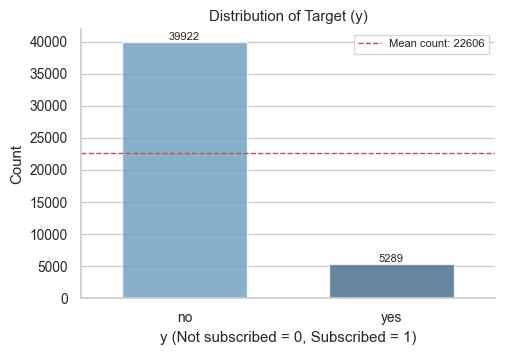

In [4]:
sns.set(style="whitegrid", font_scale=0.9)
c = df["y"].value_counts().sort_index()
plt.figure(figsize=(5,3.5))
ax = sns.barplot(x=c.index, y=c.values, hue=c.index, palette="Blues_d", alpha=0.8, width=0.6, legend=False)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+50, int(p.get_height()),ha="center", va="bottom", fontsize=8)
mean = c.mean()
ax.axhline(mean, color="r", ls="--", lw=1)
ax.legend(handles=[mlines.Line2D([], [], color='r', ls='--', lw=1, label=f"Mean count: {mean:.0f}")], loc="upper right", fontsize=8)
ax.set(title="Distribution of Target (y)", xlabel="y (Not subscribed = 0, Subscribed = 1)", ylabel="Count")
sns.despine(); plt.tight_layout(pad=0.5); plt.show()

**Bar Plot Analysis of `y`**
| **Aspect** | **Observation** |
|:--|:--|
| **Class Distribution** | **Not subscribed:** 39,922 (88.3%), **Subscribed:** 5,289 (11.7%) |
| **Class Balance** | Highly imbalanced — “No” occured ~8× > “Yes”. |
| **Mean Count** | 22,606 |

# **4. Basic Data Exploration for the Features**

- In this step, we classify variables as **categorical** or **continuous**, and record the count for each type.  
- **`cat_feature`** → Stores categorical features throughout the pipeline.
- **`num_feature`** → Stores continuous features throughout the pipeline.
- **`org_cat_feature`** → Stores original categorical features *before cleaning*.  
- **`org_num_feature`** → Stores original continuous features *before cleaning*.

---

**Classified features using the threshold = 20 :** If the number of unique values is less than 20, the variable is categorical; if it is more than 20, the variable is numerical.

In [5]:
def classify_features(df, threshold=20):
    org_cat_feature = [c for c in df.columns if df[c].nunique(dropna=True) < threshold]
    org_num_feature = [c for c in df.columns if c not in org_cat_feature]
    feature_types = {c: 'Categorical' if c in org_cat_feature else 'Numerical' for c in df.columns}
    counts = {"Categorical": len(org_cat_feature), "Numerical": len(org_num_feature)}
    return feature_types, org_cat_feature, org_num_feature, counts
feature_types, org_cat_feature, org_num_feature, counts = classify_features(df)
print(f"Categorical Features ({len(org_cat_feature)}): {org_cat_feature}")
print(f"Numerical Features ({len(org_num_feature)}): {org_num_feature}")
print(f"Counts: {counts}")

Categorical Features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Features (7): ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Counts: {'Categorical': 10, 'Numerical': 7}


In [6]:
info_df = pd.DataFrame({"dtype": df.dtypes, "non_null": df.notnull().sum(), "null": df.isnull().sum(), "unique": df.nunique()})
info_df.index.name = "column"
info_df.reset_index(inplace=True)
info_df["feature_type"] = info_df["column"].map(feature_types)
info_df

column   dtype  non_null   null  unique feature_type
0           age   int64     45211      0      77    Numerical
1           job  object     44923    288      11  Categorical
2       marital  object     45211      0       3  Categorical
3     education  object     43354   1857       3  Categorical
4       default  object     45211      0       2  Categorical
5       balance   int64     45211      0    7168    Numerical
6       housing  object     45211      0       2  Categorical
7          loan  object     45211      0       2  Categorical
8       contact  object     32191  13020       2  Categorical
9   day_of_week   int64     45211      0      31    Numerical
10        month  object     45211      0      12  Categorical
11     duration   int64     45211      0    1573    Numerical
12     campaign   int64     45211      0      48    Numerical
13        pdays   int64     45211      0     559    Numerical
14     previous   int64     45211      0      41    Numerical
15     poutcome  object      8252  36959       3  Categorical
16            y  object     45211      0       2  Categorical

In [7]:
df.head()

column  age           job  marital  education default  balance housing loan  \
0        58    management  married   tertiary      no     2143     yes   no   
1        44    technician   single  secondary      no       29     yes   no   
2        33  entrepreneur  married  secondary      no        2     yes  yes   
3        47   blue-collar  married        NaN      no     1506     yes   no   
4        33           NaN   single        NaN      no        1      no   no   

column contact  day_of_week month  duration  campaign  pdays  previous  \
0          NaN            5   may       261         1     -1         0   
1          NaN            5   may       151         1     -1         0   
2          NaN            5   may        76         1     -1         0   
3          NaN            5   may        92         1     -1         0   
4          NaN            5   may       198         1     -1         0   

column poutcome   y  
0           NaN  no  
1           NaN  no  
2           NaN  no  
3           NaN  no  
4           NaN  no

In [8]:
num_feature, cat_feature = org_num_feature, org_cat_feature

## **4.1. Basic Data Exploration Results**

- **Note:** Selected columns are provisional; further refinement will follow.
- **Doubt:** Model-predicted or derived features may cause **data leakage and need review.**

**Selected Variables**
| **No.** | **Feature** | **Type** | **Description** | **Status** |
|--:|:--|:--|:--|:--:|
| **1** | **age** | Numeric | Client’s age in years. | Selected |
| **2** | **job** | Categorical | Type of job: admin, unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, etc | Selected |
| **3** | **marital** | Categorical | Marital status: married, divorced (includes widowed), single. | Selected |
| **4** | **education** | Categorical | Education level: unknown, primary, secondary, tertiary. | Selected |
| **5** | **default** | Binary | Has credit in default? (yes / no). | Selected |
| **6** | **balance** | Numeric | Average yearly account balance in euros. | Selected |
| **7** | **housing** | Binary | Has housing loan? (yes / no). | Selected |
| **8** | **loan** | Binary | Has personal loan? (yes / no). | Selected |
| **9** | **contact** | Categorical | Communication channel: unknown, telephone, cellular. | Selected |
| **10** | **day_of_week** | Numeric | Last contact day of the month. | Selected |
| **11** | **month** | Categorical | Last contact month: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec. | Selected |
| **12** | **duration** | Numeric | Duration of the last contact in seconds. **Doubt** | Selected |
| **13** | **campaign** | Numeric | Number of contacts during the current campaign (includes last contact). | Selected |
| **14** | **pdays** | Numeric | Number of days since the client was last contacted in a previous campaign (−1 means never contacted). | Selected |
| **15** | **previous** | Numeric | Number of contacts performed before this campaign. | Selected |
| **16** | **poutcome** | Categorical | Outcome of the previous marketing campaign: unknown, other, failure, success. | Selected |
| **17** | **y (Target)** | Binary | Has the client subscribed to a term deposit? (yes / no). | Selected |

- **Drop `duration` (Numeric)** — Because it causes **data leakage**: the call length is only known *after* the call finishes, at which point the outcome (yes/no) is already known. Since longer calls strongly correlate with clients saying “yes,” the model would “cheat” by relying on duration, giving you unrealistically high accuracy that won’t work in real-world predictions where duration isn’t available beforehand.

---

**Data Summary Table**
| **Category** | **Type** | **Count** |
|:--|:--|:--:|
| **Feature Variables** | Numeric, Nominal / Ordinal / Binary | **6, 9**|
| **Target Variable** | Binary — *y* (Term Deposit Subscription) | **1** |
| **Overall Variables** | Total (Features + Target) | **16** |

In [9]:
df = df.drop(columns=['duration'])
num_feature = [col for col in num_feature if col != 'duration']
num_feature

['age', 'balance', 'day_of_week', 'campaign', 'pdays', 'previous']

# **5. Visual EDA for Data Distribution**

## **5.1. Visualize Distribution of Categorical Feature Variables** ✅

**Categorical Variables Overview**
| **Category** | **Variable Names** | **Count** |
|:--|:--|:--:|
| **Categorical Features** | `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome` | **9** |
| **Categorical Target** | `y` | **1** |
| **Total** | — | **10** |

- Bar charts are used to visualize how the data is distributed across categorical columns.

In [10]:
def plot_categorical_bars(df, cols, n_cols=3, top=None, normalize=False):
    n_rows = ceil(len(cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), squeeze=False, constrained_layout=True)
    for i, (ax, col) in enumerate(zip(axes.flatten(), cols)):
        counts = df[col].fillna("Missing").value_counts(dropna=False)
        counts = counts.head(top) if top else counts
        counts = (counts / counts.sum() * 100) if normalize else counts
        counts.plot(kind="bar", ax=ax, color="steelblue", edgecolor="black", alpha=0.6)
        ax.set_title(col, fontsize=10)
        ax.set_ylabel("%" if normalize else "Count")
        ax.tick_params(axis="x", rotation=90)
        ax.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.6)
    for ax in axes.flatten()[len(cols):]:
        ax.set_visible(False)
    fig.suptitle("Categorical Features", fontsize=14)
    plt.show()

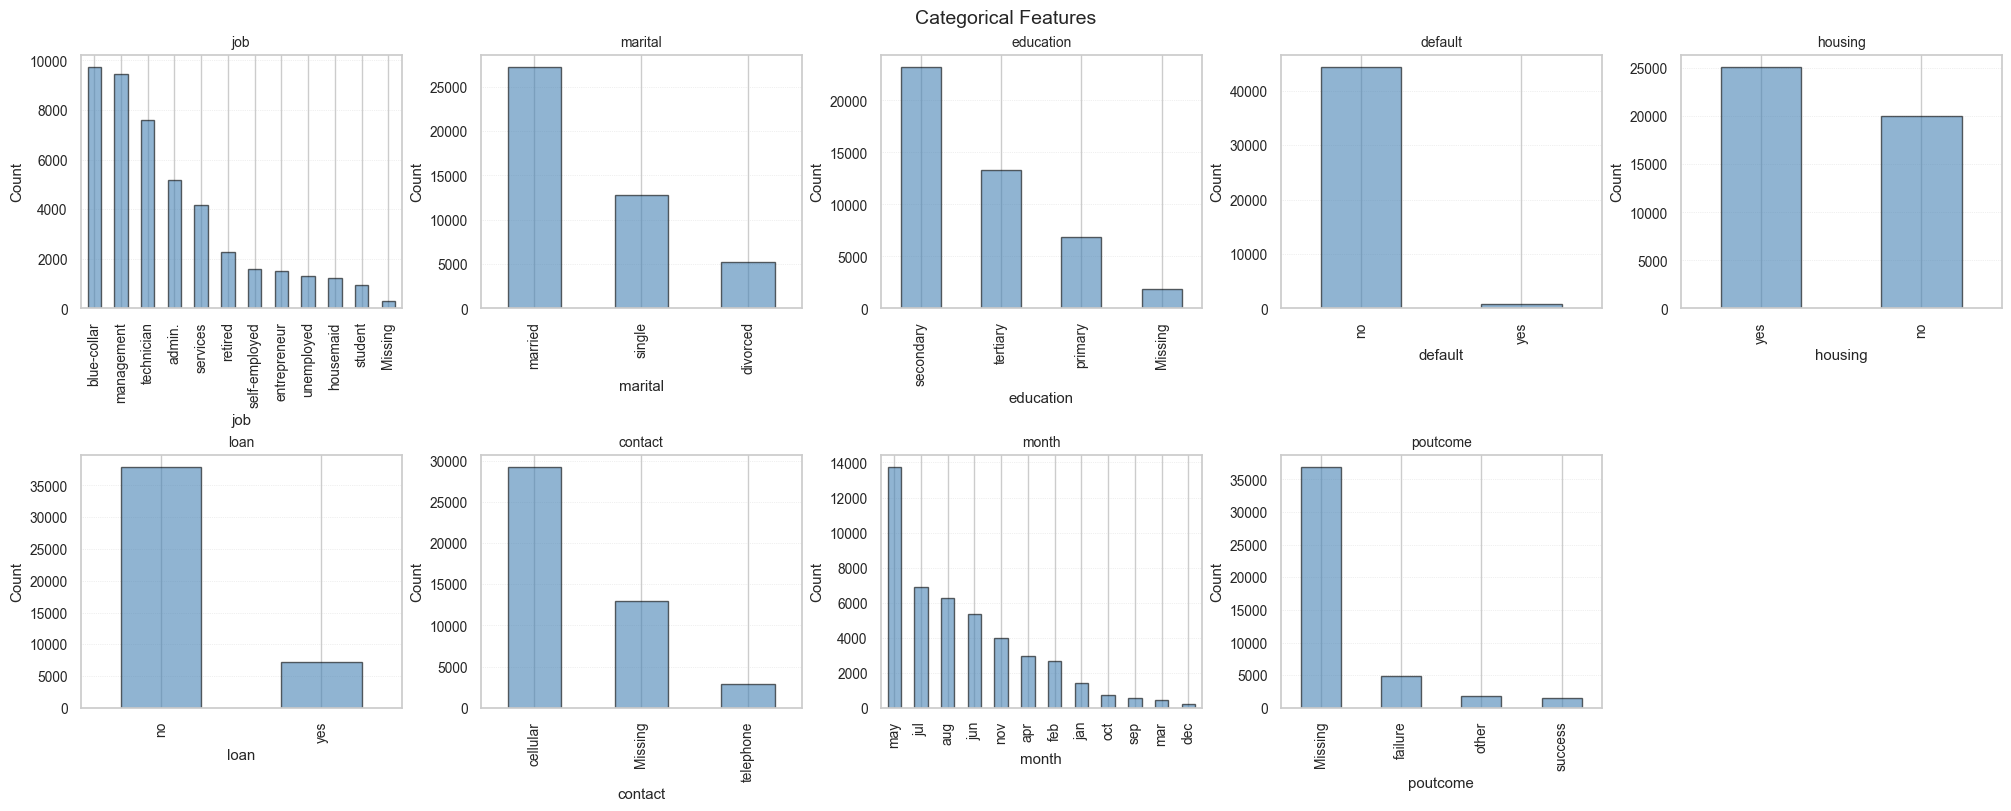

In [11]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
plot_categorical_bars( df, cat_cols, n_cols=5, top=None, normalize=False)

### **5.1.1. Bar Charts Interpretation**

- **Note:** Selected columns are provisional; further refinement will follow.
- **Doubt:** Imbalance need to treat **missing values or outliers.**

---

**Selected Categorical Variables**
| **Status** | **Variable(s)** | **Observation** | **Description** | **Treatment** |
|:--|:--|:--|--|--|
| **Selected** | All categorical features | - | - | - |
| **Doubt** | `default` | Class Imbalance | The default feature is extremely skewed, with the vast majority of observations falling into the "no" category. | **Outlier** |
|           | `contact`, `poutcome`, `job`, `education` | Missing values | The chart showing the missing values which is need to treat them. | **Missing value** |

**Conclusion**
- Since visual interpretation is ***less reliable than statistical testing cause of the domain knowledge***, we preserve all variables for now.
- No categorical columns are removed at this stage. 

## **5.2. Visualize Distribution of Continuous Feature Variables** 

**Continuous Variables Overview**
| **Category** | **Variable Names** | **Count** |
|:--|:--|:--:|
| **Continuous Features** | `age`, `balance`, `day`, `campaign`, `pdays`, `previous` | **6** |
| **Total** | — | **6** |
- Histograms and boxplot visualize the distribution of continuous variables,revealing skewness, and outliers across features, and campaign frequency.

### **5.2.1. Visualize Distribution in Data Using Histograms** ✅

In [12]:
def plot_hist_grid(df, cols, bins=30, n_cols=3, show_kde=True):
    n_rows = ceil(len(cols)/n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
    for ax, col in zip(axes.flatten(), cols):
        s = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        if s.empty: ax.axis("off"); continue
        ax.hist(s, bins=bins, color="steelblue", edgecolor="black", alpha=0.6)
        if show_kde and s.size>1 and np.ptp(s)>0:
            x = np.linspace(s.min(), s.max(), 512)
            ax.plot(x, gaussian_kde(s)(x)*s.size*(x[1]-x[0]), color="blue", lw=1)
        for val, c, ls in zip([s.mean(), s.median(), s.mode().iloc[0]], ['r','g','b'], ['--','-.',':']):
            ax.axvline(val, color=c, ls=ls, lw=0.8)
        ax.set(title=col, ylabel="Frequency"); ax.grid(axis="y", ls=":", lw=0.5)
    plt.tight_layout(); plt.suptitle("Histograms of Numeric Features", y=1.02, fontsize=13); plt.show()

In [13]:
def summarize_numeric(df, cols):
    summary = {}
    for col in cols:
        series = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.size > 0:
            mean_value = float(series.mean())
            median_value = float(series.median())
            mode_series = series.mode(dropna=True)
            mode_value = float(mode_series.iloc[0]) if not mode_series.empty else mean_value
            summary[col] = {"Mean": mean_value,"Median": median_value,"Mode": mode_value}
    return pd.DataFrame(summary).T

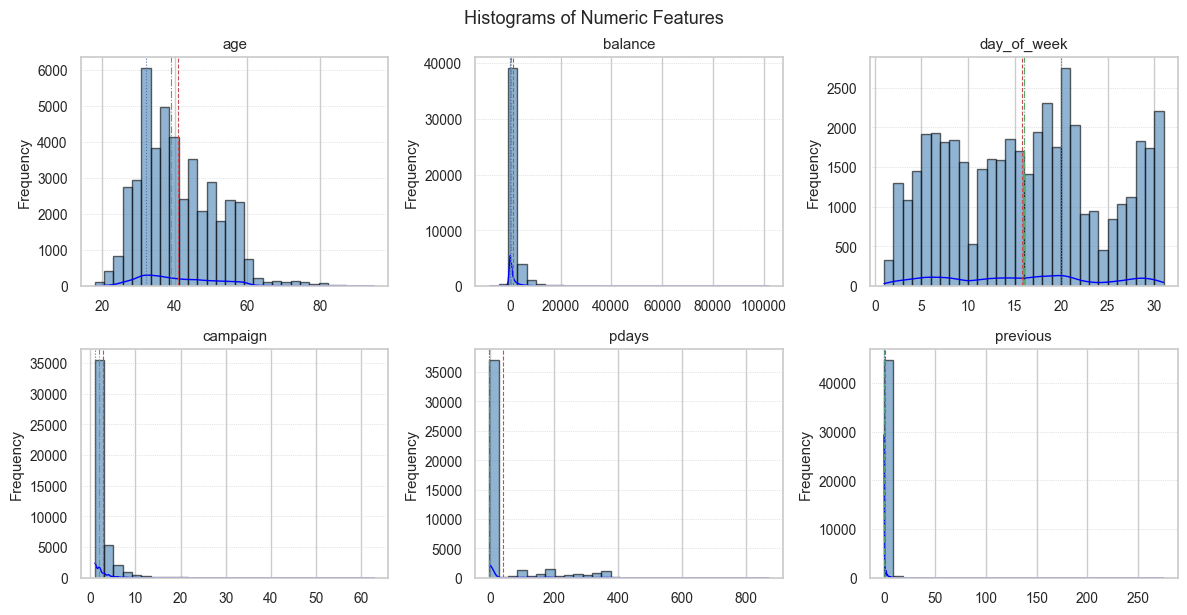

In [14]:
num_cols = ['age', 'balance', 'day_of_week', 'campaign', 'pdays', 'previous']
plot_hist_grid(df, num_cols, bins=30, n_cols=3)

In [15]:
summarize_numeric(df, num_cols) # mean, median, mode

Mean  Median  Mode
age            40.936210    39.0  32.0
balance      1362.272058   448.0   0.0
day_of_week    15.806419    16.0  20.0
campaign        2.763841     2.0   1.0
pdays          40.197828    -1.0  -1.0
previous        0.580323     0.0   0.0

### **5.2.2. Visualize Distribution in Data Using Box Plots**

In [16]:
def plot_box_grid(df, cols, n_cols=3):
    n = len(cols)
    n_rows = ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), constrained_layout=True)
    axes = axes.flatten()
    for i, col in enumerate(cols):
        series = df[col].dropna()
        axes[i].boxplot(series, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"), medianprops=dict(color="red"), whiskerprops=dict(color="black"), capprops=dict(color="black"))
        axes[i].set_title(col, fontsize=10)
        axes[i].set_ylabel("")
        axes[i].grid(axis="y", linestyle=":", alpha=0.6)
    for j in range(i+1, n_rows*n_cols):
        axes[j].set_visible(False)
    fig.suptitle("Boxplots of numeric features", fontsize=14)
    plt.show()

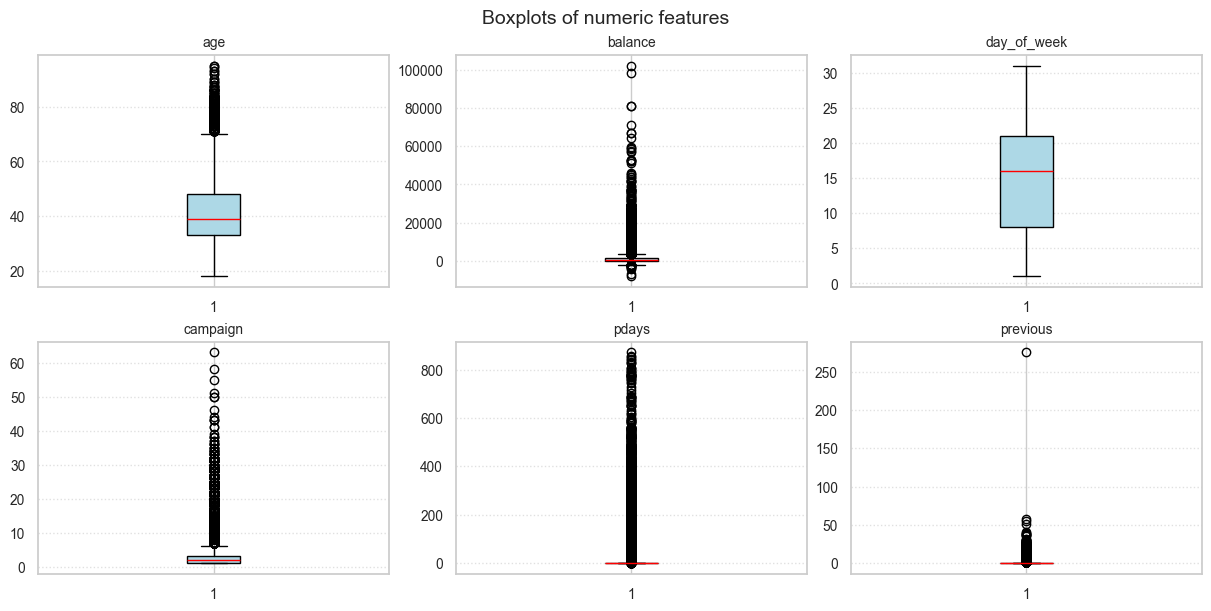

In [17]:
plot_box_grid(df, num_cols, n_cols=3)

### **5.2.3. Histogram and Boxplot Interpretation**
- **Note:** Selected columns are provisional; further refinement will follow.
- **Doubt:** Imbalance need to treat **missing value or outliers.**

---

**Selected Continuous Variables**
| **Status** | **Variable(s)** | **Observation** | **Description** | **Treatment** |
|:--|:--|:--|--|--|
| **Selected** | All continuous features | - | - | - |
| **Doubt** | `age` | Slightly positive skew, Outliers | **- Skew:** The histogram shows a slight tail extending to the right (positive skew), though it is mostly centered around 30–40. The mean (red dashed line) is slightly to the right of the median (green dashed line).<br> **- Outliers:** The boxplot clearly shows points above the upper whisker, indicating outliers (e.g., ages above 90). | **Outlier** |
|  | `balance`, `campaign`, `previous` | Strongly positive skew, Many outliers | **- Skew:** The histograms for all three features are extremely ***concentrated near zero*** and have very long, pronounced tails extending far to the right. This is a classic sign of strong positive skew.<br> **- Outliers:** The boxplots for these features show that the main box and whiskers are compressed very close to the x-axis, with thousands of individual data points plotted far above, confirming many severe outliers. | **Outlier** |
|  | `pdays` | Strongly positive skew, Many Outlier, Missing values | **- Skew/Outliers:** Similar to the features above, the histogram is heavily skewed with a long tail, and the boxplot shows the main data clumped at zero with many outliers.<br> **- Missing Values:** While not directly visible in the boxplot or histogram (since most plotting functions exclude nulls), in this context (pdays from the banking dataset), a value of -1 is commonly used to denote that the customer was not previously contacted (effectively a "missing" event). Given that the vast majority of the data is clustered at zero/near-zero, this suggests a data representation issue that often involves imputed 'missing' values. | **Outlier, Missing values** |

**Conclusion**
- Since visual interpretation is ***less reliable than statistical testing***, we preserve all variables for now.
- No continuous columns are removed at this stage. 

# **6. Outlier Treatment**

- We separate the outlier treatment into two conditions — **with** and **without** — based on 2.2.1.

**Note:**
- **Continuous outliers removal:** using the **Replacing method**, **IQR method** and the **Z-score method**.  
- **Categorical outliers removal:** we removed rows containing **rare categories** that morethan 30% of entire values.
- ***The candidate feature for outlier treatment table* will be analyze later**.

---

**Candidate Features for Outlier Treatment**
| **Type** | **Variables** | **Observation** |
|:--|:--|:--|
| **Categorical** | `default` | "No" dominates "Yes" |
| **Continuous** | `age`, `balance`, `campaign`, `previous`, `pdays`  | Outliers clearly visible in boxplots |

## **6.1. Outlier Analysis**

| Feature | Treatment Status | Domain Reasoning / Data Structures | Treatment Method |
| ------- | ------------------- | -------------------------------- | --------------------------- |
| **1.`age`** | Yes | **Extreme Outliers:** In the older age group ($\approx 80-90+$) it is in the segment where healthcare is specific and not just effective for general working age customers.| **Replacing at age range (e.g. $18$ to $90$ years old)** |
| **2.`balance`** | Yes | **Strongly Positivs Skew & Extreme Outliers:** Customers with very high balances are a rare and unrepresentative group of customers. Leaving this value off will distort the model's learning about most customers. | **Replacing (e.g., at $99^{th}$ percentile)** |
| **3.`campaign`** | Yes | **Strong Positive Skew & Extreme Outliers:** A very high number of contacts ($\approx 20-30+$) is considered a marketing failure or mistake in business terms and should be limited to a reasonable maximum to focus the analysis on the contacts that are effective. | **Replacing at the maximum business limit (e.g. $30$ per time)** |
| **4.`previous`** | Yes | **Strong Positive Skew & Extreme Outliers:** A very high number of past contacts is a rare event and should not overfit the model to unrepresentative historical data. | **Replacing** |
| **5.`pdays`** | Yes | **Structural Outlier (value $\mathbf{-1}$) and Strong Positive Skew:** The value $\mathbf{-1}$ represents "missing history", which is categorical data encoded as a number. Using $-1$ directly will mislead the model. | **Feature Engineering** to split into 2 new Features: contact_flag (Binary) and pdays_actual (Numerical) |
| **6.`default`** | No | **Severe Class Imbalance:** It is not an outlier problem, but rather a natural distribution of the target class in financial data. This imbalance biases the model and prevents it from accurately identifying defaulters ("Yes")|**No Treatment** |

### **6.1.1. Feature Engineering of Pdays**

Split into 2 feature includes:
1. **`contact_flag`** indicating the ***customers who contact or not.***
2. **`pdays_actuals`** indicating the ***customers contact days*** which means -1 (missing history or no contact) will replace with 0. The model will learn that **0 means no contact** and treat it as a valid feature, while also distinguishing it from missing data. And this approach **avoids the problem of filling NaN values with noise** (e.g., the median), and allows the model to better understand the feature.

### **6.1.2. Why Replacing Method Over Other Data Handling Approaches?**
- **Preserves sample size:** Replacing (Capping) at the 99th percentile for balance maintains all data points while mitigating extreme outliers' impact on model performance (unlike deletion which loses information, such as IQR/Z-score approaches that could remove valuable boundary cases).
- **Respects data volume proportions:** For features like campaign or previous with significant skew, Capping balances maintaining statistical consistency while reducing noise rather than removing data entirely.
- **Improves stability without data loss:** Capping allows data to remain in the dataset while preventing extremes from creating instability and improving model reliability in predictions.

**Conclusion for Recap Pipeline**
- **With Outlier Treatment:** The following features will be treated for outliers — `age`, `balance`, `campaign` and `previous` which is ***all numerical features***.
- **Without Outlier Treatment:** No features will undergo outlier adjustment; all data will remain in its original form.

---

- Set the features column **`num_var_ol`**, **`cat_var_ol`** for outlier detection.

In [18]:
num_var_ol = ['age', 'balance', 'campaign', 'pdays', 'previous']
cat_var_ol = ['default']
df_ot = df[num_var_ol + cat_var_ol].copy()
print("✅ Original df_ot shape:", df_ot.shape)

✅ Original df_ot shape: (45211, 6)


## **6.2. Outlier Treatment for Continuous Features**

### **6.2.1. Replacing Method**

In [19]:
replace_thresholds = {
    'age': {'lower': 18, 'upper': 90},           # Age between 18 and 90
    'balance': {'lower': None, 'upper': 'p99'},  # 99th percentile for balance
    'campaign': {'lower': None, 'upper': 30},    # Cap at 30 contacts for campaign
    'previous': {'lower': None, 'upper': 30}     # Cap at 30 contacts for previous
}

In [20]:
def replacing(df, thresholds):
    df_replace = df.copy()  # Make a copy of the original dataframe to avoid modifying the original
    for col, th in thresholds.items():
        lower = th['lower']
        upper = th['upper']
        if lower is not None:
            df_replace[col] = np.where(df_replace[col] < lower, lower, df_replace[col])     
        if upper is not None:
            if isinstance(upper, str) and upper.startswith('p'):  # Check if it's a percentile (e.g., 'p99')
                percentile = float(upper.replace('p', '')) / 100
                upper = df_replace[col].quantile(percentile)  # Compute the upper bound based on the percentile
            df_replace[col] = np.where(df_replace[col] > upper, upper, df_replace[col])
    return df_replace

### **6.2.2. Feature Engineering Split into contact_flag(Binary) and pdays_actual(Numerical)**

In [21]:
def split_pdays_feature_with_placeholder(df, column='pdays', missing_value=-1, placeholder_value=0):
    df['contact_flag'] = np.where(df[column] != missing_value, 1, 0)
    df['pdays_actual'] = np.where(df[column] == missing_value, placeholder_value, df[column])
    return df

| **Feature** | **Type** | **Description** |
| ------- | ---- | ----------- |
| **contact_flag** | Binary | indicated whether the customer was contacted or not. |
| **pdays_actual** | Numeric | the number of days since last contact. |
- **Checking the instances in dataframe** after outlier treatment and **pdays splitting correctly**

In [22]:
# Print the shape of the original dataframe
print("✅ Original df_ot shape:", df_ot.shape)
df_ot_replaced = replacing(df_ot, replace_thresholds)
print("✅ After outlier treatment shape:", df_ot_replaced.shape)
df_ot_replaced = split_pdays_feature_with_placeholder(df_ot_replaced, column='pdays')
df_ot_replaced = df_ot_replaced.drop(columns=['pdays'])
print("✅ After pdays feature engineering shape (with contact_flag and pdays_actual replacing pdays):", df_ot_replaced.shape)
print("✅ Final DataFrame with outlier treatment and feature engineering applied:")
print(df_ot_replaced[['age', 'balance', 'campaign', 'previous', 'contact_flag', 'pdays_actual']].head())

✅ Original df_ot shape: (45211, 6)
✅ After outlier treatment shape: (45211, 6)
✅ After pdays feature engineering shape (with contact_flag and pdays_actual replacing pdays): (45211, 7)
✅ Final DataFrame with outlier treatment and feature engineering applied:
column  age  balance  campaign  previous  contact_flag  pdays_actual
0        58   2143.0         1         0             0             0
1        44     29.0         1         0             0             0
2        33      2.0         1         0             0             0
3        47   1506.0         1         0             0             0
4        33      1.0         1         0             0             0


- **Checking the contact_flag and pdays_actual when pdays is not -1 (missing history)**

In [23]:
# Filter out rows where 'contact_flag' is 0 (meaning no contact was made, i.e., original 'pdays' was -1)
df_ot_replaced_filtered = df_ot_replaced[df_ot_replaced['contact_flag'] == 1].copy()  # Create a copy after filtering

# Display the final DataFrame with the outlier treatment and feature engineering applied
print("✅ Final DataFrame with outlier treatment and feature engineering applied (excluding -1 for pdays):")
print(df_ot_replaced_filtered[['age', 'balance', 'campaign', 'previous', 'contact_flag', 'pdays_actual']].head())

✅ Final DataFrame with outlier treatment and feature engineering applied (excluding -1 for pdays):
column  age  balance  campaign  previous  contact_flag  pdays_actual
24060    33    882.0         1         3             1           151
24062    42   -247.0         1         1             1           166
24064    33   3444.0         1         4             1            91
24072    36   2415.0         1         4             1            86
24077    36      0.0         1         3             1           143


## **6.3. Visualizing Distribution After Outlier Treatment**

| Data Frame | Description |
|:--|:--|
| `df` | Original full df shape | 
| `df_full_ot` | Outlier treatment's full df shape |

In [24]:
# Update num_var_ol to include the new features replacing 'pdays'
num_var_ol_updated = ['age', 'balance', 'campaign', 'previous', 'pdays_actual']
df_full_ot = df.copy()

# Update the original DataFrame with the outlier-treated features
df_full_ot[num_var_ol_updated] = df_ot_replaced[num_var_ol_updated]

# Check the shape and ensure the indices match
print("✅ Original full df shape:", df.shape)
print("✅ Outlier treatment's full df shape:", df_full_ot.shape)
print((df_full_ot.index == df_ot_replaced.index).all())  # Should print True

✅ Original full df shape: (45211, 16)
✅ Outlier treatment's full df shape: (45211, 17)
True


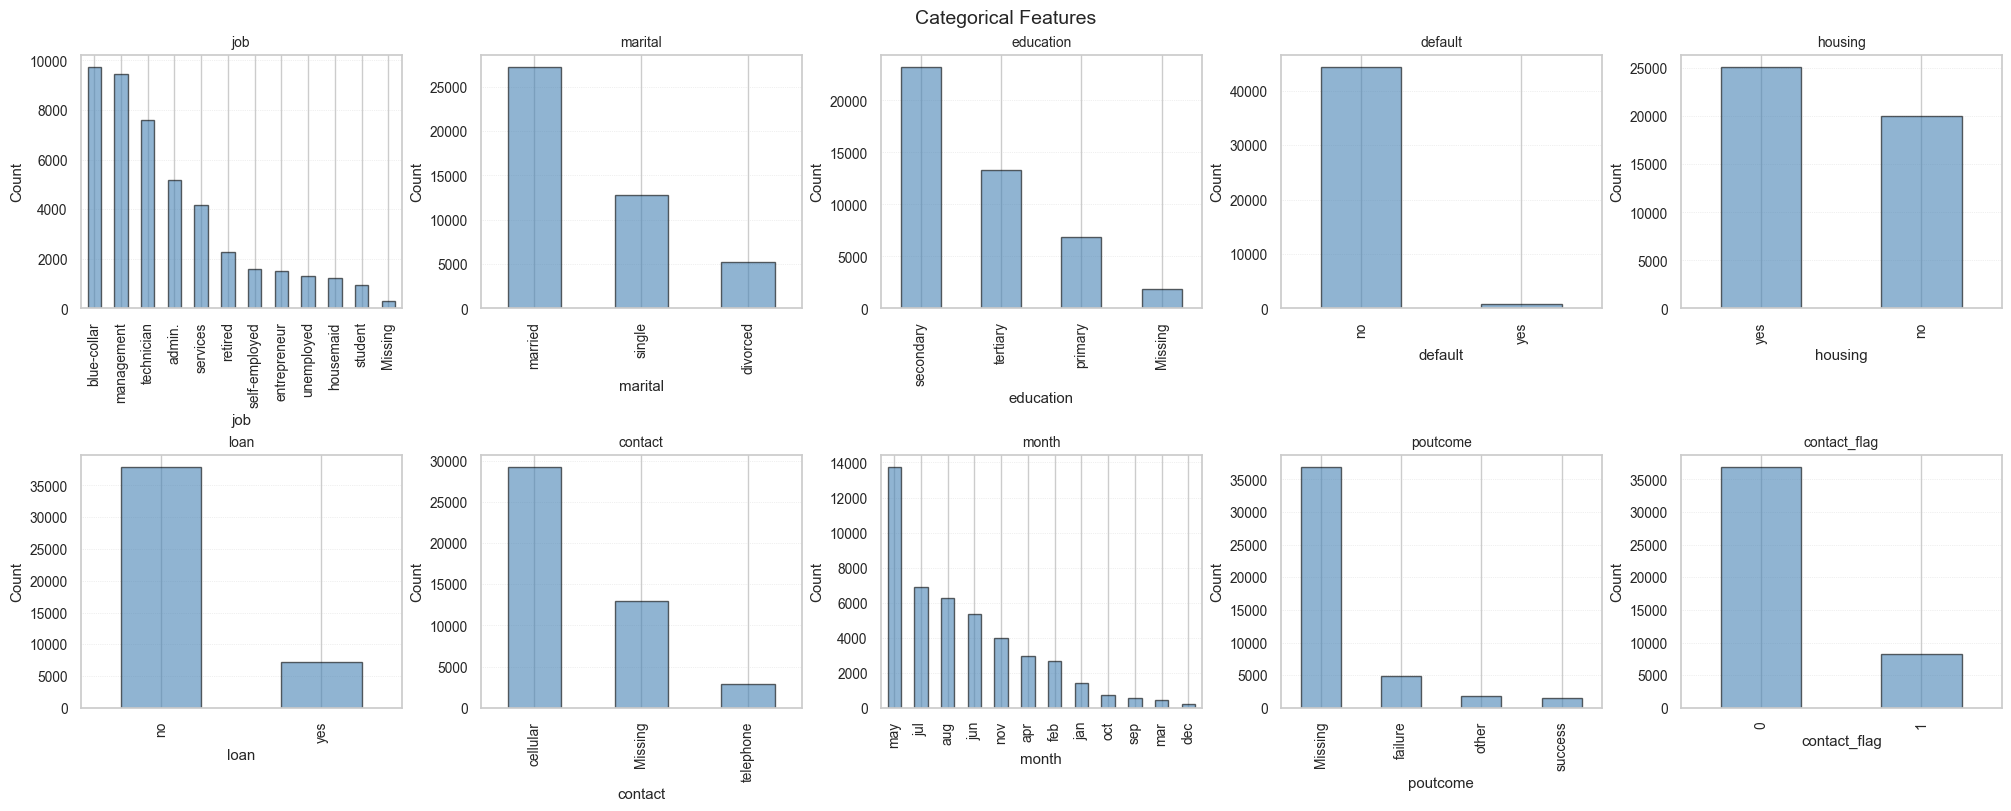

In [25]:
# Apply feature engineering for `pdays` to split it into `contact_flag` and `pdays_actual`
df_full_ot = split_pdays_feature_with_placeholder(df_full_ot, column='pdays')
new_cat_cols = cat_cols + ['contact_flag']
plot_categorical_bars(df_full_ot, new_cat_cols, n_cols=5, top=None, normalize=False)

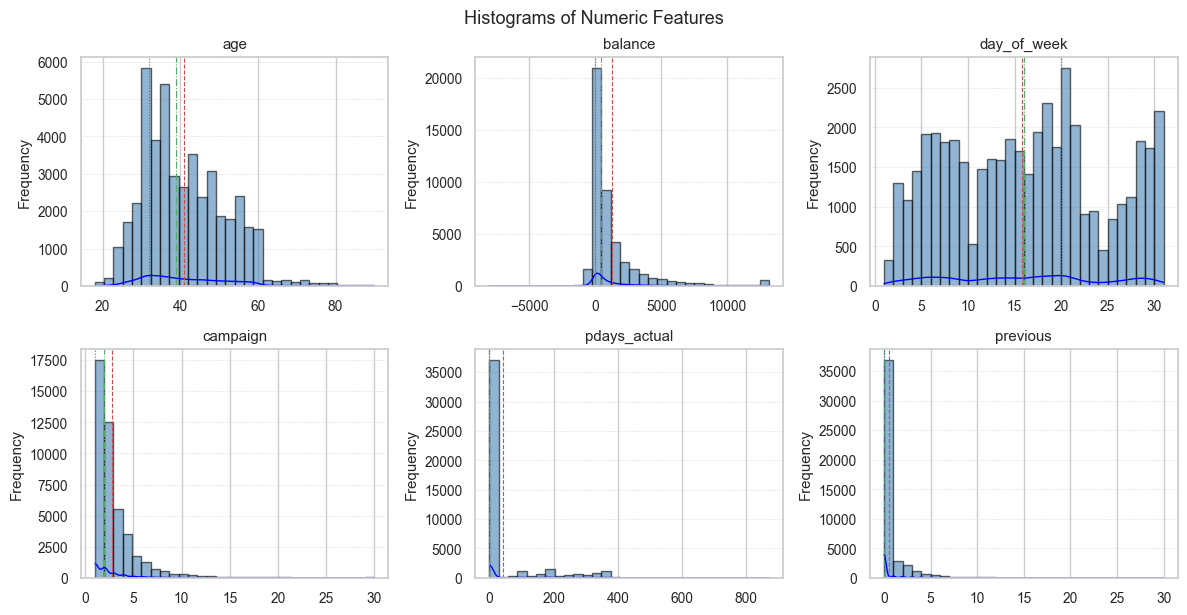

In [26]:
# List of numeric columns
num_var_olt = ['age', 'balance', 'day_of_week', 'campaign', 'pdays_actual', 'previous']
plot_hist_grid(df_full_ot, num_var_olt, bins=30, n_cols=3)

**Without Outlier Treatment**
| **Category** | **Variable Names** | **Count** |
|:--|:--|:--:|
| **Continuous Features** | `age`, `balance`, `day_of_week`, `campaign`, `pdays`, `previous` | **6** |
| **Categorical Features** | `job`, `marital`, `education`, `default`, `housing`, `loan`, `month`, `poutcome`, `contact` | **9** |
| **Target** | `y`  | **1** |
| **Total** | — | **16** |

**With Outlier Treatment**
| **Category** | **Variable Names** | **Count** |
|:--|:--|:--:|
| **Continuous Features** | `age`, `balance`, `day_of_week`, `campaign`, `pdays_actual`, `previous` | **6** |
| **Categorical Features** | `job`, `marital`, `education`, `default`, `housing`, `loan`, `month`, `contact_flag`, `poutcome`, `contact`  | **10** |
| **Target** | `y`  | **1** |
| **Total** | — | **17** |

# **7. Missing Values**

- Columns with **>25% missing values** are rejected due to excessive data loss.  

**Note:**
- **Continuous:** Impute with **MEAN** or **MEDIAN**  
- **Categorical:** Impute with **MODE**

## **7.1. Missing Values for Continuous Features**

### **7.1.1. Removing the Missing Values**

In [27]:
# Checking for missing values in selected features
def missing_summary(df, features):
    missing = df[features].isnull().sum()
    missing_percent = (missing / len(df)) * 100
    table = (pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent.round(2)}).sort_values(by='Percentage', ascending=False).rename_axis('column'))
    table_nonzero = table[table['Missing Values'] > 0]
    if table_nonzero.empty:
        print("✅ No missing values detected")
        return table
    return table_nonzero

In [28]:
# Missing summary for original data
missing_table = missing_summary(df, num_var_ol)  # Original dataframe with selected features

# Missing summary for outlier treated data
missing_ot_table = missing_summary(df_full_ot, num_var_ol_updated)  # Outlier-treated data with updated features

# Print results
print("📊 Missing Summary: Without Outlier Treatment")
display(missing_table)
print("\n📊 Missing Summary: With Outlier Treatment")
display(missing_ot_table)

✅ No missing values detected
✅ No missing values detected
📊 Missing Summary: Without Outlier Treatment


Missing Values  Percentage
column                              
age                    0         0.0
balance                0         0.0
campaign               0         0.0
pdays                  0         0.0
previous               0         0.0


📊 Missing Summary: With Outlier Treatment


Missing Values  Percentage
column                                  
age                        0         0.0
balance                    0         0.0
campaign                   0         0.0
previous                   0         0.0
pdays_actual               0         0.0

In [29]:
# Handle missing values by filling with median
df_missing = df.copy()  # Create a copy of the original dataframe
df_ot_missing = df_full_ot.copy()  # Create a copy of the outlier-treated dataframe

# Check if 'pdays' exists in df_full_ot before attempting to drop it
if 'pdays' in df_full_ot.columns:
    df_full_ot.drop(columns=['pdays'], inplace=True)

# Check if 'pdays' exists in df_ot_missing before attempting to drop it
if 'pdays' in df_ot_missing.columns:
    df_ot_missing.drop(columns=['pdays'], inplace=True)

# Fill missing values with median for numeric columns
df_missing[num_var_ol] = df_missing[num_var_ol].fillna(df_missing[num_var_ol].median())
df_ot_missing[num_var_ol_updated] = df_ot_missing[num_var_ol_updated].fillna(df_ot_missing[num_var_ol_updated].median())

# Print shapes before and after treatment
print(f"📏 Before treatment:\nOriginal df shape: {df.shape}\ndf_full_ot shape: {df_full_ot.shape}")
print(f"\n📏 After numeric missing value treatment:\ndf_missing shape: {df_missing.shape}\ndf_ot_missing shape: {df_ot_missing.shape}")

📏 Before treatment:
Original df shape: (45211, 16)
df_full_ot shape: (45211, 17)

📏 After numeric missing value treatment:
df_missing shape: (45211, 16)
df_ot_missing shape: (45211, 17)


In [30]:
# Columns before outlier treatment
print("Before outlier treatment:")
print(f"Original columns: {df.columns}")
print(f"Number of features: {len(df.columns)}")

# Columns after outlier treatment
print("\nAfter outlier treatment:")
print(f"Outlier-treated columns: {df_full_ot.columns}")
print(f"Number of features: {len(df_full_ot.columns)}")

# Compare the difference
new_columns = set(df_full_ot.columns) - set(df.columns)
print("\nNew columns added after outlier treatment:")
print(new_columns)

Before outlier treatment:
Original columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object', name='column')
Number of features: 16

After outlier treatment:
Outlier-treated columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'campaign', 'previous',
       'poutcome', 'y', 'pdays_actual', 'contact_flag'],
      dtype='object', name='column')
Number of features: 17

New columns added after outlier treatment:
{'contact_flag', 'pdays_actual'}


**Conclusion**
- We decided to use **MEDIAN** for filling the feature for preventing the outliers sensitivity and work well when the distribution is skewed. ***But, in this case non of numerical features have missing values.***
- **No numerical features got removing** from missing values treatment because ***no missing values more than 25%.***

## **7.2. Missing Values for Categorical Features**

### **7.2.1. Removing the Missing Values**

In [31]:
missing_table = missing_summary(df, cat_cols)
missing_ot_table = missing_summary(df_full_ot, cat_feature)

print("📊 Missing Summary: Without Outlier Treatment")
display(missing_table)
print("\n📊 Missing Summary: With Outlier Treatment")
display(missing_ot_table)

📊 Missing Summary: Without Outlier Treatment


Missing Values  Percentage
column                               
poutcome            36959       81.75
contact             13020       28.80
education            1857        4.11
job                   288        0.64


📊 Missing Summary: With Outlier Treatment


Missing Values  Percentage
column                               
poutcome            36959       81.75
contact             13020       28.80
education            1857        4.11
job                   288        0.64

**Drop `poutcome`, `contact`** — missing values > 25%. — **Both Pipeline**<br>

In [32]:
to_drop_cat = missing_table[missing_table['Percentage'] > 25].index.tolist()
df_drop = df.drop(columns=to_drop_cat)
print("Dropped categorical features:", to_drop_cat)
print("New shape:", df_drop.shape)

Dropped categorical features: ['poutcome', 'contact']
New shape: (45211, 14)


In [33]:
to_drop_cat_ot = missing_ot_table[missing_ot_table['Percentage'] > 25].index.tolist()
df_full_ot_drop = df_full_ot.drop(columns=to_drop_cat_ot)
print("Dropped categorical features:", to_drop_cat_ot)
print("New shape:", df_full_ot_drop.shape)

Dropped categorical features: ['poutcome', 'contact']
New shape: (45211, 15)


### **7.2.2. Filling the Missing Values**
- Fill values with **MODE** in **`education`, `job`**

In [34]:
df_missing = df_drop.copy()
df_ot_missing = df_full_ot_drop.copy()
cat_features = ['education', 'job']

In [35]:
# Fill categorical missing values with mode for each column
for col in cat_features:
    df_missing[col] = df_missing[col].fillna(df_missing[col].mode()[0])
    df_ot_missing[col] = df_ot_missing[col].fillna(df_ot_missing[col].mode()[0])

# Print shapes to verify nothing changed in structure
print("📏 Before treatment:")
print("Original df shape:", df.shape)
print("df_full_ot shape:", df_full_ot.shape)

print("\n📏 After filling categorical missing values:")
print("df_missing shape:", df_missing.shape)
print("df_ot_missing shape:", df_ot_missing.shape)

📏 Before treatment:
Original df shape: (45211, 16)
df_full_ot shape: (45211, 17)

📏 After filling categorical missing values:
df_missing shape: (45211, 14)
df_ot_missing shape: (45211, 15)


**Conclusion**
- We decided to use **MODE** to fill missing values in categorical features, where the most common category is assumed to be the most appropriate choice for the missing data which we fills in **`education`, `job`**
- `poutcome`, `contact` got removing because the missing values are more than the 25% of the entire data which if we fill the mode can make a huge imbalance in these features.

**Without Outlier Treatment + Missing Values**
| **Category** | **Variable Names** | **Count** |
|:--|:--|:--:|
| **Continuous Features** | `age`, `balance`, `day_of_week`, `campaign`, `pdays`, `previous` | **6** |
| **Categorical Features** | `job`, `marital`, `education`, `default`, `housing`, `loan`, `month`| **7** |
| **Target** | `y`  | **1** |
| **Total** | — | **14** |

**With Outlier Treatment + Missing Values**
| **Category** | **Variable Names** | **Count** |
|:--|:--|:--:|
| **Continuous Features** | `age`, `balance`, `day_of_week`, `campaign`, `pdays_actual`, `previous` | **6** |
| **Categorical Features** | `job`, `marital`, `education`, `default`, `housing`, `loan`, `month`, `contact_flag` | **8** |
| **Target** | `y`  | **1** |
| **Total** | — | **15** |

In [36]:
num_missing = ['age', 'balance', 'day_of_week', 'campaign', 'pdays', 'previous']
num_ot_missing = ['age', 'balance', 'day_of_week', 'campaign', 'pdays_actual', 'previous']
cat_missing = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
cat_ot_missing = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contact_flag']

## **7.3. Visualization After Missing Value Treatment**

* **Histogram and box plot for continuous features of `df_ot_missing` (top) and `df_missing` (bottom)**

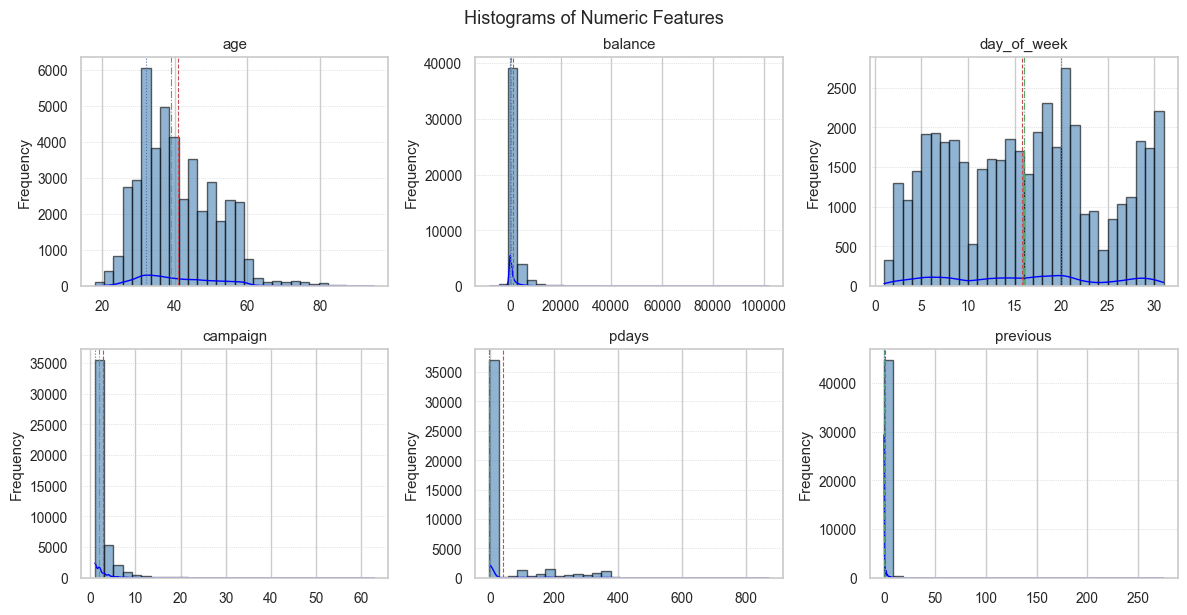

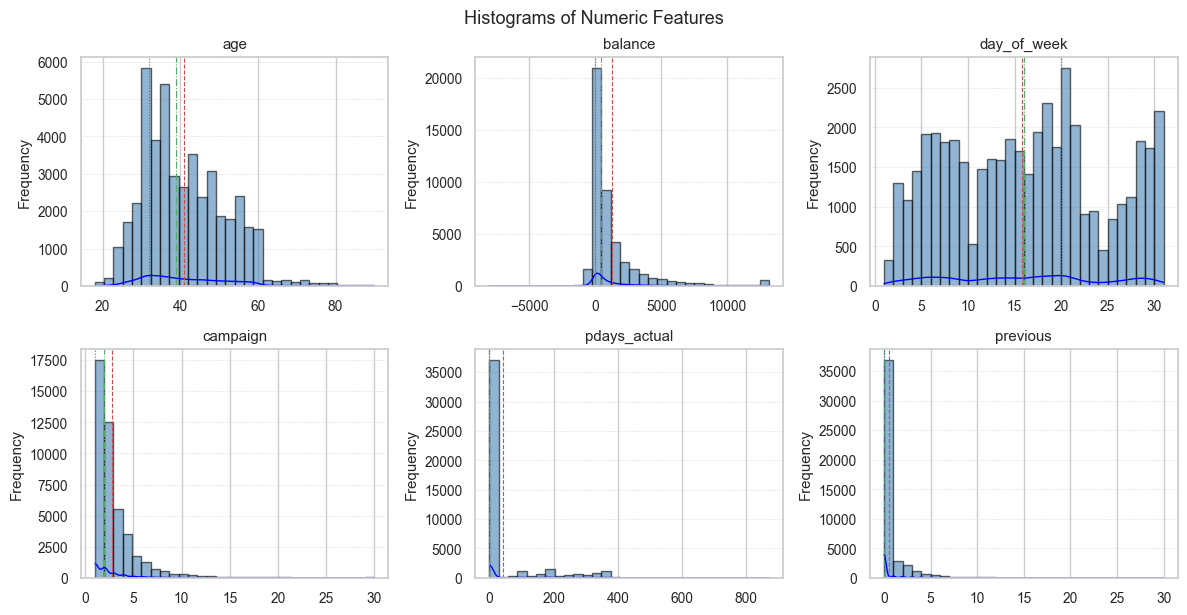

In [37]:
plot_hist_grid(df_missing, num_missing, bins=30, n_cols=3)
plot_hist_grid(df_ot_missing, num_ot_missing, bins=30, n_cols=3)


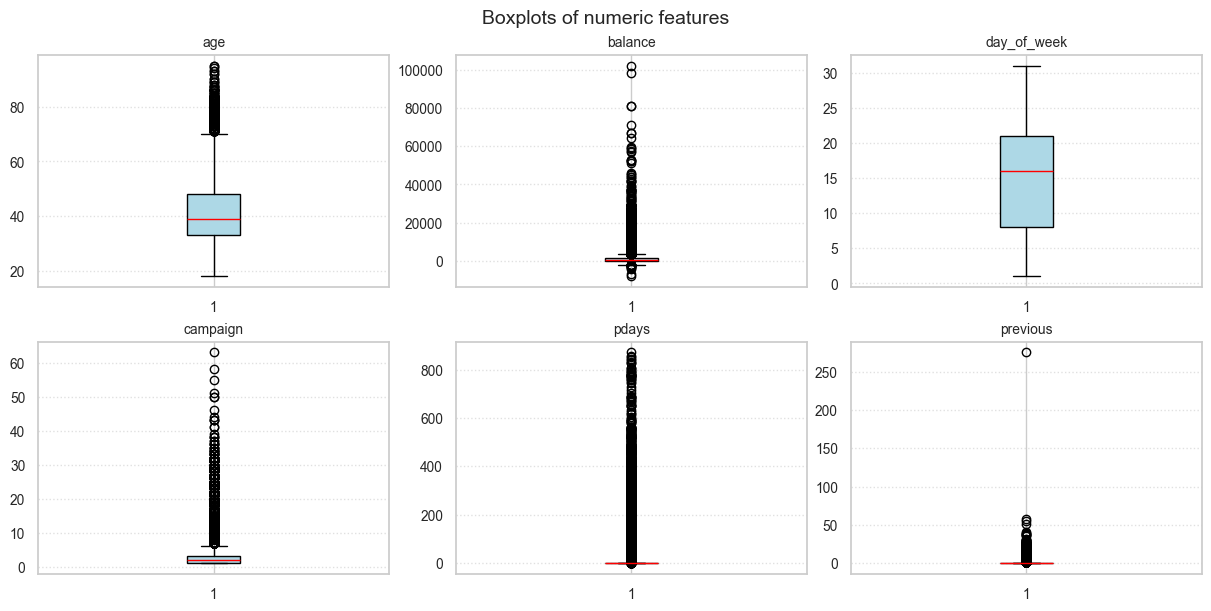

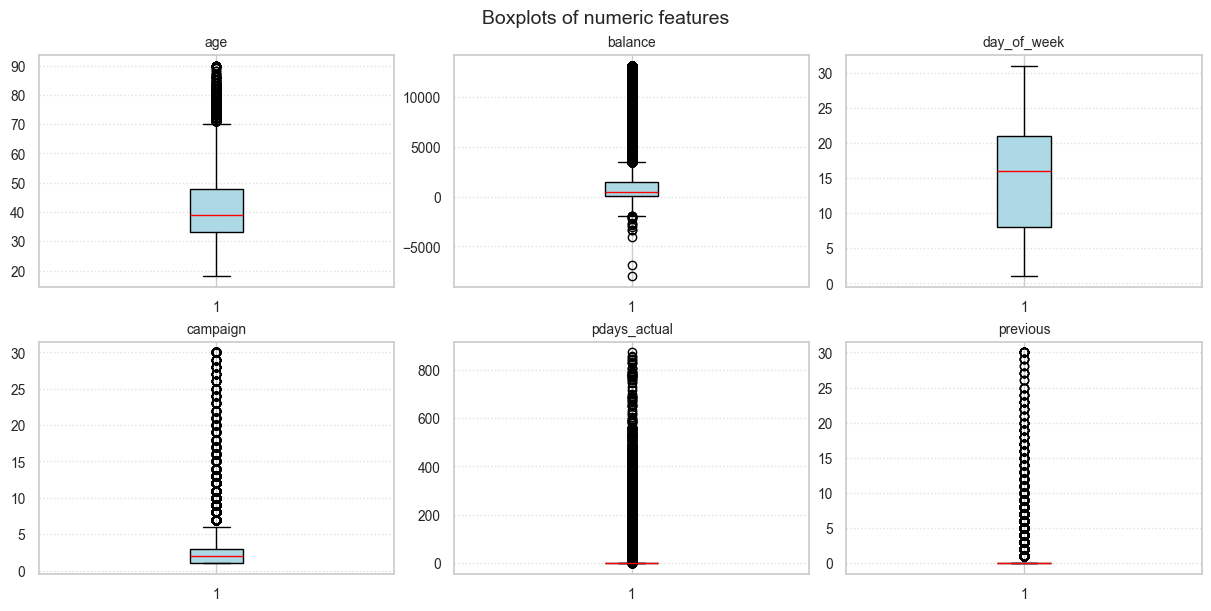

In [38]:
plot_box_grid(df_missing, num_missing, n_cols=3)
plot_box_grid(df_ot_missing, num_ot_missing, n_cols=3)

* **Bar chart for categorical features of `df_ot_missing` (top) and `df_missing` (bottom)**

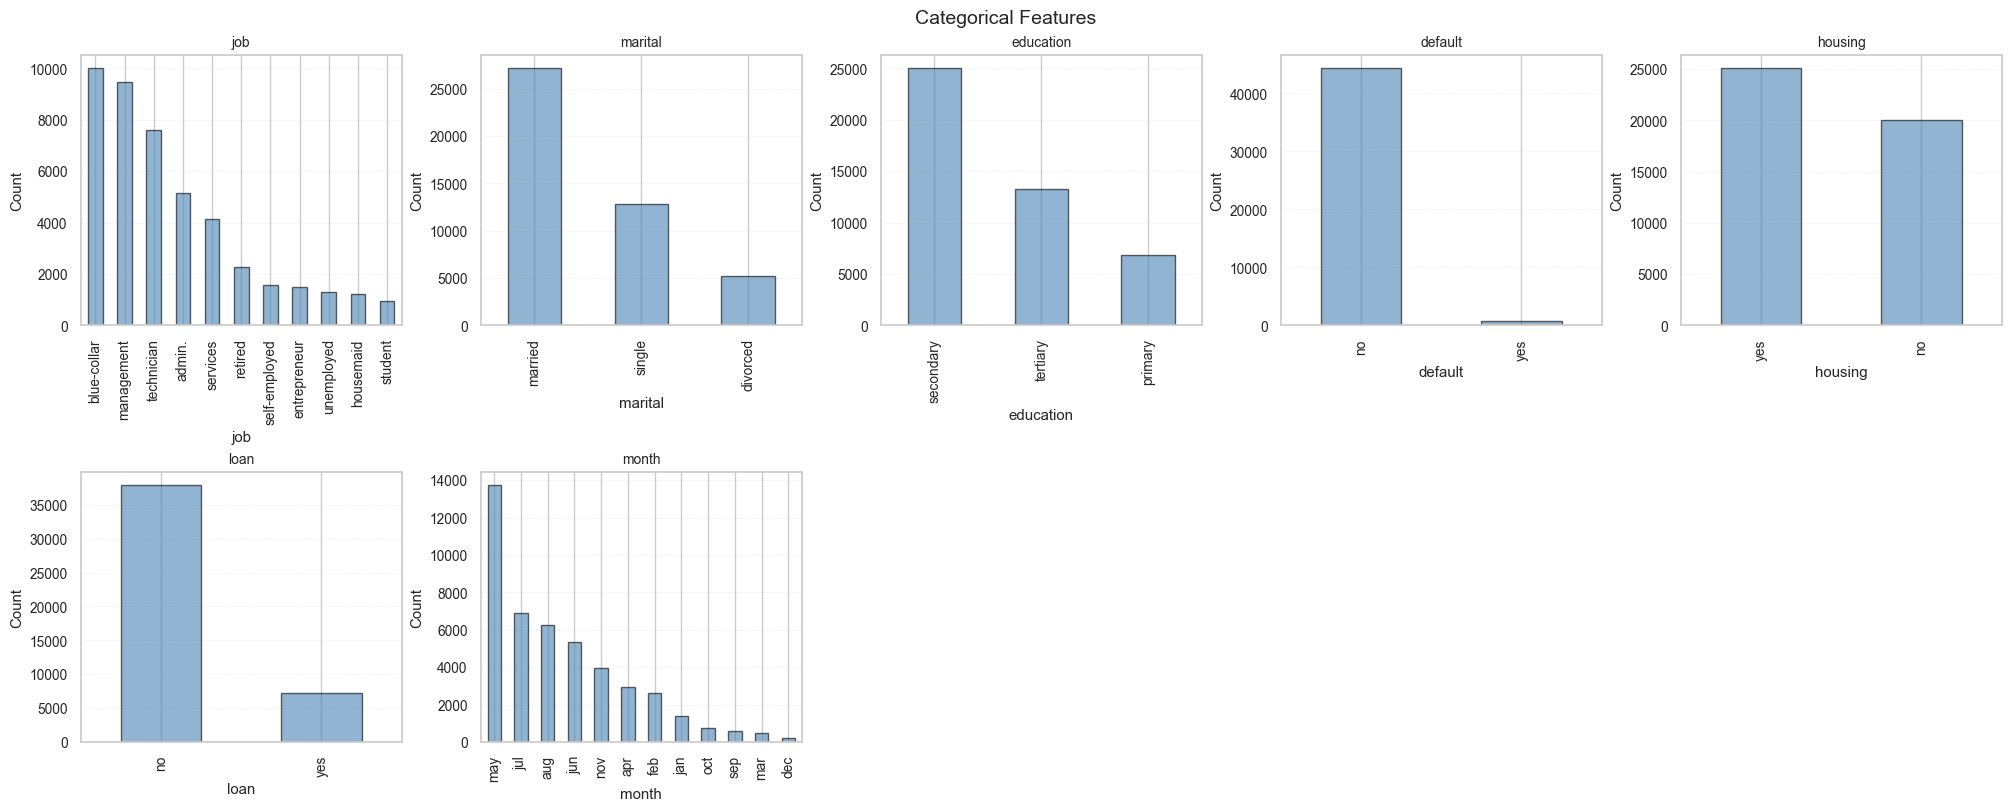

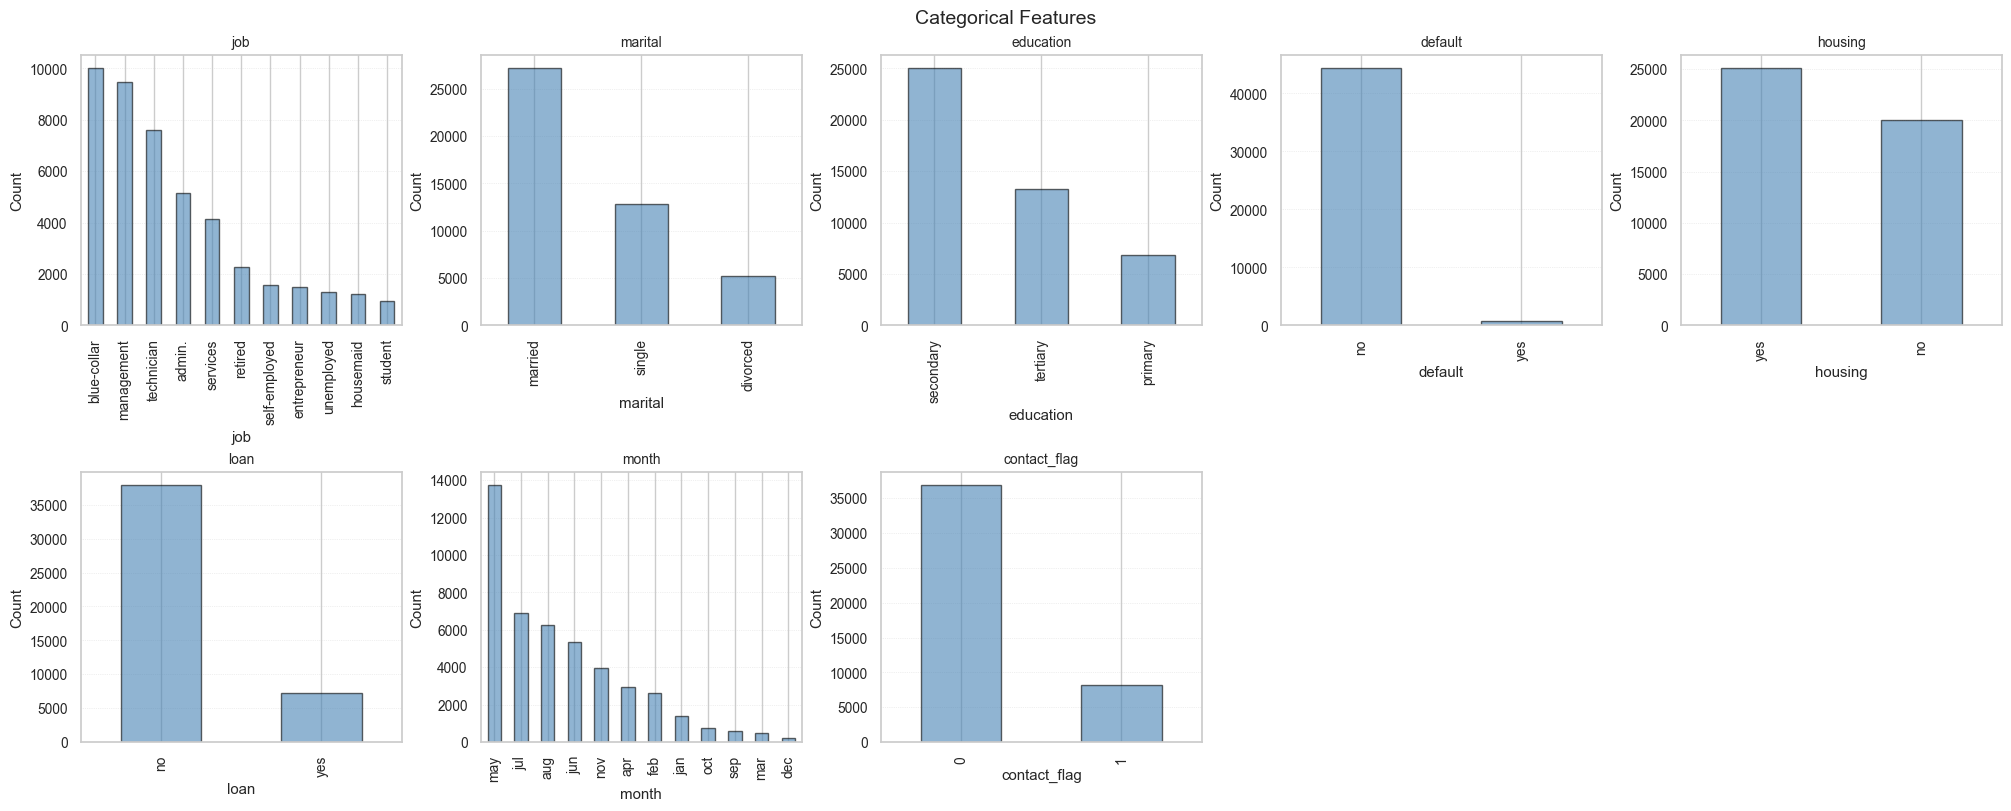

In [39]:
plot_categorical_bars(df_missing, cat_missing, n_cols=5)
plot_categorical_bars(df_ot_missing, cat_ot_missing, n_cols=5)

## **7.4. Training and Testing Sample**

**Splitting the Data**
- **70%** of data is used as Training data and the rest **30%** is used as Testing data.

### **7.4.1. Spliting on Outlier-Treated Data + Missing Values**

In [40]:
target_ot_missing = ['y']
predicted_ot_missing = num_ot_missing + cat_ot_missing
print('Predictors List:', predicted_ot_missing)
print('Number of predictors:', len(predicted_ot_missing))
print('Target Variable:', target_ot_missing)
print('Number of target:', len(target_ot_missing))

Predictors List: ['age', 'balance', 'day_of_week', 'campaign', 'pdays_actual', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contact_flag']
Number of predictors: 14
Target Variable: ['y']
Number of target: 1


In [41]:
X = df_ot_missing[predicted_ot_missing]
y = df_ot_missing[target_ot_missing ]
X_train_ot_missing, X_test_ot_missing, y_train_ot_missing, y_test_ot_missing = train_test_split(X, y, test_size=0.3, random_state=42)

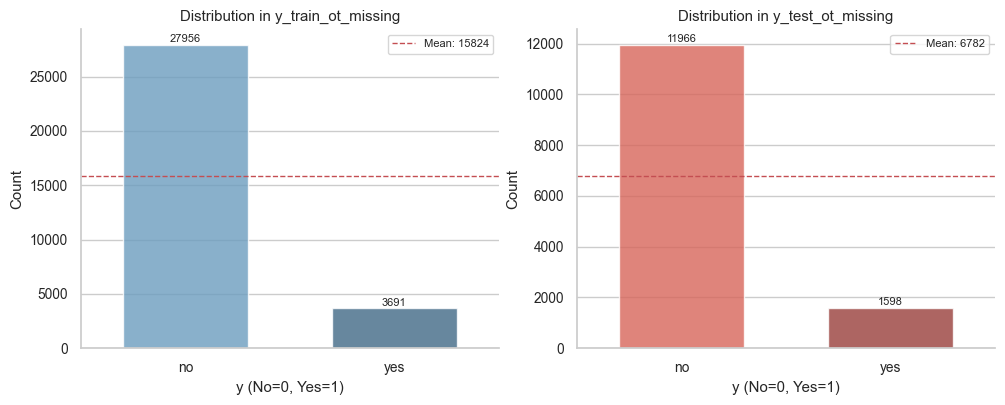

In [42]:
sns.set(style="whitegrid", font_scale=0.9)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, (data, color, name) in zip(
    axes, [(y_train_ot_missing, "Blues_d", "y_train_ot_missing"), (y_test_ot_missing, "Reds_d", "y_test_ot_missing")]):
    c = data["y"].value_counts().sort_index().reset_index()
    c.columns = ["y", "count"]
    sns.barplot(data=c, x="y", y="count", hue="y", palette=color,
                alpha=0.8, ax=ax, width=0.6, legend=False)
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2, p.get_height()+30, int(p.get_height()),
                ha="center", va="bottom", fontsize=8)
    mean = c["count"].mean()
    ax.axhline(mean, color="r", ls="--", lw=1)
    ax.legend(handles=[mlines.Line2D([], [], color='r', ls='--', lw=1,
               label=f"Mean: {mean:.0f}")], loc="upper right", fontsize=8)
    ax.set(title=f"Distribution in {name}", xlabel="y (No=0, Yes=1)", ylabel="Count")
    sns.despine(ax=ax)
plt.tight_layout(pad=0.5)
plt.show()

In [43]:
train_df_ot_missing = X_train_ot_missing.copy()
train_df_ot_missing["y"] = y_train_ot_missing
test_df_ot_missing = X_test_ot_missing.copy()
test_df_ot_missing["y"] = y_test_ot_missing
print(train_df_ot_missing.shape)
print(test_df_ot_missing.shape)

(31647, 15)
(13564, 15)


### **7.4.2. Spliting on Without Outlier-Treated Data + Missing Values**

In [44]:
target_missing = ['y']
predicted_missing = num_missing + cat_missing
print('Predictors List:', predicted_missing)
print('Number of predictors:', len(predicted_missing))
print('Target Variable:', target_missing)
print('Number of target:', len(target_missing))

Predictors List: ['age', 'balance', 'day_of_week', 'campaign', 'pdays', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
Number of predictors: 13
Target Variable: ['y']
Number of target: 1


In [45]:
X = df_missing[predicted_missing]
y = df_missing[target_missing ]
X_train_missing, X_test_missing, y_train_missing, y_test_missing = train_test_split(X, y, test_size=0.3, random_state=42)

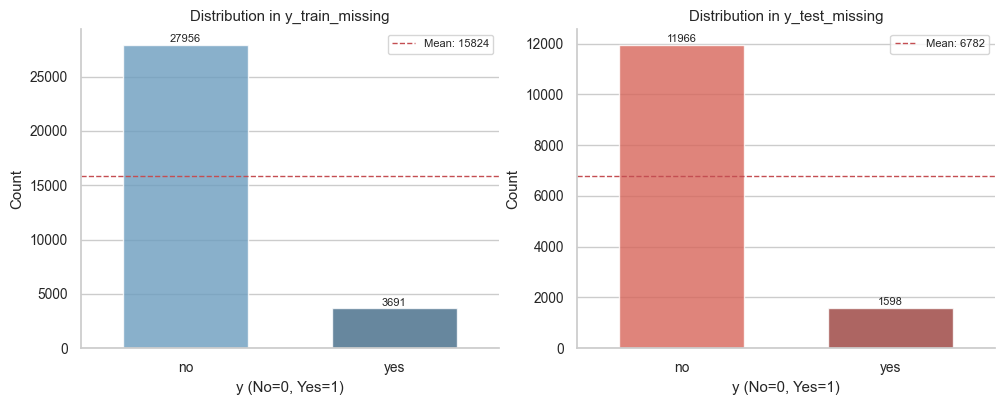

In [46]:
sns.set(style="whitegrid", font_scale=0.9)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, (data, color, name) in zip(
    axes, [(y_train_missing, "Blues_d", "y_train_missing"), (y_test_missing, "Reds_d", "y_test_missing")]):
    c = data["y"].value_counts().sort_index().reset_index()
    c.columns = ["y", "count"]
    sns.barplot(data=c, x="y", y="count", hue="y", palette=color,
                alpha=0.8, ax=ax, width=0.6, legend=False)
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2, p.get_height()+30, int(p.get_height()),
                ha="center", va="bottom", fontsize=8)
    mean = c["count"].mean()
    ax.axhline(mean, color="r", ls="--", lw=1)
    ax.legend(handles=[mlines.Line2D([], [], color='r', ls='--', lw=1,
               label=f"Mean: {mean:.0f}")], loc="upper right", fontsize=8)
    ax.set(title=f"Distribution in {name}", xlabel="y (No=0, Yes=1)", ylabel="Count")
    sns.despine(ax=ax)
plt.tight_layout(pad=0.5)
plt.show()

In [47]:
train_df_missing = X_train_missing.copy()
train_df_missing["y"] = y_train_missing
test_df_missing = X_test_missing.copy()
test_df_missing["y"] = y_test_missing
print(train_df_missing.shape)
print(test_df_missing.shape)

(31647, 14)
(13564, 14)


# **8. Feature Selection by Visual Correlation Analysis and Statistical Measurement**
---
## **8.1. Feature Selection for Outlier-Treated Data**
### **8.1.1. Relationship Exploration: Categorical Vs Categorical**
#### **8.1.1.1. Visual Exploration Using Grouped Bar Plots**

In [48]:
train_df_missing['y'] = train_df_missing['y'].map({'no': 0, 'yes': 1})
train_df_ot_missing['y'] = train_df_ot_missing['y'].map({'no': 0, 'yes': 1})

In [49]:
def plot_grouped_bar_grid(df, x_cols, y_col, n_cols=3):
    sns.set(style="whitegrid", font_scale=0.8)
    rows = ceil(len(x_cols) / n_cols)
    fig, axes = plt.subplots(rows, n_cols, figsize=(4*n_cols, 3*rows), constrained_layout=True)
    custom_palette = ["steelblue", "red"]
    for ax, col in zip(axes.flatten(), x_cols):
        sns.countplot(data=df, x=col, hue=y_col, palette=custom_palette,edgecolor="gray", alpha=0.6, ax=ax)
        ax.set_title(f"{col} vs {y_col}", fontsize=9, pad=6)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.tick_params(axis="x", rotation=50, labelsize=7)
        ax.tick_params(axis="y", labelsize=7)
        ax.legend(title=y_col, fontsize=7, frameon=False, loc="best")
        ax.grid(axis="y", linestyle=":", alpha=0.4)
    for ax in axes.flatten()[len(x_cols):]:
        ax.set_visible(False)
    plt.suptitle(f"Grouped Bar Plots vs {y_col}", fontsize=12, weight="bold", y=1.02)
    plt.tight_layout(pad=0.5)
    sns.despine()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27704\756220485.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.5)


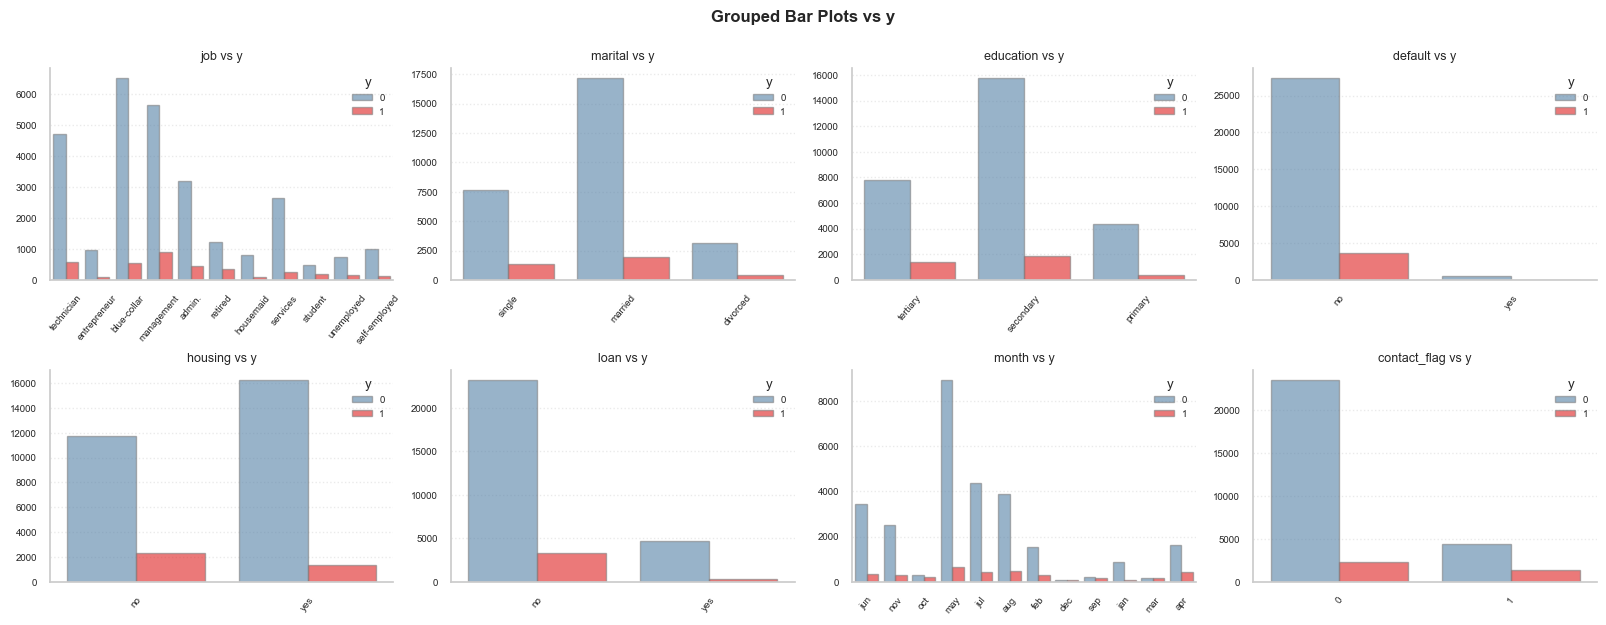

In [50]:
plot_grouped_bar_grid(train_df_ot_missing, x_cols=cat_ot_missing, y_col='y', n_cols=4)

#### **8.1.1.2. Grouped Bar Plots Visual Interpretation**

| Feature        | Key Insight                                      | Effect Level                             |
|----------------|---------------------------------------------------------------|-----------------------------------------------------------|
| **`default`**        | "Yes" → almost no subscription                             | Very strong effect                                      |
|                | "No" → much higher subscription                             | No-default customers subscribe far more                 |
| **`contact_flag`**   | Contacted customers subscribe much more                     | Very strong positive effect                             |
|                | Non-contacted → very low subscription                       | Contact greatly increases subscription chances          |
| **`month`**         | May, Jul, Aug, Feb, Apr → higher subscription               | High effect                                             |
|                | Most other months show low subscription                     | Timing influences subscription outcomes                 |
| **`job`**            | Students, retired → higher subscription                     | Medium effect                                           |
|                | Blue-collar → low subscription                              | Some job groups are more likely to subscribe           |
| **`education`**      | Tertiary slightly higher                                    | Medium–low effect                                       |
|                | Primary & secondary look similar                             | Not a strong predictor                                  |
| **`marital`**        | Single slightly higher                                      | Low effect                                              |
|                | Married/divorced very similar                                | Small differences across groups                         |
| **`housing`**        | “Yes” and “No” look almost identical                        | Very low effect                                         |
|                | y=1 nearly equal                                             | Housing loan does not impact subscription               |
| **`loan`**           | Yes/No groups almost the same                                | Very low effect                                         |
|                | Very small differences                                       | Loan status does not meaningfully affect subscription   |

#### **8.1.1.3. Statistical Feature Selection Method**

- Using **Chi-square** and **Mutual Information** together helps assess both **linear and non-linear relationships** with the target.

In [51]:
X_cat_encoded = train_df_ot_missing[cat_ot_missing].apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(train_df_ot_missing['y'])

# Chi-squared and Mutual Information
chi_scores, p_values = chi2(X_cat_encoded, y_encoded)
chi2_results = pd.DataFrame({'Feature': cat_ot_missing, 'Chi2 Score': chi_scores, 'p-value': p_values}).sort_values('Chi2 Score', ascending=False)
mi_scores = mutual_info_classif(X_cat_encoded, y_encoded, discrete_features=True, random_state=42)
mi_results = pd.DataFrame({'Feature': cat_ot_missing,'MI Score': mi_scores}).sort_values('MI Score', ascending=False)

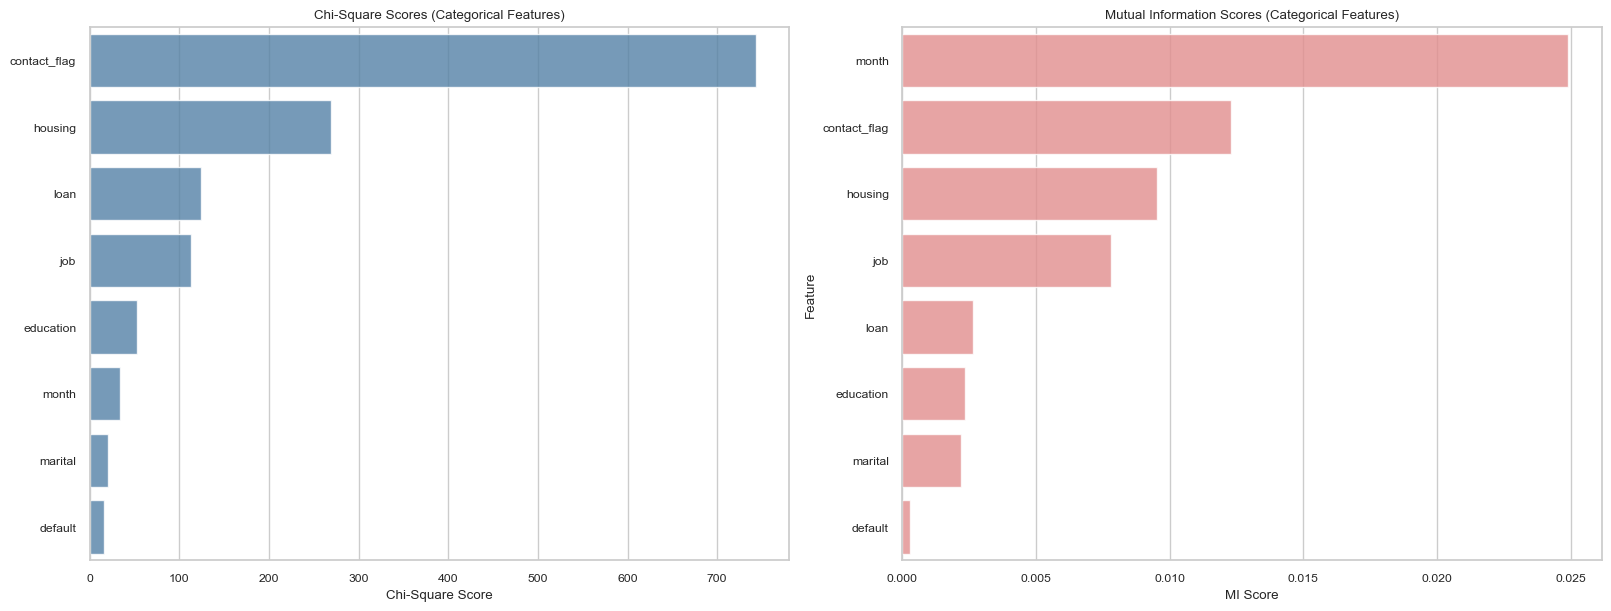

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_results,color='steelblue', ax=axes[0], alpha=0.8)
axes[0].set_title("Chi-Square Scores (Categorical Features)")
axes[0].set_xlabel("Chi-Square Score")
axes[0].set_ylabel("")
sns.barplot(x='MI Score', y='Feature', data=mi_results,color='lightcoral', ax=axes[1], alpha=0.8)
axes[1].set_title("Mutual Information Scores (Categorical Features)")
axes[1].set_xlabel("MI Score")
axes[1].set_ylabel("Feature")
plt.show()

#### **8.1.1.4. Chi-square and Mutual Information Interpretation**

| Feature                       | Insight                                                                                          | Effect Level               |
|-------------------------------|---------------------------------------------------------------------------------------------------------------------------|-----------------------------|
| **`contact_flag`**                  | Strongest separation between contacted vs. not contacted                                                                | Very strong effect        |
|                               | Both Chi-Square and MI show large, meaningful differences                                                               | Most important predictor  |
| **`housing`** & **`job`**                | Clear differences across housing loan status and job types                                                               | Medium–high effect        |
|                               | Patterns are statistically significant and meaningful                                                                   | Useful supporting features|
| **`month`**                         | Chi-Square weak, but MI high — indicates complex, non-linear patterns                                                   | Moderate effect           |
|                               | Seasonal timing, campaign cycles, and month-specific behavior influence subscription                                    | Subtle but important      |
| **`loan`**                          | Small differences between loan = yes/no                                                                                 | Low effect                |
|                               | Some statistical significance but overall weak predictive value                                                          | Slight influence          |
| **`marital`** & **`education`**           | Very small differences across groups                                                                                    | Very low effect           |
|                               | Both tests show weak relationships                                                                                      | Minimal contribution      |
| **`default`**                       | Almost no relationship with subscription                                                                                | Weakest effect            |
|                               | Very few “yes” cases → statistical tests detect no meaningful difference                                                | Not useful as predictor   |

#### **8.1.1.5. Selection of Categorical Feature in Outlier-Treated Data**

We rely more on ***statistical feature selection methods*** than on visual inspection, because statistical measures **can reveal relationships in both linear and non-linear domains.** Based on the Chi-Square and Mutual Information results.So, we selected the following features

---

**Selection Criteria**<br>
- Chi-Square Test → measures linear association between category groups and the target
- Mutual Information (MI) → captures non-linear and hidden patterns

***CHOOSE IF*** | **Chi-Square score is > 100** OR **MI score is > 0.005**

---

**1. `contact_flag`**<br>
- This feature has the strongest relationship with the target in both Chi-Square and Mutual Information.<br>
- It is the most important feature and receives the highest priority.

**2. `housing`**<br>
- This features have high Chi-Square scores, showing strong linear relationships with the target.<br>
- For this reason, they are included as important predictors.

**3.`loan`**<br>
- This features have high Chi-Square scores, showing strong linear relationships with the target.<br>
- For this reason, they are included as important predictors.

**4. `month`**<br>
- Although its Chi-Square score is low, it has the highest Mutual Information value.<br>
- This means month captures complex non-linear patterns that are still highly related to the target. Therefore, month is also selected.

**5. `job`**<br>
- The Chi-Square score is in the moderate range (greater than 100).<br>
- Its Mutual Information score is even better, indicating that job may contain meaningful patterns.<br>
- We include job because it has potential to become a significant feature for future feature-importance analysis.

In [53]:
s_cat_ot_missing = ['contact_flag', 'housing', 'loan', 'month','job']

### **8.1.2. Relationship Exploration: Categorical Vs Continuous**

#### **8.1.2.1. Visual Exploration Using Box Plots**

In [54]:
def plot_box_grid(df, x_cols, y_col='y', n_cols=3):
    n_rows = ceil(len(x_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), constrained_layout=True)
    axes = axes.flatten()
    for i, col in enumerate(x_cols):
        sns.boxplot(data=df, x=y_col, y=col, hue=y_col, palette=["steelblue", "lightcoral"],
                    legend=False, width=0.6, showfliers=True, boxprops={'alpha': 0.7}, ax=axes[i])
        axes[i].set(title=f"{col} vs {y_col}", xlabel=y_col, ylabel=col)
        axes[i].grid(linestyle=":", alpha=0.5)
    for ax in axes[len(x_cols):]:
        ax.set_visible(False)
    fig.suptitle(f"Boxplots of Numerical Features vs {y_col}", fontsize=14)
    plt.show()

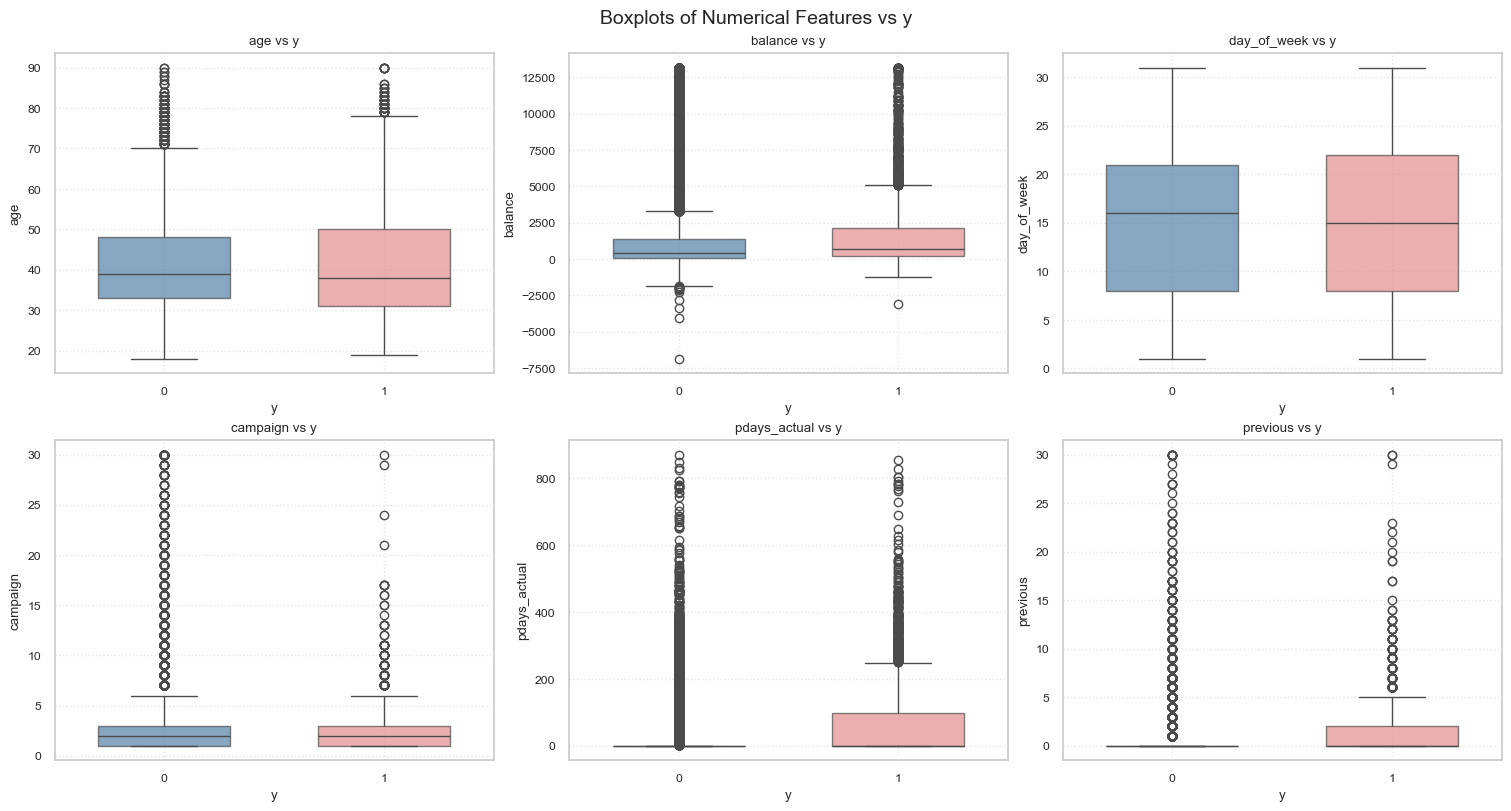

In [55]:
plot_box_grid(train_df_ot_missing, num_ot_missing, y_col='y', n_cols=3)

#### **8.1.2.2. ฺBox Plots Visual Interpretation**

| Feature                      | Insight                                                                | Effect Level            |
|------------------------------|-------------------------------------------------------------------------------------------|--------------------------|
| **`pdays_actual`** & **`previous`**     | Clear separation between y=0 and y=1                                                   | Strong effect          |
|                              | Subscribers often had prior contact or were contacted long ago                         | Meaningful information |
| **`balance`** & **`campaign`**           | Small but noticeable differences                                                       | Moderate effect        |
|                              | Higher balance and fewer contact attempts align slightly with higher subscription       | Mild but useful        |
| **`age`** & **`day_of_week`**            | Very little separation between y=0 and y=1                                             | Weak effect            |
|                              | Minimal contribution to prediction                                                     | Low modeling value     |

#### **8.1.2.3. Statistical Feature Selection Method**

- **ANOVA :**  Applied to assess the statistical significance of categorical predictors with respect to the target variable.

In [56]:
anova_results = []
for col in num_ot_missing:
    g0 = train_df_ot_missing[train_df_ot_missing['y']==0][col].dropna()
    g1 = train_df_ot_missing[train_df_ot_missing['y']==1][col].dropna()
    f_stat, p_val = f_oneway(g0, g1)
    anova_results.append((col, p_val))

anova_results = sorted(anova_results, key=lambda x: x[1])

print("------- ANOVA Results -------\n")
significant = []
for col, p_val in anova_results:
    if p_val < 0.05:
        print(f"{col} is significantly correlated with y | P-Value: {p_val:.3e}")
        significant.append(col)
    else:
        print(f"{col} is NOT significantly correlated with y | P-Value: {p_val}")
print("\nSignificant predictors:", significant)

------- ANOVA Results -------

previous is significantly correlated with y | P-Value: 8.527e-102
pdays_actual is significantly correlated with y | P-Value: 7.489e-80
campaign is significantly correlated with y | P-Value: 5.491e-40
balance is significantly correlated with y | P-Value: 1.822e-30
age is significantly correlated with y | P-Value: 1.437e-06
day_of_week is significantly correlated with y | P-Value: 1.602e-05

Significant predictors: ['previous', 'pdays_actual', 'campaign', 'balance', 'age', 'day_of_week']


- **Mutual Information :** Features with a score above **0.005** are **retained** for further analysis.    
- **Pearson's Correlation :** Used to check **multicollinearity** between continuous features, if the correlation is **more than 0.5** we will **retained** one feature that **the most significant to target.**

In [57]:
# Compute MI
X, y = train_df_ot_missing[num_ot_missing], train_df_ot_missing['y']
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create MI DataFrame
mi_df = (pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
         .sort_values('MI Score', ascending=False)
         .reset_index(drop=True))

# Compute Pearson correlation
corr = train_df_ot_missing[num_ot_missing].corr('pearson')

C:\Users\User\AppData\Local\Temp\ipykernel_27704\1544568800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='viridis', ax=axes[0])


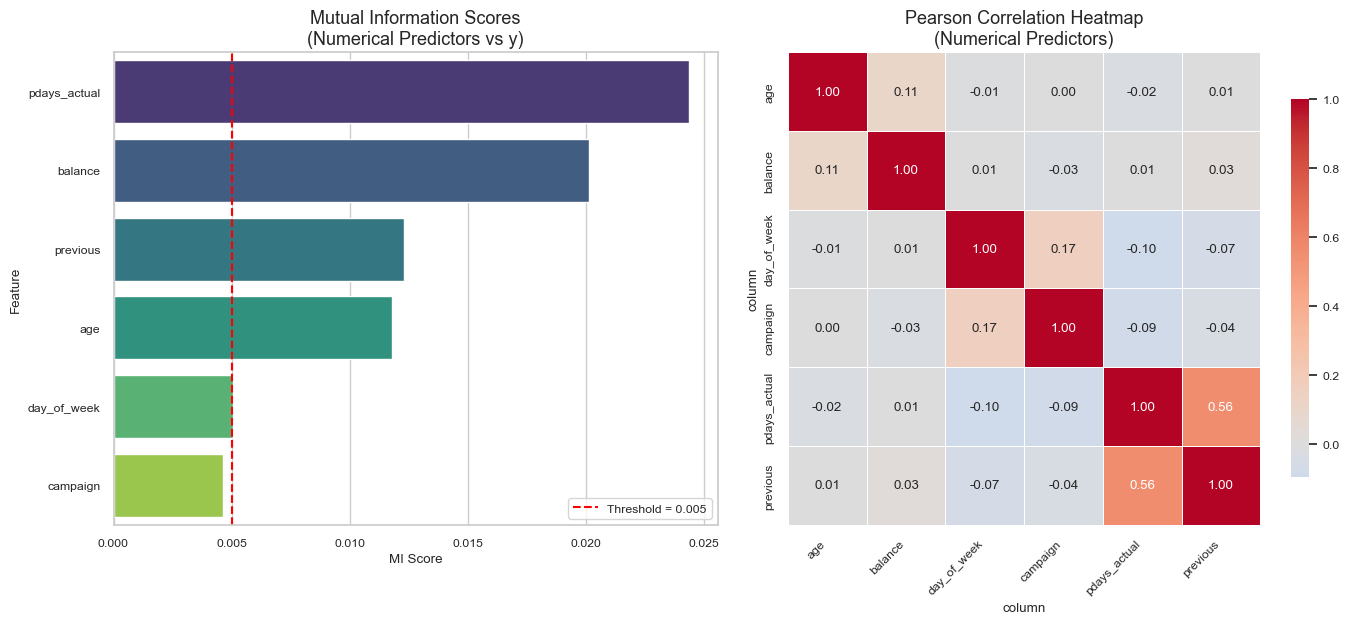

In [58]:
# Set up subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Mutual Information Barplot ---
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='viridis', ax=axes[0])
axes[0].set_title("Mutual Information Scores\n(Numerical Predictors vs y)", fontsize=13)
axes[0].axvline(0.005, color='red', ls='--', label='Threshold = 0.005')
axes[0].legend()
axes[0].set_xlabel("MI Score")
axes[0].set_ylabel("Feature")

# --- Plot 2: Pearson Correlation Heatmap ---
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, square=True, 
            cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title("Pearson Correlation Heatmap\n(Numerical Predictors)", fontsize=13)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout for neatness
plt.tight_layout()
plt.show()

#### **8.1.2.4. Pearson's Correlation,Mutual Information and ANOVA Interpretation**

| Feature        | Insight                                                                                                                            |
|----------------|------------------------------------------------------------------------------------------------------------------------------------|
| **`pdays_actual`**   | **Highest MI score** → strongest non-linear relationship with y.                                                                     |
|                | **Very weak Pearson correlation** with y → the effect is not linear.                                                                |
|                | **ANOVA p-value extremely small (7.489e-80)** → distributions between y=0 and y=1 are significantly different.                      |
|                | Correlation with y is weak but MI shows hidden patterns that linear correlation cannot capture.                                  |
|                | Also positively correlated with previous (0.56), which makes sense: more past contact → more pdays records.                      |
|                | Interpretation: Highly important feature. Strong non-linear effects and strong group differences.                                 |
| **`balance`**        | **Second highest MI score** → meaningful non-linear relationship.                                                                    |
|                | **Very low Pearson correlation** → linear pattern is weak.                                                                           |
|                | **ANOVA p-value extremely small (1.822e-30)** → strong statistical difference in group means.                                        |
|                | Correlation with y is very low, which means the effect is non-linear (not captured by Pearson).                                  |
|                | Customers with higher balance tend to show slightly higher subscription probability.                                             |
|                | Minimal correlation with other features → low multicollinearity.                                                                 |
|                | Interpretation: Strong non-linear predictor with statistically significant group differences.                                     |
| **`previous`**       | **Medium MI score** → provides useful information about y.                                                                            |
|                | **Low Pearson correlation** → effect is non-linear.                                                                                  |
|                | **ANOVA p-value extremely small (8.527e-102)** → one of the strongest statistically significant differences.                         |
|                | Interpretation: Related with pdays_actual and very informative.                                                                   |
| **`age`**            | **Moderate MI score** → a small non-linear signal exists.                                                                            |
|                | **Pearson correlation near zero** → minimal linear effect.                                                                           |
|                | **ANOVA p-value small (1.437e-06)** → statistically different group means, but effect size is small.                                 |
|                | Interpretation: Age affects subscription mildly and mostly in a non-linear way.                                                  |
| **`day_of_week`**    | **Low MI score** → very weak non-linear relationship.                                                                                |
|                | **Pearson correlation almost zero** → no linear relationship.                                                                        |
|                | **ANOVA p-value small (1.602e-05)** → statistically significant difference, but effect is extremely small.                           |
|                | Interpretation: Statistically significant, but practically weak. Not a strong predictor.                                         |
| **`campaign`**       | **Lowest MI score** → minimal non-linear information.                                                                                |
|                | **Slight negative correlation** → more contacts → lower subscription probability.                                                    |
|                | **ANOVA p-value very small (5.491e-40)** → group means differ statistically.                                                         |
|                | Makes sense: repeated calls often indicate the customer is not interested.                                                       |
|                | Interpretation: Weak predictor; significance comes from large sample size, not strong effect.                                    |


#### **8.1.2.5. Selection of Numerical Feature in Outlier-Treated Data**

We rely on ***statistical feature selection methods*** because they reveal relationships in both linear and non-linear domains. The selection is based on Pearson Correlation, Mutual Information (MI), and ANOVA.

---

**Selection Criteria**<br>
- MI captures non-linear patterns.
- Pearson Correlation captures linear relationships.
- ANOVA identifies significant group differences.<br>

***CHOOSE IF*** | **strong MI (>0.005)** OR **significant ANOVA p-value** OR **a logical relationship supported by correlation with no multicollinearity**.

---

**1. `pdays_actual`**<br>

Represents how long it has been since the customer was last contacted.

Reasons for selection:
- Highest MI score → strongest non-linear behavior  
- Extremely significant ANOVA result → clear statistical difference between y=0 and y=1  
- Minimal multicollinearity except expected correlation with `previous`  
- Offers richer behavioral meaning than `previous`, which only counts past contacts  
- Real-world logic: recency of contact strongly influences readiness to subscribe  

**We select pdays_actual over previous because it carries more meaningful and precise engagement information.**

**2. `balancee`**<br>

Represents the customer’s financial capacity.

Reasons for selection:
- High MI score → meaningful non-linear signal  
- Highly significant ANOVA p-value → groups differ clearly  
- Very low correlation with other features → clean, independent predictor  
- Real-world interpretation: customers’ financial stability impacts their willingness to subscribe  

**balance adds stable and practical predictive value to the model.**

**3. `age`**<br>

Represents demographic characteristics linked to financial maturity and decision patterns.

Reasons for selection:
- Moderate MI score → small but detectable non-linear influence  
- Significant ANOVA result → y=0 and y=1 show statistical differences  
- Very low correlation with other variables → minimal multicollinearity  
- Provides consistent demographic context that supports customer profiling  

**age is selected for its meaningful demographic contribution despite a moderate effect size.**

In [59]:
s_num_ot_missing = ['pdays_actual', 'balance', 'age']

## **8.2. Feature Selection for Non–Outlier-Treated Data**

### **8.2.1. Relationship Exploration: Categorical Vs Categorical**

#### **8.2.1.1. Visual Exploration Using Group Bar Plots**

C:\Users\User\AppData\Local\Temp\ipykernel_27704\756220485.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.5)


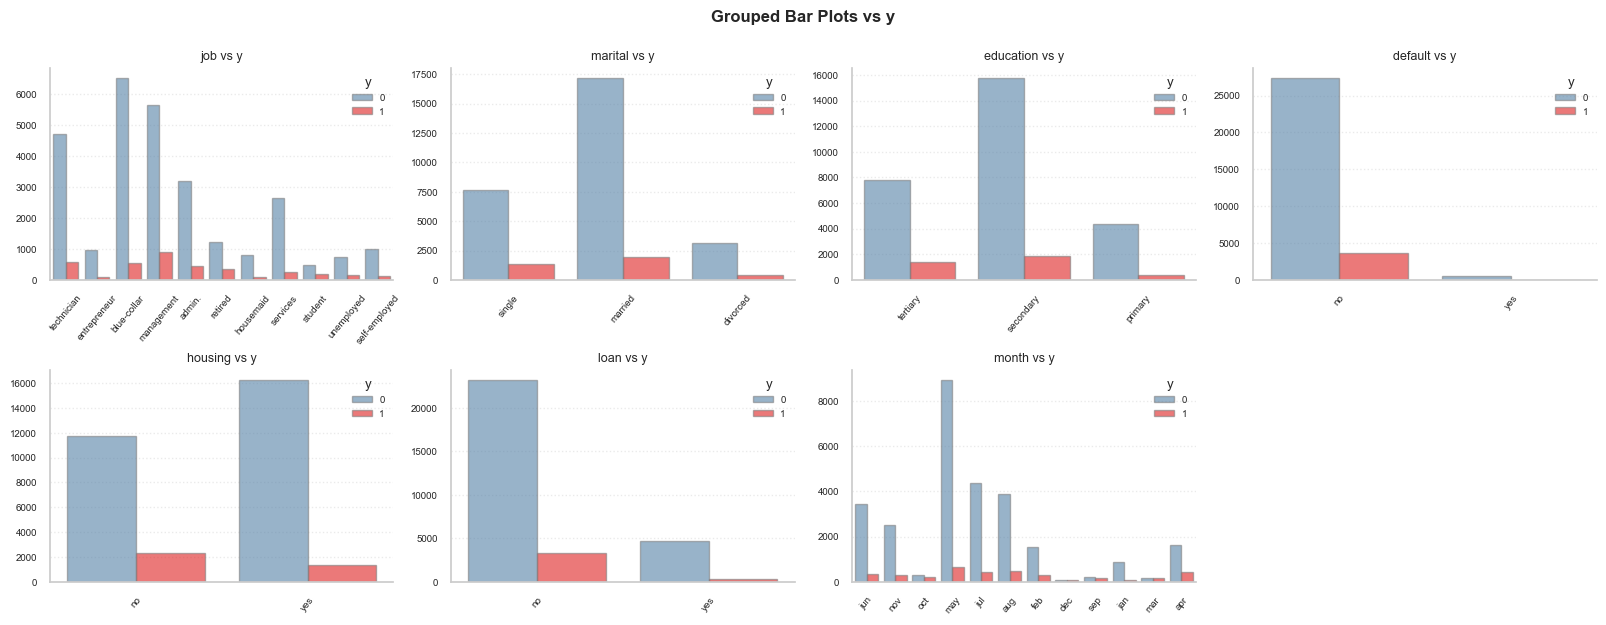

In [60]:
plot_grouped_bar_grid(train_df_missing, x_cols=cat_missing, y_col='y', n_cols=4)

#### **8.2.1.2. Grouped Bar Plots Visual Interpretation**

| Feature      | Insight from Grouped Bar Plot (y=0 vs y=1)                                           | Effect Level          |
|--------------|--------------------------------------------------------------------------------------|----------------------|
| **`job`**      | Students and retired have higher y=1 counts                                          | Medium effect        |
|                | Blue-collar and services show lower y=1                                              | Job type influences behavior |
| **`marital`**  | Single slightly higher y=1                                                           | Low effect           |
|                | Married and divorced very similar                                                    | Minimal separation   |
| **`education`**| Tertiary/secondary show small increase in y=1                                        | Low–medium effect    |
|                | Primary shows lower y=1                                                              | Weak but visible     |
| **`default`**  | Default = yes shows almost no y=1                                                    | Very low effect      |
|                | Default = no shows most y=1                                                          | Driven by class imbalance |
| **`housing`**  | Yes/no categories look almost identical                                              | Very low effect      |
|                | y=1 proportions nearly the same                                                      | No meaningful influence |
| **`loan`**     | Yes/no categories show very small difference                                         | Very low effect      |
|                | Almost identical y=1 distribution                                                    | Weak influence       |
| **`month`**    | Certain months (May, July, August, Feb, Apr) show higher y=1                         | Medium–high effect   |
|                | Other months show very low y=1                                                       | Timing matters       |


#### **8.2.1.3. Statistical Feature Selection Method**

- Using **Chi-square** and **Mutual Information** together helps assess both **linear and non-linear relationships** with the target.

In [61]:
X_cat_encoded = train_df_missing[cat_missing].apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(train_df_missing['y'])

# Chi-squared and Mutual Information
chi_scores, p_values = chi2(X_cat_encoded, y_encoded)
chi2_results = pd.DataFrame({'Feature': cat_missing, 'Chi2 Score': chi_scores, 'p-value': p_values}).sort_values('Chi2 Score', ascending=False)
mi_scores = mutual_info_classif(X_cat_encoded, y_encoded, discrete_features=True, random_state=42)
mi_results = pd.DataFrame({'Feature': cat_missing,'MI Score': mi_scores}).sort_values('MI Score', ascending=False)

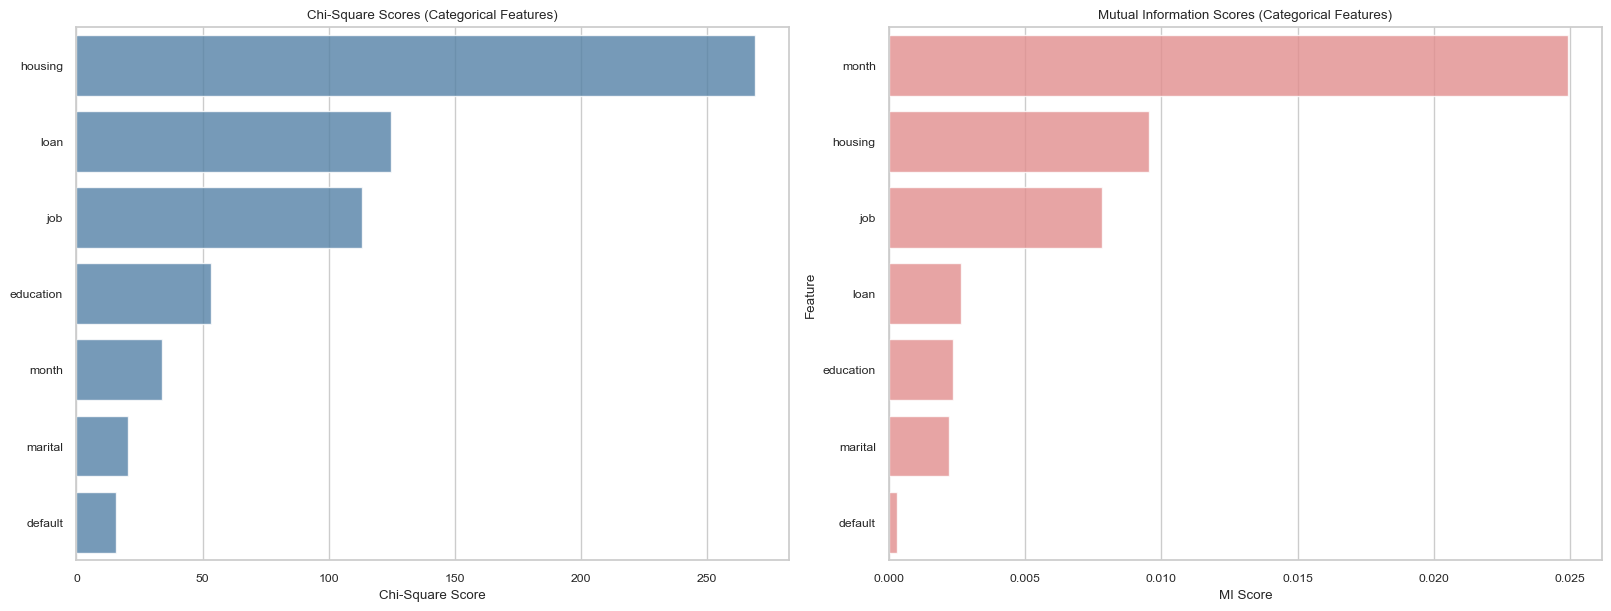

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_results,color='steelblue', ax=axes[0], alpha=0.8)
axes[0].set_title("Chi-Square Scores (Categorical Features)")
axes[0].set_xlabel("Chi-Square Score")
axes[0].set_ylabel("")
sns.barplot(x='MI Score', y='Feature', data=mi_results,color='lightcoral', ax=axes[1], alpha=0.8)
axes[1].set_title("Mutual Information Scores (Categorical Features)")
axes[1].set_xlabel("MI Score")
axes[1].set_ylabel("Feature")
plt.show()

#### **8.2.1.4. Chi-square and Mutual Information Interpretation**

| Feature    | Insight                                                                                    | Effect Level            |
|------------|--------------------------------------------------------------------------------------------|--------------------------|
| **`housing`**      | Highest Chi-Square score among all features                                                | Strong linear effect   |
|                    | High MI score (~0.01) → also strong non-linear relationship                                | Important predictor    |
| **`loan`**         | High Chi-Square score (similar to job)                                                     | Moderate linear effect |
|                    | MI score is moderate (~0.003)                                                              | Some non-linear value  |
| **`job`**          | Strong Chi-Square score                                                                    | Medium–strong effect   |
|                    | MI score also relatively high (~0.007)                                                     | Useful non-linear info |
| **`education`**    | Medium Chi-Square score                                                                    | Low–medium effect      |
|                    | MI score is small (~0.0025)                                                                | Weak non-linear signal |
| **`month`**        | Low Chi-Square score → weak linear relationship                                            | Complex effect         |
|                    | **Highest MI score (~0.025)** among all → strong non-linear relationship                   | Subtle but important   |
| **`marital`**      | Low Chi-Square score                                                                       | Weak effect            |
|                    | Low MI score (~0.002)                                                                      | Minimal importance     |
| **`default`**      | Very low Chi-Square score                                                                  | Very weak effect       |
|                    | MI score almost zero                                                                       | Not useful             |

#### **8.2.1.5. Selection of Categorical Feature in No Outlier-Treated Data**

We rely more on ***statistical feature selection methods*** than on visual inspection, because statistical measures **can reveal relationships in both linear and non-linear domains.** Based on the Chi-Square and Mutual Information results.So, we selected the following features

---

**Selection Criteria**<br>
- Chi-Square Test → measures linear association between category groups and the target
- Mutual Information (MI) → captures non-linear and hidden patterns

***CHOOSE IF*** | **Chi-Square score is > 100** OR **MI score is > 0.005**

---

**1. `housing`**<br>
- This feature has the highest Chi-Square score among all categorical features, showing a strong linear relationship with the target.<br>
- MI score is also high, confirming that the relationship includes non-linear components as well.
- For these reasons, housing is selected as an important predictor.

**2. `job`**<br>
- Chi-Square score is strong (greater than 100), indicating meaningful separation across job categories.<br>
- MI score is also high, suggesting that job captures additional non-linear patterns.
- Because both metrics agree, job is selected as a reliable categorical feature.

**3.`loan`**<br>
- This feature shows a high Chi-Square score, which means its categories differ meaningfully with respect to the target.<br>
- Its MI score is moderate but still supportive.
- Due to its strong linear signal, loan is included as a selected feature.

**4. `month`**<br>
- Chi-Square score is relatively low, meaning month does not show a simple linear association with the target.
- However, month has the **highest Mutual Information score** among all categorical variables.
- This indicates strong non-linear patterns, such as seasonal effects or time-based behavioral trends.
- Therefore, month is selected because it captures complex but important relationships.

**5. `education`**<br>
- Chi-Square score is moderate, showing some linear difference across groups.
- MI score is small but still indicates subtle non-linear variation.
- Although weaker than other features, education provides additional context and is selected as a supporting predictor.

In [63]:
s_cat_missing = ['housing', 'job', 'loan', 'month','education']

### **8.2.2. Relationship Exploration: Categorical Vs Continuous**

#### **8.2.2.1. Visual Exploration Using Box Plots**

In [64]:
def plot_box_grid(df, x_cols, y_col='y', n_cols=3):
    n_rows = ceil(len(x_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), constrained_layout=True)
    axes = axes.flatten()
    for i, col in enumerate(x_cols):
        sns.boxplot(data=df, x=y_col, y=col, hue=y_col, palette=["steelblue", "lightcoral"],
                    legend=False, width=0.6, showfliers=True, boxprops={'alpha': 0.7}, ax=axes[i])
        axes[i].set(title=f"{col} vs {y_col}", xlabel=y_col, ylabel=col)
        axes[i].grid(linestyle=":", alpha=0.5)
    for ax in axes[len(x_cols):]:
        ax.set_visible(False)
    fig.suptitle(f"Boxplots of Numerical Features vs {y_col}", fontsize=14)
    plt.show()

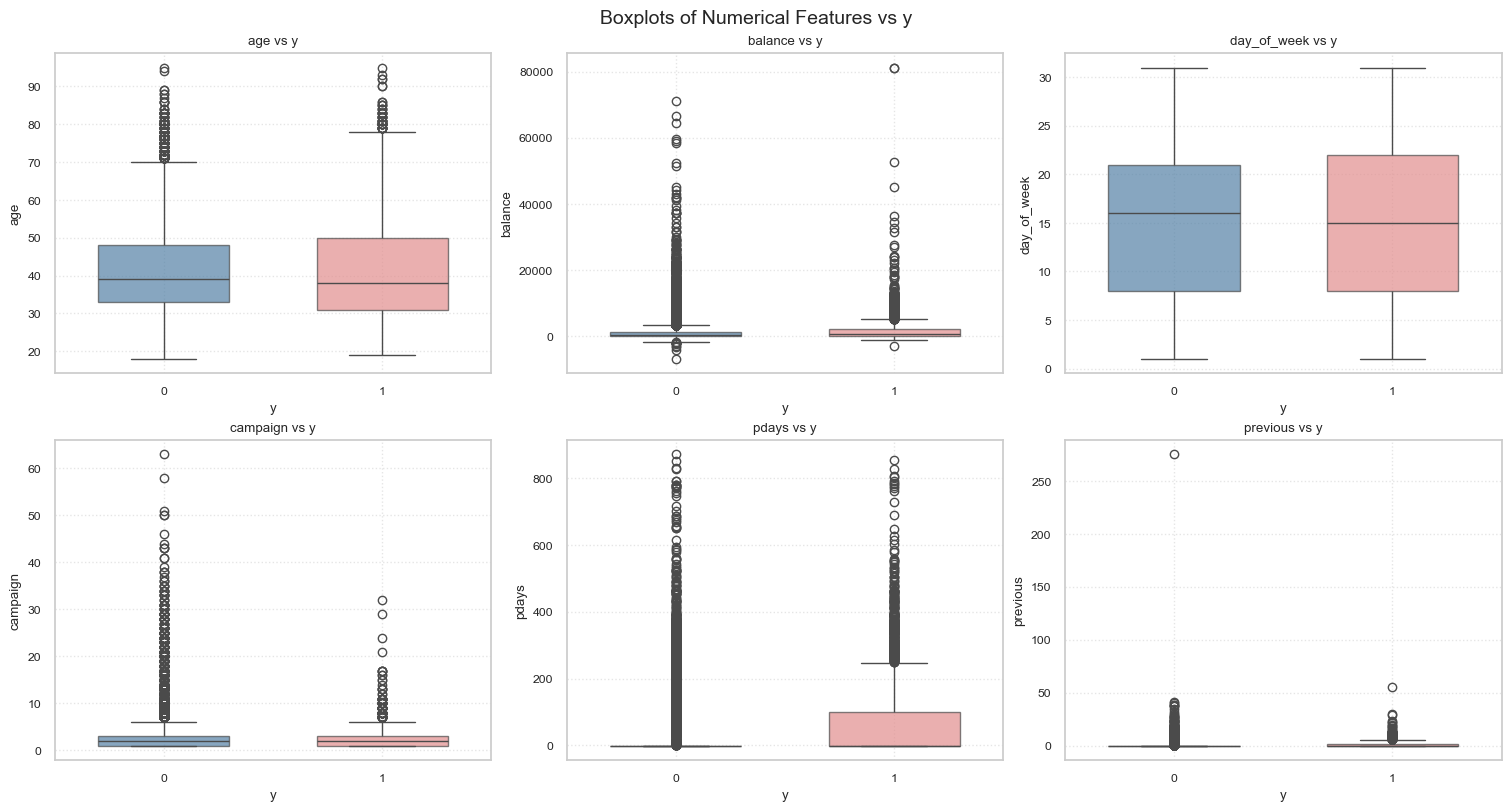

In [65]:
plot_box_grid(train_df_missing, num_missing, y_col='y', n_cols=3)

#### **8.2.2.2. ฺBox Plots Visual Interpretation**

| Feature             | Insight                                         | Effect Level            |
|---------------------|----------------------------------------------------------------------------------|-------------------------|
| **`age`**           |  Distributions for y=0 and y=1 are very similar                                  |  Weak effect            |
|                     |  Median and IQR almost identical                                                 |  Minimal separation     |
| **`balance`**       |  y=1 tends to have slightly higher balance                                       |  Moderate effect        |
|                     |  Large spread and many outliers, but the central tendency shifts upward for y=1  |  Subtle but noticeable  |
| **`day_of_week`**   |  Practically identical distributions for y=0 and y=1                             |  Very weak effect       |
|                     |  No visible separation                                                           |  Minimal contribution   |
| **`campaign`**      |  y=1 generally has fewer contact attempts                                        |  Weak–moderate effect   |
|                     |  y=0 shows more large outliers (many calls)                                      |  Indicates contact fatigue |
| **`pdays`**  |  Strong visible separation: y=1 has much higher pdays values                     |  Strong effect          |
|                     |  y=0 mostly concentrated near zero (not contacted recently)                      |  Clear behavioral pattern |
| **`previous`**      |  Small separation: y=1 slightly higher                                           |  Weak–moderate effect   |
|                     |  Distribution heavily skewed with many zeros                                     |  Limited but useful     |

#### **8.2.2.3. Statistical Feature Selection Method**

- **ANOVA :**  Applied to assess the statistical significance of categorical predictors with respect to the target variable.

In [66]:
anova_results = []
for col in num_missing:
    g0 = train_df_missing[train_df_missing['y']==0][col].dropna()
    g1 = train_df_missing[train_df_missing['y']==1][col].dropna()
    f_stat, p_val = f_oneway(g0, g1)
    anova_results.append((col, p_val))

anova_results = sorted(anova_results, key=lambda x: x[1])

print("------- ANOVA Results -------\n")
significant = []
for col, p_val in anova_results:
    if p_val < 0.05:
        print(f"{col} is significantly correlated with y | P-Value: {p_val:.3e}")
        significant.append(col)
    else:
        print(f"{col} is NOT significantly correlated with y | P-Value: {p_val}")
print("\nSignificant predictors:", significant)

------- ANOVA Results -------

pdays is significantly correlated with y | P-Value: 2.718e-80
previous is significantly correlated with y | P-Value: 3.776e-58
campaign is significantly correlated with y | P-Value: 2.695e-38
balance is significantly correlated with y | P-Value: 4.013e-21
age is significantly correlated with y | P-Value: 1.337e-06
day_of_week is significantly correlated with y | P-Value: 1.602e-05

Significant predictors: ['pdays', 'previous', 'campaign', 'balance', 'age', 'day_of_week']


- **Mutual Information :** Features with a score above **0.005** are **retained** for further analysis.    
- **Pearson's Correlation :** Used to check **multicollinearity** between continuous features, if the correlation is **more than 0.5** we will **retained** one feature that **the most significant to target.**

In [67]:
# Compute MI
X, y = train_df_missing[num_missing], train_df_missing['y']
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create MI DataFrame
mi_df = (pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
         .sort_values('MI Score', ascending=False)
         .reset_index(drop=True))

# Compute Pearson correlation
corr = train_df_missing[num_missing].corr('pearson')

C:\Users\User\AppData\Local\Temp\ipykernel_27704\1544568800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='viridis', ax=axes[0])


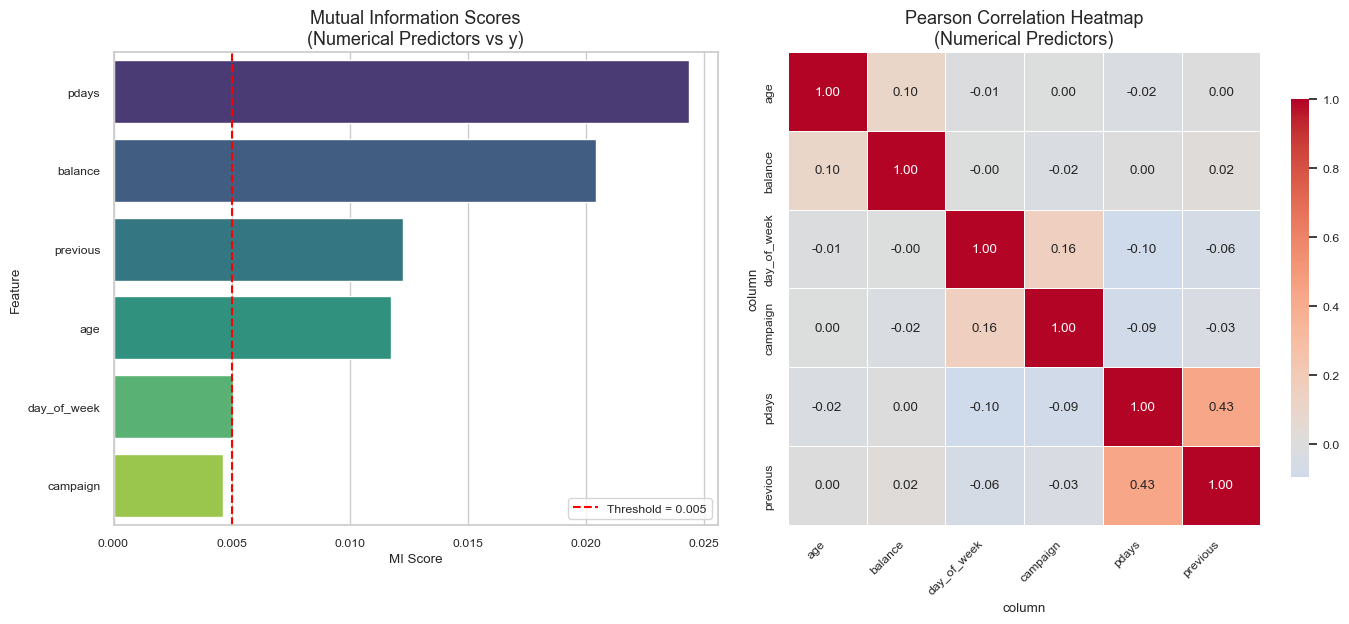

In [68]:
# Set up subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Mutual Information Barplot ---
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='viridis', ax=axes[0])
axes[0].set_title("Mutual Information Scores\n(Numerical Predictors vs y)", fontsize=13)
axes[0].axvline(0.005, color='red', ls='--', label='Threshold = 0.005')
axes[0].legend()
axes[0].set_xlabel("MI Score")
axes[0].set_ylabel("Feature")

# --- Plot 2: Pearson Correlation Heatmap ---
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, square=True, 
            cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title("Pearson Correlation Heatmap\n(Numerical Predictors)", fontsize=13)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout for neatness
plt.tight_layout()
plt.show()

#### **8.2.2.4. Pearson's Correlation,Mutual Information and ANOVA Interpretation**

| Feature        | Insight                                                                                                                            |
|----------------|------------------------------------------------------------------------------------------------------------------------------------|
| **`pdays`**          | **Highest MI score** → strongest non-linear relationship with y.                                                                     |
|                | **Very weak Pearson correlation** → effect is non-linear.                                                                          |
|                | **ANOVA p-value extremely small (2.718e-80)** → strong difference between y=0 and y=1.                                             |
|                | **Positively correlated with previous (0.43)** → more past contact → more pdays records.                                           |
|                | Interpretation: Highly important feature with rich behavioral information and strong non-linear effects.                           |
| **`balance`**        | **Second highest MI score** → meaningful non-linear relationship.                                                                    |
|                | **Very low Pearson correlation** → linear effect is weak.                                                                           |
|                | **ANOVA p-value extremely small (4.013e-21)** → strong difference in group means.                                                   |
|                | Customers with higher balance tend to be slightly more likely to subscribe.                                                         |
|                | Minimal correlation with other features → low multicollinearity.                                                                    |
|                | Interpretation: Strong non-linear predictor with clear statistical significance.                                                     |
| **`previous`**       | **Moderate MI score** → contains useful information about y.                                                                      |
|                | **Low Pearson correlation** → effect is non-linear.                                                                                  |
|                | **ANOVA p-value extremely small (3.776e-58)** → very strong group difference.                                                        |
|                | Interpretation: Provides meaningful behavioral insight and complements pdays.                                                        |
| **`age`**            | **Moderate MI score** → mild non-linear signal exists.                                                                             |
|                | **Pearson correlation near zero** → minimal linear effect.                                                                           |
|                | **ANOVA p-value small (1.337e-06)** → statistically significant but effect size is small.                                           |
|                | Interpretation: Age influences subscription slightly, mostly through non-linear patterns.                                           |
| **`day_of_week`**    | **Low MI score** → very weak non-linear relationship.                                                                                |
|                | **Pearson correlation near zero** → no linear relationship.                                                                          |
|                | **ANOVA p-value small (1.602e-05)** → significant difference but extremely small practical effect.                                   |
|                | Interpretation: Statistically significant due to sample size, but practically weak feature.                                          |
| **`campaign`**       | **Lowest MI score** → minimal non-linear information.                                                                                |
|                | **Slight negative correlation** → more calls → lower subscription.                                                                    |
|                | **ANOVA p-value very small (2.695e-38)** → group means differ statistically.                                                         |
|                | Interpretation: Weak predictor; statistical significance mainly driven by large dataset size.                                        |

#### **8.2.2.5. Selection of Numerical Feature in No Outlier-Treated Data**

We rely on ***statistical feature selection methods*** because they reveal relationships in both linear and non-linear domains. The selection is based on Pearson Correlation, Mutual Information (MI), and ANOVA.

---

**Selection Criteria**<br>
- MI captures non-linear patterns.
- Pearson Correlation captures linear relationships.
- ANOVA identifies significant group differences.<br>

***CHOOSE IF*** | **strong MI (>0.005)** OR **significant ANOVA p-value** OR **a logical relationship supported by correlation with no multicollinearity**.

---

**1. `pdays`**<br>

Represents the number of days since the customer was last contacted. This feature reflects recency of engagement, which is closely tied to readiness to subscribe.

Reasons for selection:
- Highest MI score → strong non-linear signal.  
- Extremely significant ANOVA result → groups differ clearly.  
- Provides richer timing information than `previous`, even though both overlap.  
- Real-world meaning: recent or long-delayed contact strongly affects customer behavior.

We select **pdays** over `previous` because it carries more meaningful behavioral information.

**2. `balance`**<br>

Represents the customer’s financial resources.

Reasons for selection:
- High MI score → meaningful non-linear relationship.  
- Strong ANOVA significance → clear group differences.  
- Very low correlation with other features → no multicollinearity.  
- Real-world relevance: financial capacity influences decision behavior.

`balance` contributes unique and stable information to the model.

**3. `age`**<br>

Represents demographic and lifestyle characteristics relevant to decision patterns.

Reasons for selection:
- Moderate MI score → small but real non-linear effect.  
- Significant ANOVA result → y=0 and y=1 differ statistically.  
- Almost no correlation with other features → independent and clean signal.  
- Supports customer profiling and adds contextual understanding.

Although its effect is modest, **age** provides useful and reliable information.

In [69]:
s_num_missing = ['pdays', 'balance', 'age']

# **9. Selecting Final Predictors for Machine Learning Summary**

- Based on the above tests, selecting the final columns for machine learning

In [70]:
print("Selected Features from Outlier-Treated Pipeline:", s_cat_ot_missing + s_num_ot_missing)
print("Selected Features from No Outlier-Treated Pipeline:", s_cat_missing + s_num_missing)
print(len(s_cat_ot_missing + s_num_ot_missing), len(s_cat_missing + s_num_missing))

Selected Features from Outlier-Treated Pipeline: ['contact_flag', 'housing', 'loan', 'month', 'job', 'pdays_actual', 'balance', 'age']
Selected Features from No Outlier-Treated Pipeline: ['housing', 'job', 'loan', 'month', 'education', 'pdays', 'balance', 'age']
8 8


# **10. Data Preprocessing**

## **10.1. Data Preprocessing for Outlier-Treated Data**

| **Feature Type** | **Feature** |
|------------------|-------------|
| **Binary** | `y`(target), `contact_flag`, `housing`, `loan` |
| **Nominal** | `month`, `job` |
| **Numerical** | `pdays_actual`, `balance`, `age` |

### **10.1.1. Converting Categorical Variable to Numeric**

In [71]:
df_ot_train_map = train_df_ot_missing.copy()
df_ot_test_map = test_df_ot_missing.copy()

#### **10.1.1.1. Converting the *BINARY* variable to numeric using 1/0 mapping**

In [72]:
binary_features = ['y', 'contact_flag', 'housing', 'loan']

- **Training set**

In [73]:
# Convert binary nominal features to numeric (0/1)
for col in binary_features:
    if col in df_ot_train_map.columns:
        if df_ot_train_map[col].dtype == 'object':
            df_ot_train_map[col] = df_ot_train_map[col].map({'No': 0, 'Yes': 1, 'no': 0, 'yes': 1, '0': 0, '1': 1})
        else:
            df_ot_train_map[col] = df_ot_train_map[col].astype(int)
print(df_ot_train_map[binary_features].head())

column  y  contact_flag  housing  loan
10747   0             0        0     0
26054   0             0        0     0
9125    0             0        1     0
41659   0             1        0     0
4443    0             0        1     0


- **Testing set**

In [74]:
# Convert binary nominal features to numeric (0/1)
for col in binary_features:
    if col in df_ot_test_map.columns:
        if df_ot_test_map[col].dtype == 'object':
            df_ot_test_map[col] = df_ot_test_map[col].map({'No': 0, 'Yes': 1, 'no': 0, 'yes': 1, '0': 0, '1': 1})
        else:
            df_ot_test_map[col] = df_ot_test_map[col].astype(int)
print(df_ot_test_map[binary_features].head())

column  y  contact_flag  housing  loan
3776    0             0        1     0
9928    0             0        0     0
33409   0             0        1     0
31885   0             1        0     0
15738   0             0        0     1


#### **10.1.1.2. Converting the *NOMINAL* variable to numeric using get_dummies()**

- **Training set**

In [75]:
df_ot_train_map = pd.get_dummies(
    df_ot_train_map,
    columns=["month", "job"],
    drop_first=False   # drop_first=True avoids dummy variable trap
)

In [76]:
df_ot_train_map.filter(regex=r'^(month)_|^(job)_').head()

month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
10747      False      False      False      False      False      False   
26054      False      False      False      False      False      False   
9125       False      False      False      False      False      False   
41659      False      False      False      False      False      False   
4443       False      False      False      False      False      False   

       month_jun  month_mar  month_may  month_nov  ...  job_blue-collar  \
10747       True      False      False      False  ...            False   
26054      False      False      False       True  ...            False   
9125        True      False      False      False  ...             True   
41659      False      False      False      False  ...            False   
4443       False      False       True      False  ...             True   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
10747             False          False           False        False   
26054              True          False           False        False   
9125              False          False           False        False   
41659             False          False            True        False   
4443              False          False           False        False   

       job_self-employed  job_services  job_student  job_technician  \
10747              False         False        False            True   
26054              False         False        False           False   
9125               False         False        False           False   
41659              False         False        False           False   
4443               False         False        False           False   

       job_unemployed  
10747           False  
26054           False  
9125            False  
41659           False  
4443            False  

[5 rows x 23 columns]

- **Testing set**

In [77]:
df_ot_test_map = pd.get_dummies(
    df_ot_test_map,
    columns=["month", "job"],
    drop_first=False   # drop_first=True avoids dummy variable trap
)

In [78]:
df_ot_test_map.filter(regex=r'^(month)_|^(job)_').head()

month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
3776       False      False      False      False      False      False   
9928       False      False      False      False      False      False   
33409       True      False      False      False      False      False   
31885       True      False      False      False      False      False   
15738      False      False      False      False      False       True   

       month_jun  month_mar  month_may  month_nov  ...  job_blue-collar  \
3776       False      False       True      False  ...             True   
9928        True      False      False      False  ...            False   
33409      False      False      False      False  ...            False   
31885      False      False      False      False  ...            False   
15738      False      False      False      False  ...            False   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
3776              False          False           False        False   
9928              False          False           False        False   
33409             False          False           False        False   
31885             False          False            True        False   
15738             False          False            True        False   

       job_self-employed  job_services  job_student  job_technician  \
3776               False         False        False           False   
9928               False          True        False           False   
33409              False         False         True           False   
31885              False         False        False           False   
15738              False         False        False           False   

       job_unemployed  
3776            False  
9928            False  
33409           False  
31885           False  
15738           False  

[5 rows x 23 columns]

### **10.1.2. Data Transformation**

#### **10.1.2.1. Fixing Skewness**

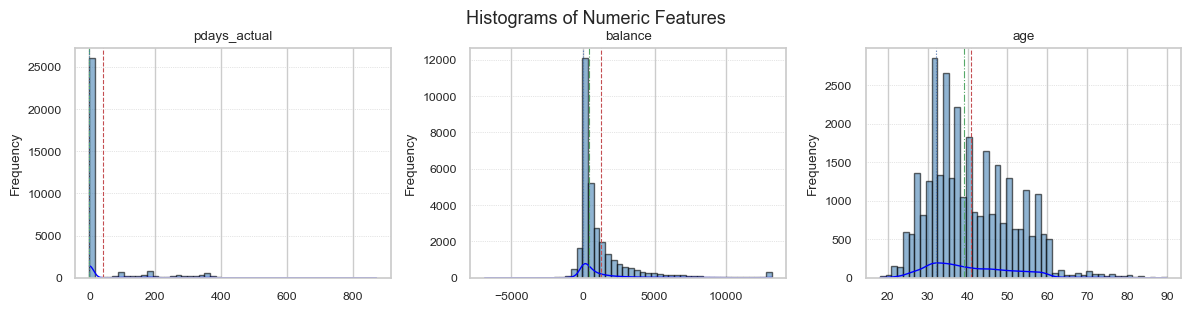

Feature  Skewness
0       balance  3.035046
1  pdays_actual  2.654373
2           age  0.680021

In [79]:
skew_vals = df_ot_train_map[s_num_ot_missing].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Feature': skew_vals.index, 'Skewness': skew_vals.values})
plot_hist_grid(df_ot_train_map, s_num_ot_missing, bins=50, n_cols=3)
display(skew_df)

- **Fixing Skewness on Training Data**

In [80]:
df_ot_train_skewfix = df_ot_train_map.copy()

In [81]:
# Apply cube root transform
for col in ['balance']:
    df_ot_train_skewfix[col] = np.cbrt(df_ot_train_skewfix[col].clip(lower=0))   # cube root
for col in ['age', 'pdays_actual']:
    df_ot_train_skewfix[col] = np.log1p(df_ot_train_skewfix[col].clip(lower=0))  # log transform
df_ot_train_skewfix.replace([np.inf, -np.inf], np.nan, inplace=True)

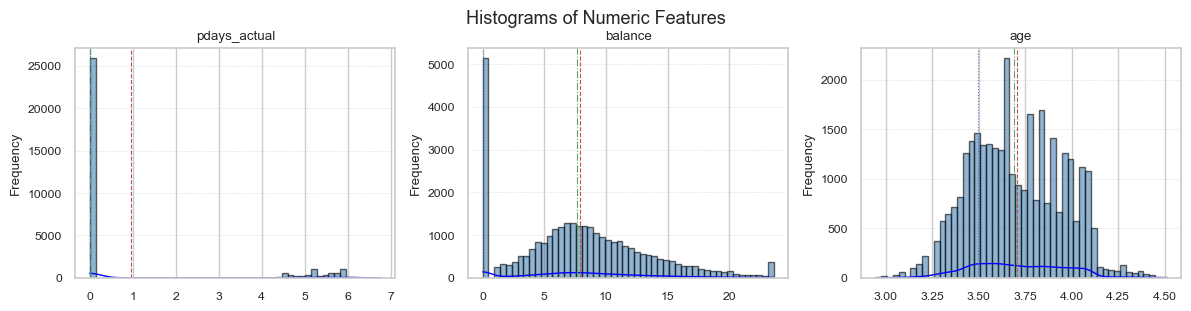

Feature  Skewness
0  pdays_actual  1.711103
1       balance  0.444758
2           age  0.114210

In [82]:
skew_vals = df_ot_train_skewfix[s_num_ot_missing].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Feature': skew_vals.index, 'Skewness': skew_vals.values})
# Check histograms again
plot_hist_grid(df_ot_train_skewfix, s_num_ot_missing, bins=50, n_cols=3)
df_ot_train_skewfix[s_num_ot_missing].isnull().sum()
display(skew_df)

- **Fixing Skewness on Testing Data**

In [83]:
df_ot_test_skewfix = df_ot_test_map.copy()

In [84]:
# Apply cube root transform
for col in ['balance']:
    df_ot_test_skewfix[col] = np.cbrt(df_ot_test_skewfix[col].clip(lower=0))   # cube root
for col in ['age', 'pdays_actual']:
    df_ot_test_skewfix[col] = np.log1p(df_ot_test_skewfix[col].clip(lower=0))  # log transform
df_ot_test_skewfix.replace([np.inf, -np.inf], np.nan, inplace=True)

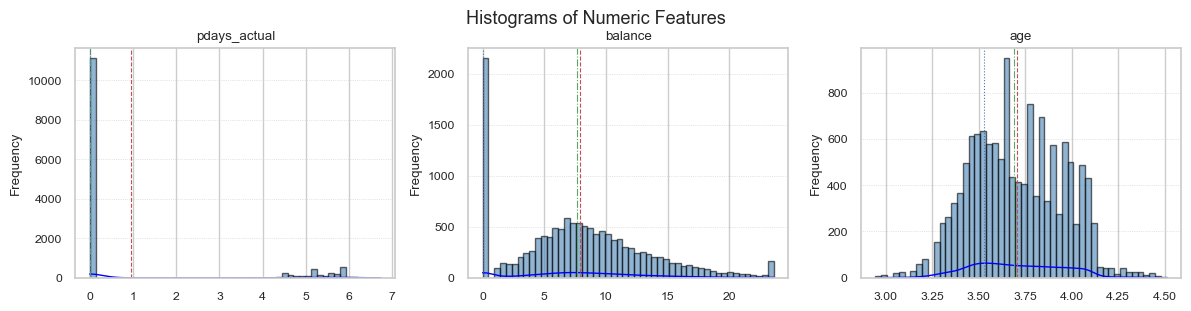

Feature  Skewness
0  pdays_actual  1.711216
1       balance  0.447423
2           age  0.107080

In [85]:
skew_vals = df_ot_test_skewfix[s_num_ot_missing].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({
    'Feature': skew_vals.index,
    'Skewness': skew_vals.values
})
# Check histograms again
plot_hist_grid(df_ot_test_skewfix, s_num_ot_missing, bins=50, n_cols=3)
# Check missing values in transformed columns
df_ot_test_skewfix[s_num_ot_missing].isnull().sum()
display(skew_df)

#### **10.1.2.2. Normalization**

- **We using KNN and others models then we will use the *NORMALIZATION* for fitting the assumption.**

In [86]:
from sklearn.preprocessing import MinMaxScaler

df_ot_train_norm = df_ot_train_skewfix.copy()
df_ot_test_norm = df_ot_test_skewfix.copy()

num_ot_missing_minmax = s_num_ot_missing

- **We use the scaler from TRAIN, then use it in TEST to ensure both datasets are transformed with the same scale and avoid data leakage.**

In [87]:
scaler = MinMaxScaler()
scaler.fit(df_ot_train_norm[num_ot_missing_minmax]) #Using the train scaler for the same scaler for train and test

MinMaxScaler()

- **Normalization on Training Data**

In [88]:
df_ot_train_norm[num_ot_missing_minmax] = scaler.transform(df_ot_train_norm[num_ot_missing_minmax]) # train set got transform by scaler that fit from train set

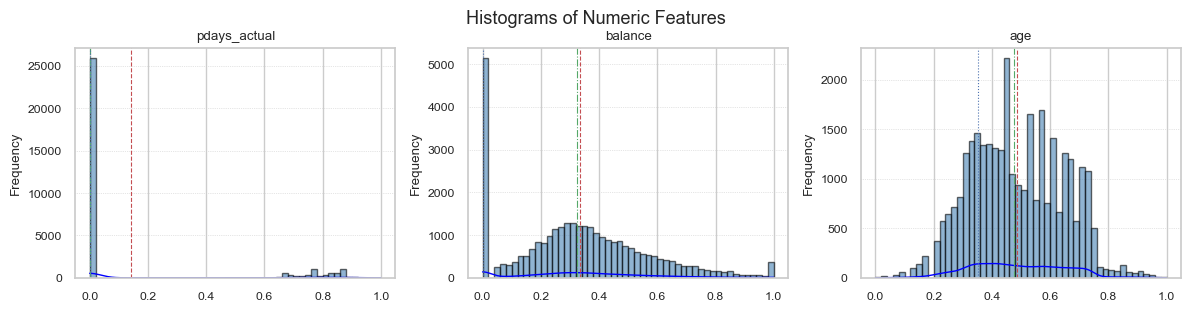

       pdays_actual   balance       age
10747       0.00000  0.000000  0.425479
26054       0.00000  0.246006  0.701352
9125        0.00000  0.000000  0.578203
41659       0.70708  0.638445  0.506397
4443        0.00000  0.000000  0.459087


In [89]:
plot_hist_grid(df_ot_train_norm, num_ot_missing_minmax, bins=50, n_cols=3)
df_ot_train_norm[num_ot_missing_minmax].isnull().sum()
print(df_ot_train_norm[num_ot_missing_minmax].head())

- **Normalization on Testing Data**

In [90]:
df_ot_test_norm[num_ot_missing_minmax]  = scaler.transform(df_ot_test_norm[num_ot_missing_minmax]) # test set got transform by scaler that fit from train set

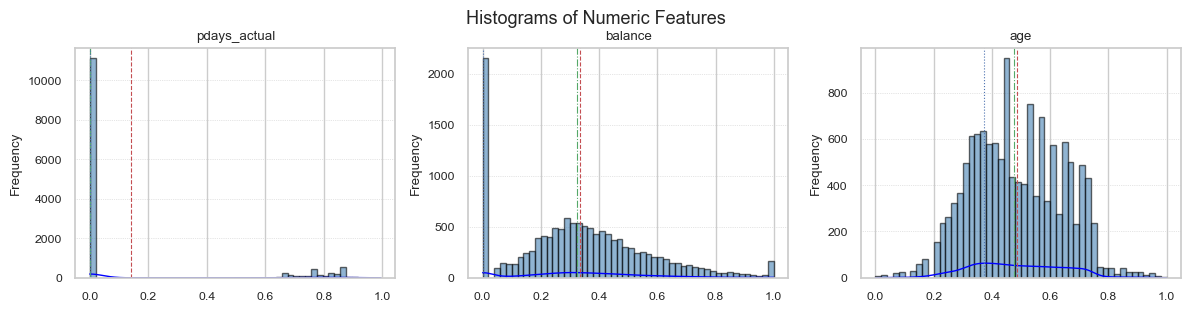

       pdays_actual   balance       age
3776       0.000000  0.353186  0.491013
9928       0.000000  0.651709  0.591643
33409      0.000000  0.344446  0.200238
31885      0.859587  0.512582  0.521419
15738      0.000000  0.254496  0.701352


In [91]:
plot_hist_grid(df_ot_test_norm, num_ot_missing_minmax, bins=50, n_cols=3)
df_ot_test_norm[num_ot_missing_minmax].isnull().sum()
print(df_ot_test_norm[num_ot_missing_minmax].head())

## **10.2. Data Preprocessing for No Outlier-Treated Data**

| **Feature Type** | **Feature** |
|------------------|-------------|
| **Binary** | `y`(target), `housing`, `loan` |
| **Nominal** | `month`, `job`, `education` |
| **Numerical** | `pdays`, `balance`, `age` |

### **10.2.1. Converting Categorical Variable to Numeric**

In [92]:
df_train_map = train_df_missing.copy()
df_test_map = test_df_missing.copy()

#### **10.2.1.1. Converting the *BINARY* variable to numeric using 1/0 mapping**

In [93]:
binary_features = ['y', 'housing', 'loan']

- **Training set**

In [94]:
# Convert binary nominal features to numeric (0/1)
for col in binary_features:
    if col in df_train_map.columns:
        if df_train_map[col].dtype == 'object':
            df_train_map[col] = df_train_map[col].map({'No': 0, 'Yes': 1, 'no': 0, 'yes': 1, '0': 0, '1': 1})
        else:
            df_train_map[col] = df_train_map[col].astype(int)
print(df_train_map[binary_features].head())

column  y  housing  loan
10747   0        0     0
26054   0        0     0
9125    0        1     0
41659   0        0     0
4443    0        1     0


- **Testing set**

In [95]:
# Convert binary nominal features to numeric (0/1)
for col in binary_features:
    if col in df_test_map.columns:
        if df_test_map[col].dtype == 'object':
            df_test_map[col] = df_test_map[col].map({'No': 0, 'Yes': 1, 'no': 0, 'yes': 1, '0': 0, '1': 1})
        else:
            df_test_map[col] = df_test_map[col].astype(int)
print(df_test_map[binary_features].head())

column  y  housing  loan
3776    0        1     0
9928    0        0     0
33409   0        1     0
31885   0        0     0
15738   0        0     1


#### **10.2.1.2. Converting the *NOMINAL* variable to numeric using get_dummies()**

- **Training set**

In [96]:
df_train_map = pd.get_dummies(
    df_train_map,
    columns=["month", "job", "education"],
    drop_first=False   # drop_first=True avoids dummy variable trap
)

In [97]:
df_train_map.filter(regex=r'^(month)_|^(job)_|^education').head()

month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
10747      False      False      False      False      False      False   
26054      False      False      False      False      False      False   
9125       False      False      False      False      False      False   
41659      False      False      False      False      False      False   
4443       False      False      False      False      False      False   

       month_jun  month_mar  month_may  month_nov  ...  job_management  \
10747       True      False      False      False  ...           False   
26054      False      False      False       True  ...           False   
9125        True      False      False      False  ...           False   
41659      False      False      False      False  ...            True   
4443       False      False       True      False  ...           False   

       job_retired  job_self-employed  job_services  job_student  \
10747        False              False         False        False   
26054        False              False         False        False   
9125         False              False         False        False   
41659        False              False         False        False   
4443         False              False         False        False   

       job_technician  job_unemployed  education_primary  education_secondary  \
10747            True           False              False                False   
26054           False           False              False                 True   
9125            False           False              False                 True   
41659           False           False              False                False   
4443            False           False              False                 True   

       education_tertiary  
10747                True  
26054               False  
9125                False  
41659                True  
4443                False  

[5 rows x 26 columns]

- **Testing set**

In [98]:
df_test_map = pd.get_dummies(
    df_test_map,
    columns=["month", "job", "education"],
    drop_first=False   # drop_first=True avoids dummy variable trap
)

In [99]:
df_test_map.filter(regex=r'^(month)_|^(job)_|^education').head()

month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
3776       False      False      False      False      False      False   
9928       False      False      False      False      False      False   
33409       True      False      False      False      False      False   
31885       True      False      False      False      False      False   
15738      False      False      False      False      False       True   

       month_jun  month_mar  month_may  month_nov  ...  job_management  \
3776       False      False       True      False  ...           False   
9928        True      False      False      False  ...           False   
33409      False      False      False      False  ...           False   
31885      False      False      False      False  ...            True   
15738      False      False      False      False  ...            True   

       job_retired  job_self-employed  job_services  job_student  \
3776         False              False         False        False   
9928         False              False          True        False   
33409        False              False         False         True   
31885        False              False         False        False   
15738        False              False         False        False   

       job_technician  job_unemployed  education_primary  education_secondary  \
3776            False           False              False                 True   
9928            False           False              False                 True   
33409           False           False              False                False   
31885           False           False              False                False   
15738           False           False              False                False   

       education_tertiary  
3776                False  
9928                False  
33409                True  
31885                True  
15738                True  

[5 rows x 26 columns]

### **10.2.2. Data Transformation**

#### **10.2.2.1. Fixing Skewness**

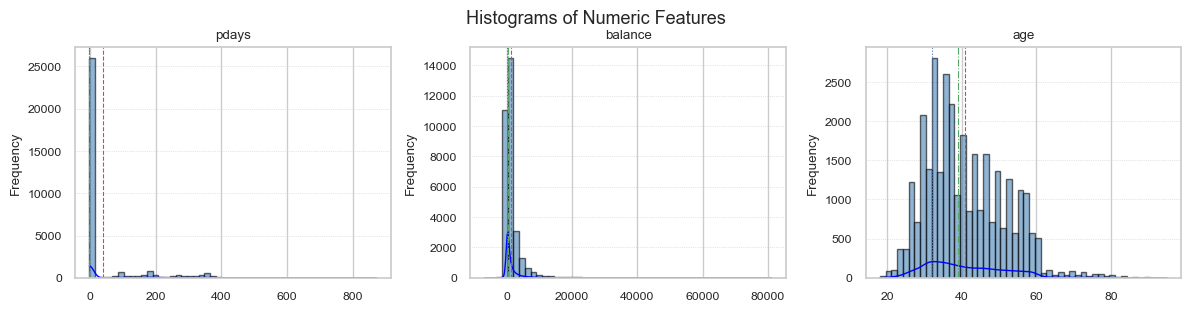

Feature  Skewness
0  balance  7.548166
1    pdays  2.648114
2      age  0.683540

In [100]:
skew_vals = df_train_map[s_num_missing].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Feature': skew_vals.index, 'Skewness': skew_vals.values})
plot_hist_grid(df_train_map, s_num_missing, bins=50, n_cols=3)
display(skew_df)

- **Fixing Skewness on Training Data**

In [101]:
df_train_skewfix = df_train_map.copy()

In [102]:
# Apply cube root transform
for col in ['balance']:
    df_train_skewfix[col] = np.cbrt(df_train_skewfix[col].clip(lower=0))   # cube root
for col in ['age', 'pdays']:
    df_train_skewfix[col] = np.log1p(df_train_skewfix[col].clip(lower=0))  # log transform
df_train_skewfix.replace([np.inf, -np.inf], np.nan, inplace=True)

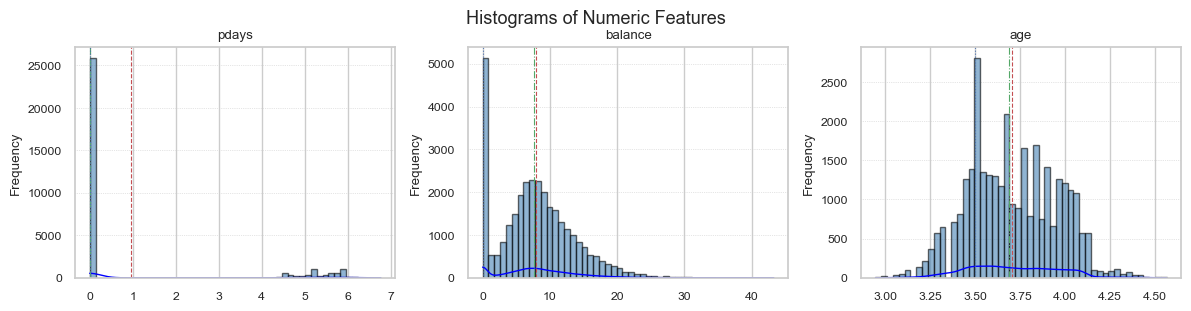

Feature  Skewness
0    pdays  1.711103
1  balance  0.629373
2      age  0.115046

In [103]:
skew_vals = df_train_skewfix[s_num_missing].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Feature': skew_vals.index, 'Skewness': skew_vals.values})
# Check histograms again
plot_hist_grid(df_train_skewfix, s_num_missing, bins=50, n_cols=3)
df_train_skewfix[s_num_missing].isnull().sum()
display(skew_df)

- **Fixing Skewness on Testing Data**

In [104]:
df_test_skewfix = df_test_map.copy()

In [105]:
# Apply cube root transform
for col in ['balance']:
    df_test_skewfix[col] = np.cbrt(df_test_skewfix[col].clip(lower=0))   # cube root
for col in ['age', 'pdays']:
    df_test_skewfix[col] = np.log1p(df_test_skewfix[col].clip(lower=0))  # log transform
df_test_skewfix.replace([np.inf, -np.inf], np.nan, inplace=True)

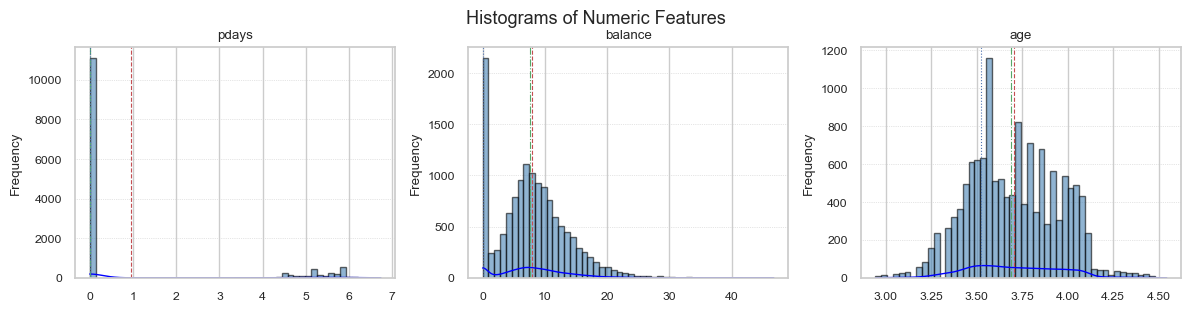

Feature  Skewness
0    pdays  1.711216
1  balance  0.676142
2      age  0.107360

In [106]:
skew_vals = df_test_skewfix[s_num_missing].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Feature': skew_vals.index, 'Skewness': skew_vals.values})
# Check histograms again
plot_hist_grid(df_test_skewfix, s_num_missing, bins=50, n_cols=3)
df_test_skewfix[s_num_missing].isnull().sum()
display(skew_df)

#### **10.2.2.2. Normalization**

- **We using KNN and others models then we will use the *NORMALIZATION* for fitting the assumption.**

In [107]:
df_train_norm = df_train_skewfix.copy()
df_test_norm = df_test_skewfix.copy()

num_missing_minmax = s_num_missing

- **We use the scaler from TRAIN, then use it in TEST to ensure both datasets are transformed with the same scale and avoid data leakage.**

In [108]:
scaler = MinMaxScaler()
scaler.fit(df_train_norm[num_missing_minmax]) #Using the train scaler for the same scaler for train and test

MinMaxScaler()

- **Normalization on Training Data**

In [109]:
df_train_norm[num_missing_minmax] = scaler.transform(df_train_norm[num_missing_minmax]) # train set got transform by scaler that fit from train set

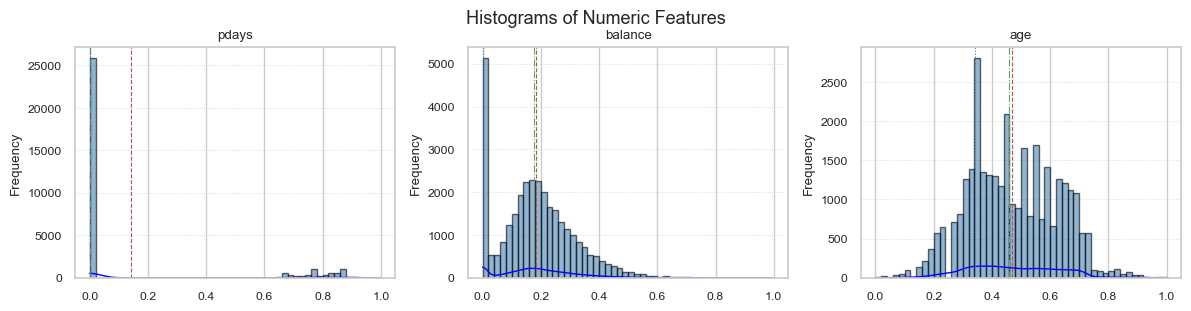

         pdays   balance       age
10747  0.00000  0.000000  0.411430
26054  0.00000  0.134140  0.678194
9125   0.00000  0.000000  0.559111
41659  0.70708  0.348126  0.489676
4443   0.00000  0.000000  0.443928


In [110]:
plot_hist_grid(df_train_norm, num_missing_minmax, bins=50, n_cols=3)
df_train_norm[num_missing_minmax].isnull().sum()
print(df_train_norm[num_missing_minmax].head())

- **Normalization on Testing Data**

In [111]:
df_test_norm[num_missing_minmax] = scaler.transform(df_test_norm[num_missing_minmax]) # test set got transform by scaler that fit from train set

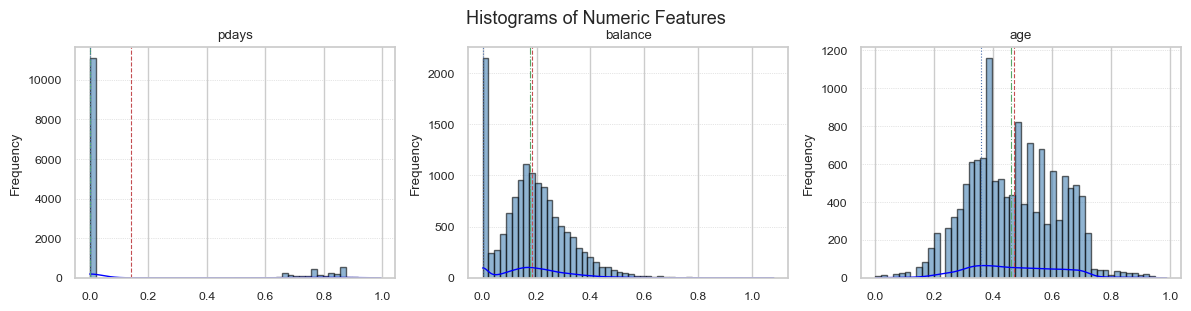

          pdays   balance       age
3776   0.000000  0.192583  0.474800
9928   0.000000  0.355359  0.572107
33409  0.000000  0.187817  0.193627
31885  0.859587  0.279497  0.504202
15738  0.000000  0.138770  0.678194


In [112]:
plot_hist_grid(df_test_norm, num_missing_minmax, bins=50, n_cols=3)
df_test_norm[num_missing_minmax].isnull().sum()
print(df_test_norm[num_missing_minmax].head())

# **11. DataFrames Summary**

## **11.1. Overview of Data Processing Pipelines**

This project implements 4 different data preprocessing pipelines to compare model performance across various data preparation strategies:

| Pipeline Name | Meaning | DataFrames Used | Numerical Features | Categorical Features |
|:-------------|---------|-----------------|-------------------|------------------------------|
| **OT+T** | Outlier Treated + Transformed | `df_ot_train_norm`, `df_ot_test_norm` | `s_num_ot_missing` | `enc_cat_ot_t` |
| **OT+NT** | Outlier Treated + Non-Transformed | `df_ot_train_map`, `df_ot_test_map` | `s_num_ot_missing` | `enc_cat_ot_nt` |
| **NOT+T** | Non-Outlier Treated + Transformed | `df_train_norm`, `df_test_norm` | `s_num_missing` | `enc_cat_not_t` |
| **NOT+NT** | Non-Outlier Treated + Non-Transformed | `df_train_map`, `df_test_map` | `s_num_missing` | `enc_cat_not_nt` |

- **Pipeline Setup**

In [113]:
# ---- OT + T ----
dummy_cols = [col for col in df_ot_train_norm.columns if re.match(r'^(month)_|^(job)', col)]
binary_cols = ['contact_flag', 'housing', 'loan']
enc_cat_ot_t = dummy_cols + binary_cols

# ---- OT + NT ----
dummy_cols = [col for col in df_ot_train_map.columns if re.match(r'^(month)_|^(job)', col)]
binary_cols = ['contact_flag', 'housing', 'loan']
enc_cat_ot_nt = dummy_cols + binary_cols

# ---- NOT + T ----
dummy_cols = [col for col in df_train_norm.columns if re.match(r'^(month)_|^(job)_|^(education)', col)]
binary_cols = ['housing', 'loan']
enc_cat_not_t = dummy_cols + binary_cols

# ---- NOT + NT ----
dummy_cols = [col for col in df_train_map.columns if re.match(r'^(month)_|^(job)_|^(education)', col)]
binary_cols = ['housing', 'loan']
enc_cat_not_nt = dummy_cols + binary_cols

In [114]:
# Target and Predictor Variables
target_vars = ['y']

# Categorical features per pipeline
pipeline_cat_features = {
    "ot_t": enc_cat_ot_t,
    "ot_nt": enc_cat_ot_nt,
    "not_t": enc_cat_not_t,
    "not_nt": enc_cat_not_nt
}

# Assign numerical feature sets per pipeline
pipeline_num_features = {
    "ot_t": s_num_ot_missing,
    "ot_nt": s_num_ot_missing,
    "not_t": s_num_missing,
    "not_nt": s_num_missing
}

# Combine into predictor sets
predictor_vars = {
    name: pipeline_num_features[name] + pipeline_cat_features[name]
    for name in pipeline_cat_features
}

# Optional sanity check
for name, feats in predictor_vars.items():
    print(f"{name.upper()} — Total Predictors: {len(feats)}")

OT_T — Total Predictors: 29
OT_NT — Total Predictors: 29
NOT_T — Total Predictors: 31
NOT_NT — Total Predictors: 31


In [115]:
print(len(enc_cat_ot_t) + len(s_num_ot_missing), enc_cat_ot_t, s_num_ot_missing)
print(len(enc_cat_ot_nt) + len(s_num_ot_missing), enc_cat_ot_nt, s_num_ot_missing)
print(len(enc_cat_not_t) + len(s_num_missing), enc_cat_not_t, s_num_missing)
print(len(enc_cat_not_nt) + len(s_num_missing), enc_cat_not_nt, s_num_missing)

29 ['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'contact_flag', 'housing', 'loan'] ['pdays_actual', 'balance', 'age']
29 ['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'contact_flag', 'housing', 'loan'] ['pdays_actual', 'balance', 'age']
31 ['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'

In [116]:
pipelines = {
    "ot_t":   {"df_train": df_ot_train_norm,  "df_test": df_ot_test_norm},
    "ot_nt":  {"df_train": df_ot_train_map,  "df_test": df_ot_test_map},
    "not_t":  {"df_train": df_train_norm,     "df_test": df_test_norm},
    "not_nt": {"df_train": df_train_map,     "df_test": df_test_map},
}

X_train, X_test, y_train, y_test = {}, {}, {}, {}

for name, cfg in pipelines.items():
    X_train[name] = cfg["df_train"][predictor_vars[name]].values
    y_train[name] = cfg["df_train"][target_vars].values
    
    X_test[name] = cfg["df_test"][predictor_vars[name]].values
    y_test[name] = cfg["df_test"][target_vars].values
    
    print(f"{name.upper()} pipeline ready:")
    print(f"  X_train: {X_train[name].shape}, X_test: {X_test[name].shape}")

OT_T pipeline ready:
  X_train: (31647, 29), X_test: (13564, 29)
OT_NT pipeline ready:
  X_train: (31647, 29), X_test: (13564, 29)
NOT_T pipeline ready:
  X_train: (31647, 31), X_test: (13564, 31)
NOT_NT pipeline ready:
  X_train: (31647, 31), X_test: (13564, 31)


# **12. Model Construction**

- **Define Confusion Matrix Function**

In [117]:
def plot_confusion_matrices(conf_matrices, model_name="Model", data_type="Test"):

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"{model_name}: Confusion Matrix Analysis ({data_type})",
                 fontsize=16, fontweight='bold', y=0.97)
    cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

    for ax, (name, cm) in zip(axes.flat, conf_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax,
                    square=True, linewidths=1, linecolor='white',
                    annot_kws={'size': 12, 'weight': 'bold'},
                    cbar_kws={'shrink': 0.8, 'label': 'Count'})
        acc = cm.trace() / cm.sum()
        ax.set_title(name.replace('_', ' ').title(), fontsize=12, weight='bold')
        ax.set_xlabel("Predicted", fontsize=10)
        ax.set_ylabel("Actual", fontsize=10)
        ax.text(0.02, 0.97, f'Acc: {acc:.2%}', transform=ax.transAxes,
                fontsize=9, va='top', bbox=dict(boxstyle='round', fc='wheat', alpha=0.3))

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

- **Define the Evaluation Cost Function**

In [118]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix
)

def eval_models(models, X_test, y_test):
    res = {}
    for n, m in models.items():
        y = y_test[n]
        p = m.predict(X_test[n])

        # Compute confusion matrix
        tn, fp, fn, tp = confusion_matrix(y, p).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        r = {
            'Acc': accuracy_score(y, p),
            'Pre': precision_score(y, p, zero_division=0),
            'Rec': recall_score(y, p, zero_division=0),
            'F1':  f1_score(y, p, zero_division=0),
            'Spec': specificity,
        }

        if hasattr(m, 'predict_proba'):
            r['AUC'] = roc_auc_score(y, m.predict_proba(X_test[n])[:, 1])

        res[n] = r
        print(f"{n.upper()} → " + ", ".join(f"{k}:{v:.3f}" for k, v in r.items()))
    return res

## **12.1. Logistic Regression**

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# --- Train & evaluate Logistic Regression across 4 pipelines ---
logreg_train_conf_matrices = {}
logreg_test_conf_matrices = {}
logreg_models = {}

for name in X_train:
    print(f"Training Logistic Regression on {name.upper()}...")
    model = LogisticRegression(max_iter=5000, solver='lbfgs')
    model.fit(X_train[name], y_train[name].ravel())

    # --- Test Confusion Matrix --- 
    test_preds = model.predict(X_test[name])
    logreg_test_conf_matrices[name] = confusion_matrix(y_test[name], test_preds)
    
    # --- Train Confusion Matrix ---
    train_preds = model.predict(X_train[name])
    logreg_train_conf_matrices[name] = confusion_matrix(y_train[name], train_preds)
    
    logreg_models[name] = model

Training Logistic Regression on OT_T...
Training Logistic Regression on OT_NT...
Training Logistic Regression on NOT_T...
Training Logistic Regression on NOT_NT...


In [120]:
metrics_logreg = eval_models(logreg_models, X_train, y_train)

OT_T → Acc:0.885, Pre:0.533, Rec:0.092, F1:0.157, Spec:0.989, AUC:0.735
OT_NT → Acc:0.885, Pre:0.542, Rec:0.088, F1:0.152, Spec:0.990, AUC:0.729
NOT_T → Acc:0.884, Pre:0.518, Rec:0.088, F1:0.150, Spec:0.989, AUC:0.734
NOT_NT → Acc:0.884, Pre:0.526, Rec:0.083, F1:0.144, Spec:0.990, AUC:0.721


In [121]:
metrics_logreg = eval_models(logreg_models, X_test, y_test)

OT_T → Acc:0.882, Pre:0.494, Rec:0.075, F1:0.130, Spec:0.990, AUC:0.728
OT_NT → Acc:0.883, Pre:0.512, Rec:0.077, F1:0.134, Spec:0.990, AUC:0.723
NOT_T → Acc:0.882, Pre:0.508, Rec:0.076, F1:0.132, Spec:0.990, AUC:0.728
NOT_NT → Acc:0.882, Pre:0.493, Rec:0.071, F1:0.124, Spec:0.990, AUC:0.715


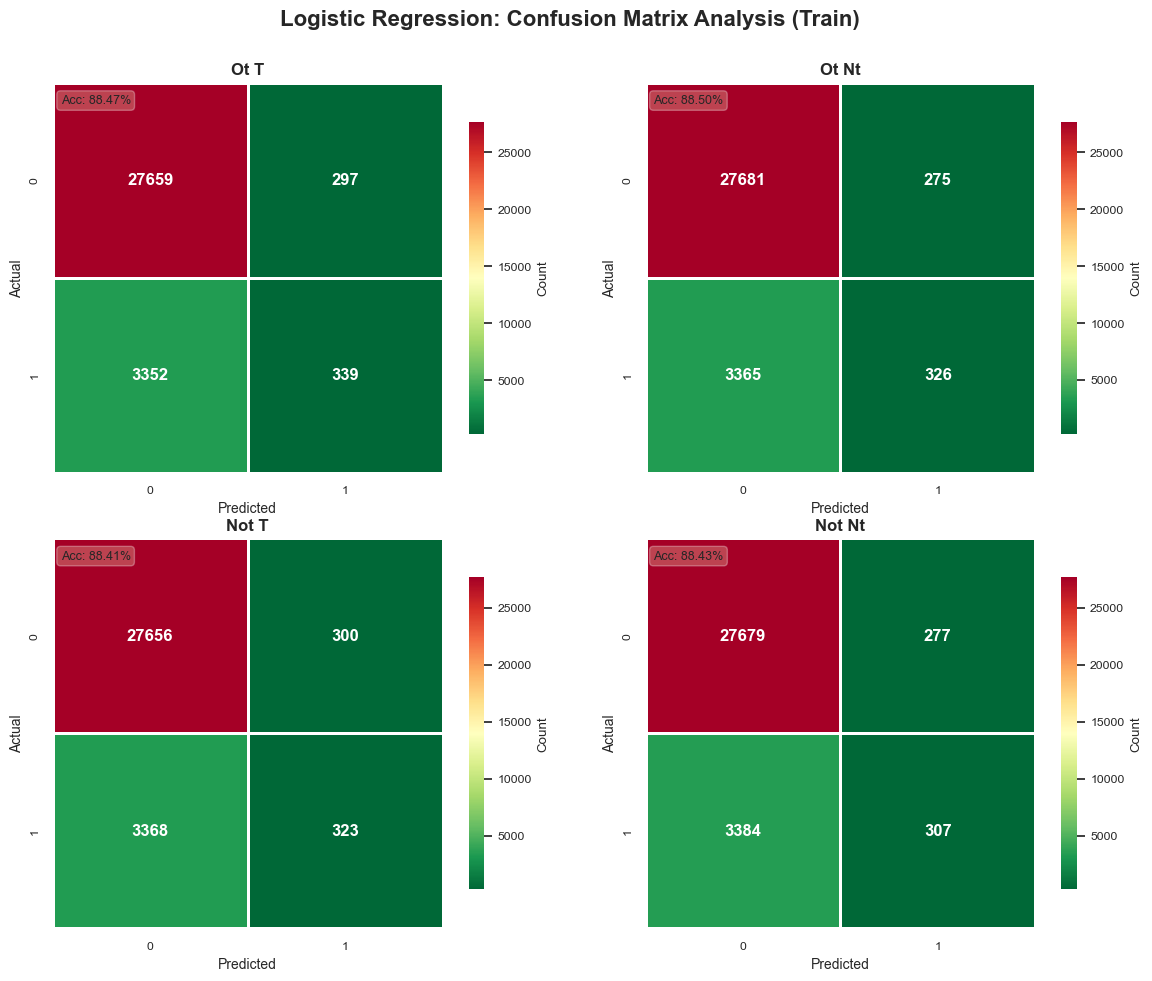

In [122]:
plot_confusion_matrices(logreg_train_conf_matrices, model_name="Logistic Regression", data_type="Train")

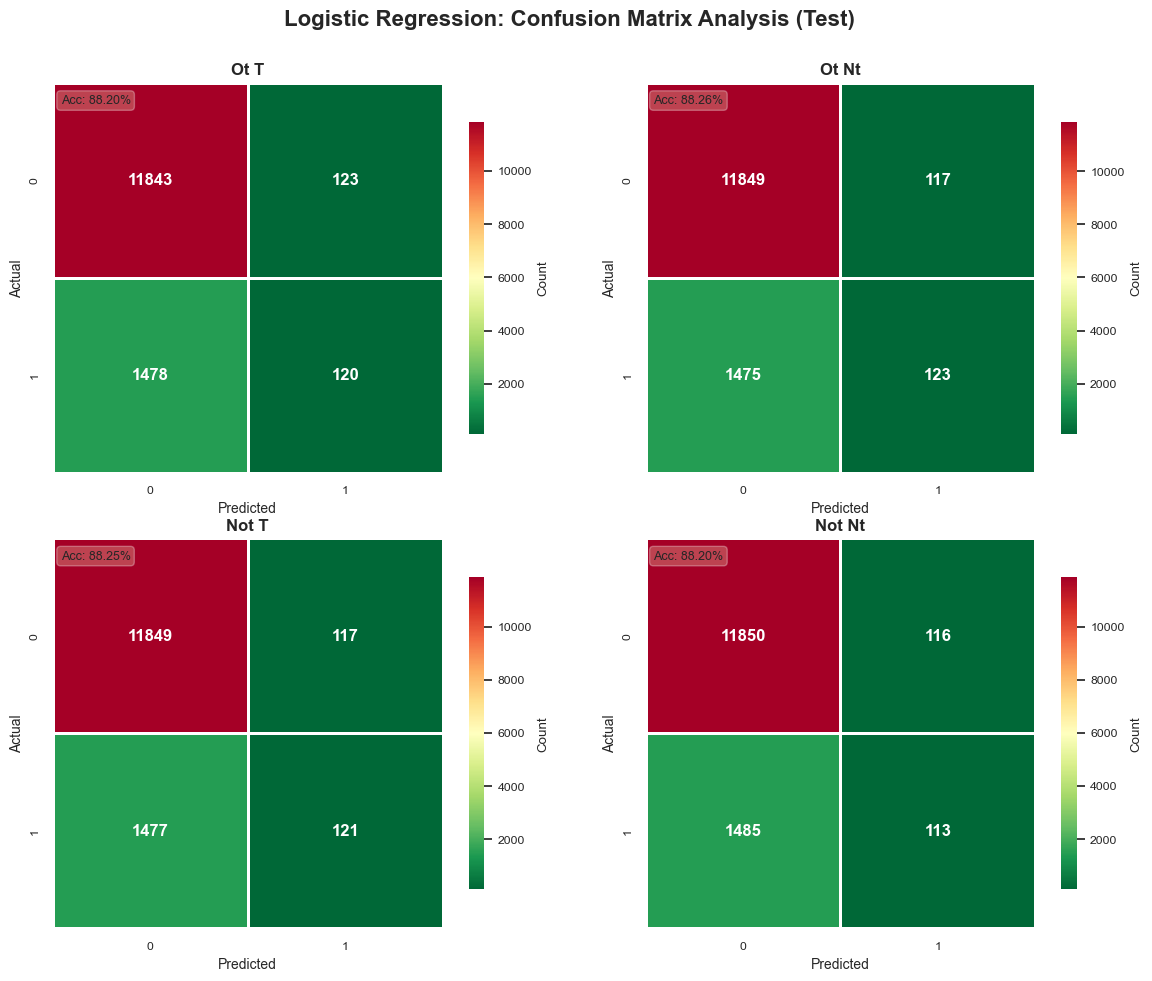

In [123]:
plot_confusion_matrices(logreg_test_conf_matrices, model_name="Logistic Regression", data_type="Test")

## **12.2. K-Nearest Neighbors (KNN)**

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn_train_conf_matrices = {}
knn_test_conf_matrices = {}
knn_models = {}

for name in X_train:
    print(f"Training KNN on {name.upper()}...")
    model = KNeighborsClassifier(
        n_neighbors=23,
        weights='uniform',    
        p=1,  # Manhattan distance - less sensitive to outliers
        algorithm='auto',
        leaf_size=30
)
    model.fit(X_train[name], y_train[name].ravel())
    train_preds = model.predict(X_train[name])
    test_preds  = model.predict(X_test[name])
    knn_train_conf_matrices[name] = confusion_matrix(y_train[name], train_preds)
    knn_test_conf_matrices[name]  = confusion_matrix(y_test[name],  test_preds)
    knn_models[name] = model

Training KNN on OT_T...
Training KNN on OT_NT...
Training KNN on NOT_T...
Training KNN on NOT_NT...


In [125]:
metrics_knn = eval_models(knn_models, X_train, y_train)

OT_T → Acc:0.889, Pre:0.585, Rec:0.156, F1:0.246, Spec:0.985, AUC:0.818
OT_NT → Acc:0.886, Pre:0.623, Rec:0.048, F1:0.089, Spec:0.996, AUC:0.770
NOT_T → Acc:0.889, Pre:0.601, Rec:0.134, F1:0.219, Spec:0.988, AUC:0.814
NOT_NT → Acc:0.885, Pre:0.595, Rec:0.047, F1:0.087, Spec:0.996, AUC:0.769


In [126]:
metrics_knn = eval_models(knn_models, X_test, y_test)

OT_T → Acc:0.884, Pre:0.537, Rec:0.133, F1:0.214, Spec:0.985, AUC:0.718
OT_NT → Acc:0.882, Pre:0.463, Rec:0.035, F1:0.065, Spec:0.995, AUC:0.646
NOT_T → Acc:0.883, Pre:0.524, Rec:0.101, F1:0.170, Spec:0.988, AUC:0.707
NOT_NT → Acc:0.882, Pre:0.462, Rec:0.034, F1:0.064, Spec:0.995, AUC:0.646


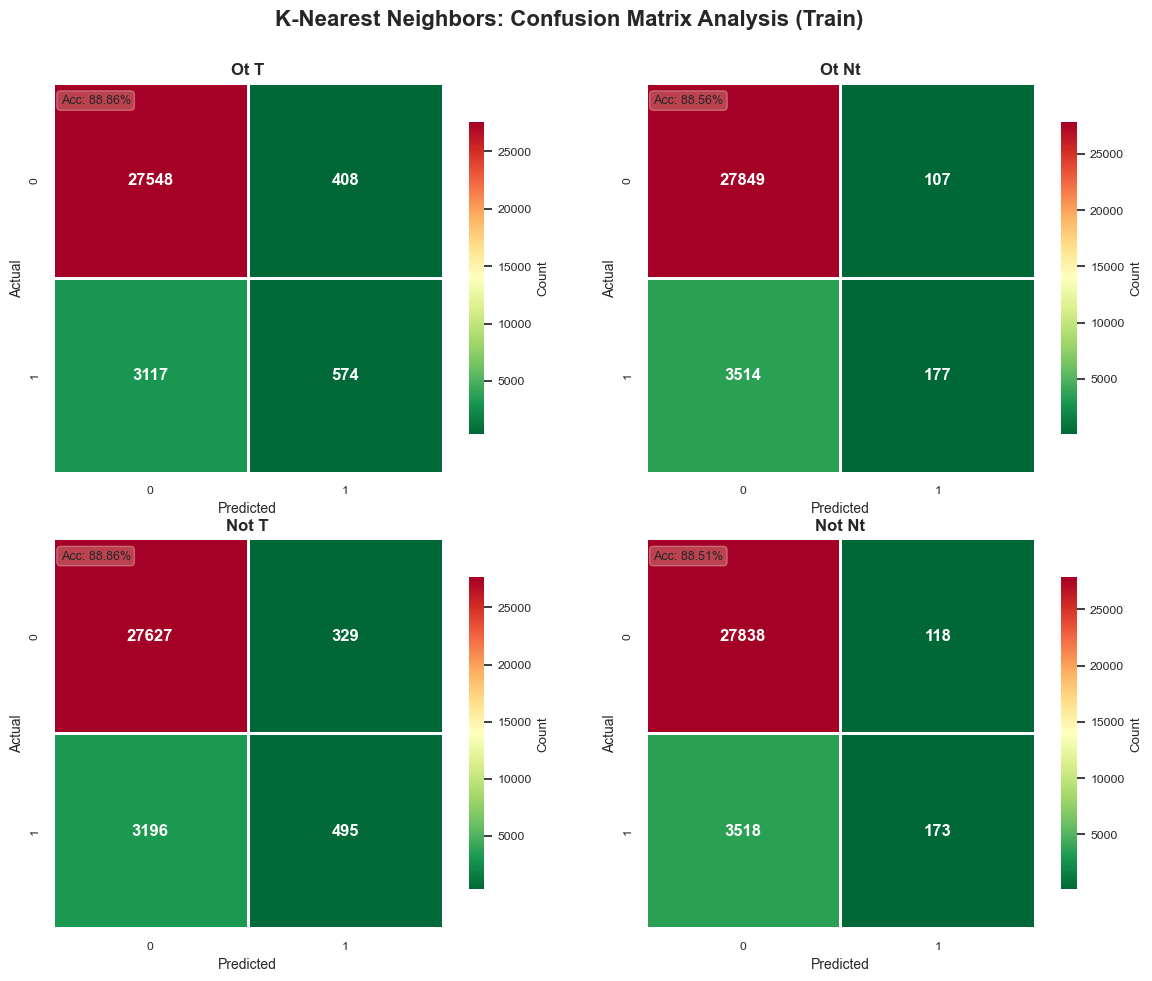

In [127]:
plot_confusion_matrices(knn_train_conf_matrices, model_name="K-Nearest Neighbors", data_type="Train")

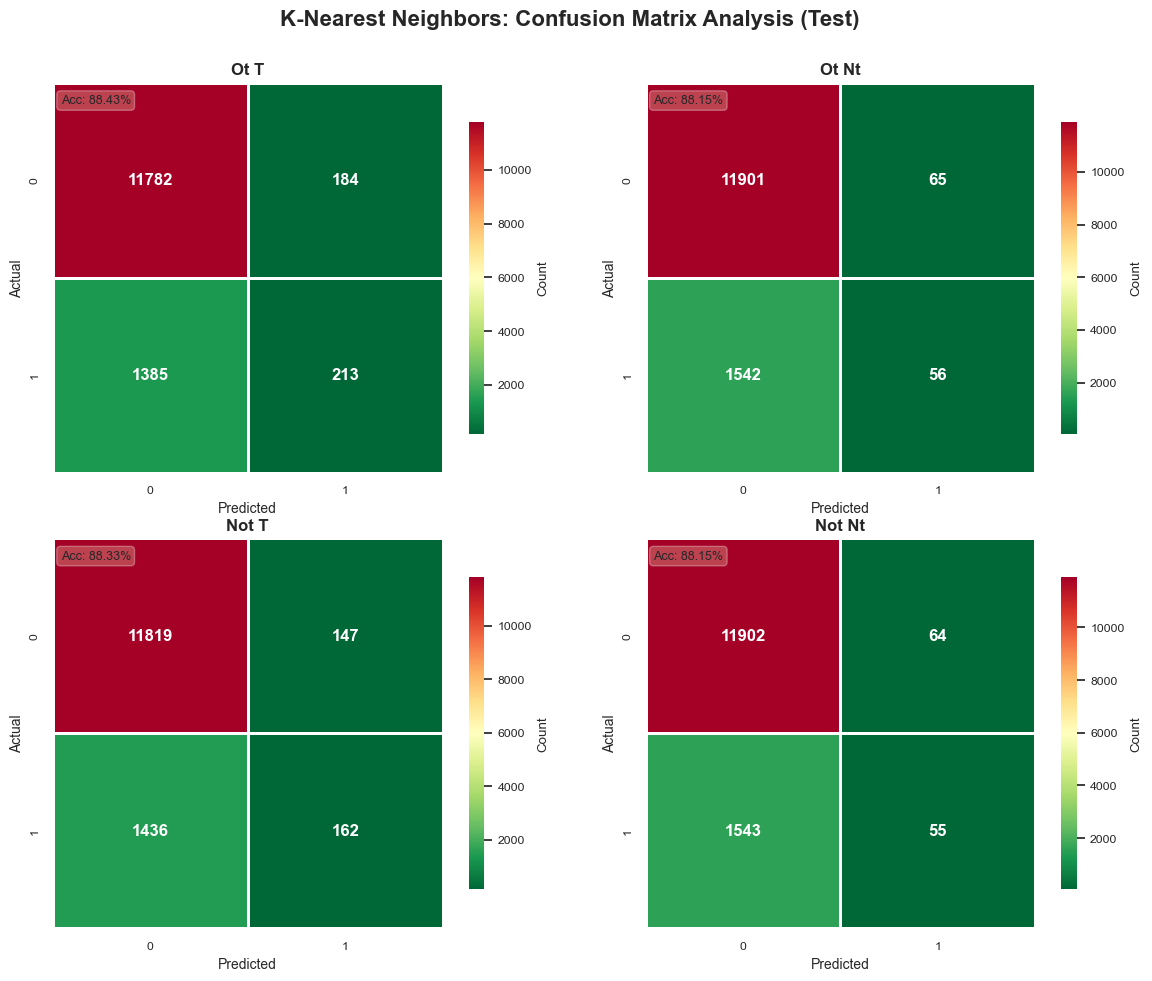

In [128]:
plot_confusion_matrices(knn_test_conf_matrices, model_name="K-Nearest Neighbors", data_type="Test")

## **12.3. Decision Tree**

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt_train_conf_matrices = {}
dt_test_conf_matrices = {}
dt_models = {}

for name in X_train:
    print(f"Training Decision Tree on {name.upper()}...")

    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=4,            # shallower = less overfitting
        min_samples_leaf=20,
        min_samples_split=40,
        class_weight='balanced'
    )

    model.fit(X_train[name], y_train[name].ravel())

    train_preds = model.predict(X_train[name])
    test_preds  = model.predict(X_test[name])

    dt_train_conf_matrices[name] = confusion_matrix(y_train[name], train_preds)
    dt_test_conf_matrices[name]  = confusion_matrix(y_test[name],  test_preds)
    dt_models[name] = model

Training Decision Tree on OT_T...
Training Decision Tree on OT_NT...
Training Decision Tree on NOT_T...
Training Decision Tree on NOT_NT...


In [130]:
metrics_dt = eval_models(dt_models, X_train, y_train)

OT_T → Acc:0.866, Pre:0.420, Rec:0.383, F1:0.401, Spec:0.930, AUC:0.696
OT_NT → Acc:0.867, Pre:0.424, Rec:0.383, F1:0.402, Spec:0.931, AUC:0.697
NOT_T → Acc:0.866, Pre:0.420, Rec:0.383, F1:0.401, Spec:0.930, AUC:0.696
NOT_NT → Acc:0.867, Pre:0.424, Rec:0.383, F1:0.402, Spec:0.931, AUC:0.697


In [131]:
metrics_dt = eval_models(dt_models, X_test, y_test)

OT_T → Acc:0.862, Pre:0.404, Rec:0.369, F1:0.385, Spec:0.927, AUC:0.689
OT_NT → Acc:0.862, Pre:0.406, Rec:0.369, F1:0.386, Spec:0.928, AUC:0.689
NOT_T → Acc:0.862, Pre:0.404, Rec:0.369, F1:0.385, Spec:0.927, AUC:0.689
NOT_NT → Acc:0.862, Pre:0.406, Rec:0.369, F1:0.386, Spec:0.928, AUC:0.689


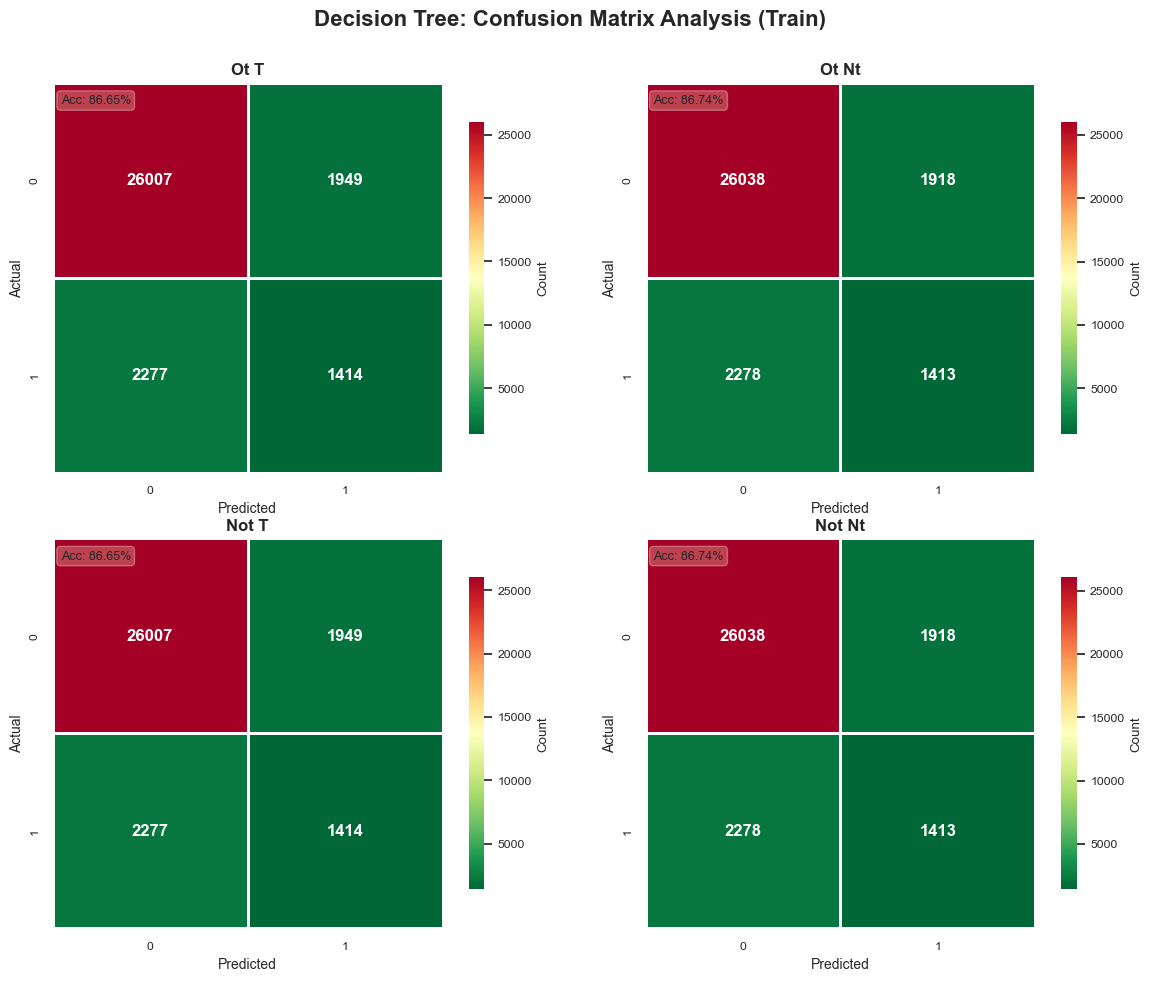

In [132]:
plot_confusion_matrices(dt_train_conf_matrices, model_name="Decision Tree", data_type="Train")

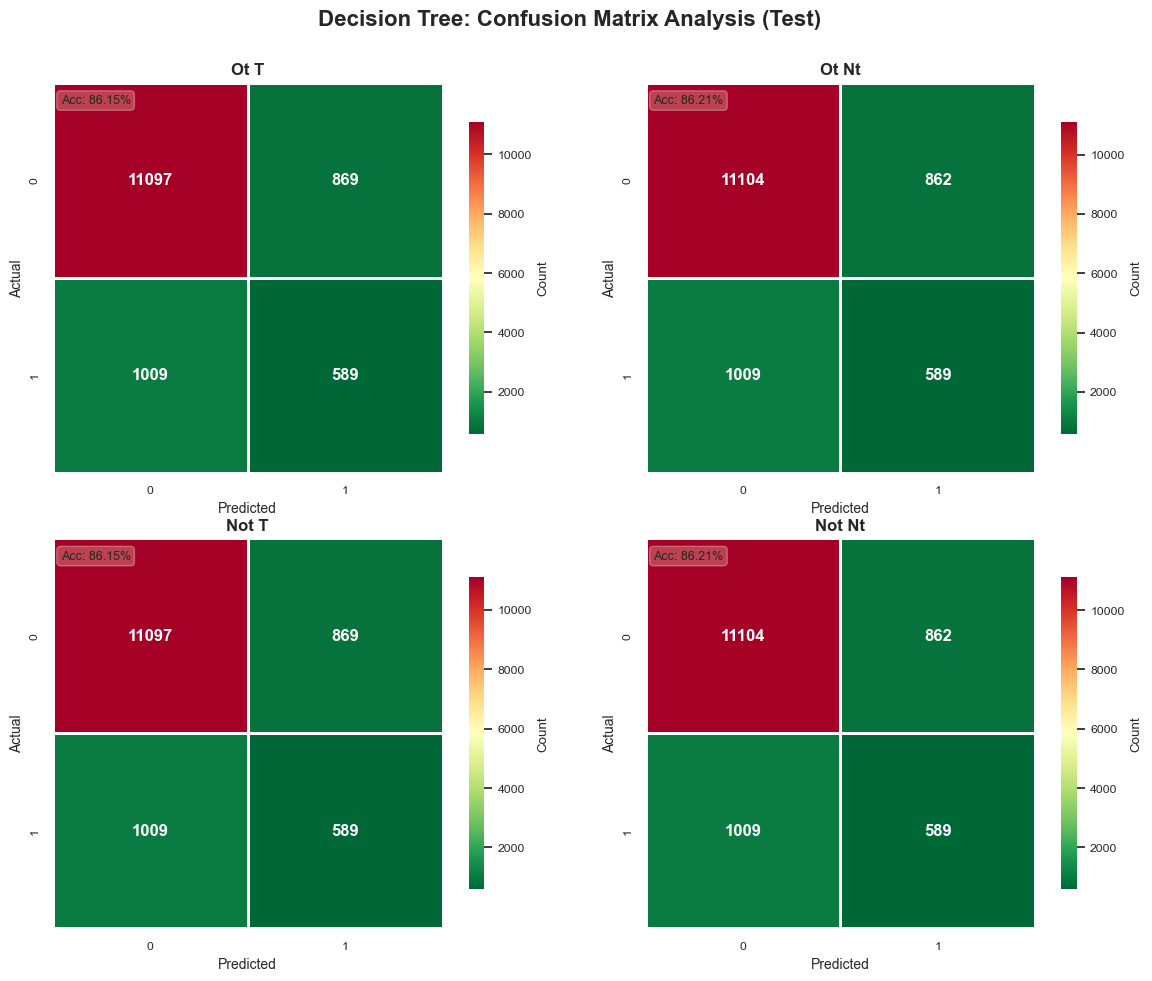

In [133]:
plot_confusion_matrices(dt_test_conf_matrices, model_name="Decision Tree", data_type="Test")

## **12.4. Random Forest**

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_train_conf_matrices = {}
rf_test_conf_matrices = {}
rf_models = {}

for name in X_train:
    print(f"Training Random Forest on {name.upper()}...")

    model = RandomForestClassifier(
        n_estimators=400,        # more averaging = less variance
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_samples_leaf=20,
        min_samples_split=40,
        max_features='sqrt',
        class_weight='balanced'
    )

    model.fit(X_train[name], y_train[name].ravel())

    train_preds = model.predict(X_train[name])
    test_preds  = model.predict(X_test[name])

    rf_train_conf_matrices[name] = confusion_matrix(y_train[name], train_preds)
    rf_test_conf_matrices[name]  = confusion_matrix(y_test[name],  test_preds)
    rf_models[name] = model

Training Random Forest on OT_T...
Training Random Forest on OT_NT...
Training Random Forest on NOT_T...
Training Random Forest on NOT_NT...


In [135]:
metrics_rf = eval_models(rf_models, X_train, y_train)

OT_T → Acc:0.808, Pre:0.317, Rec:0.556, F1:0.404, Spec:0.842, AUC:0.753
OT_NT → Acc:0.808, Pre:0.317, Rec:0.559, F1:0.405, Spec:0.841, AUC:0.753
NOT_T → Acc:0.772, Pre:0.280, Rec:0.610, F1:0.384, Spec:0.793, AUC:0.756
NOT_NT → Acc:0.769, Pre:0.279, Rec:0.614, F1:0.383, Spec:0.790, AUC:0.756


In [136]:
metrics_rf = eval_models(rf_models, X_test, y_test)

OT_T → Acc:0.801, Pre:0.303, Rec:0.531, F1:0.386, Spec:0.837, AUC:0.734
OT_NT → Acc:0.801, Pre:0.303, Rec:0.533, F1:0.386, Spec:0.837, AUC:0.735
NOT_T → Acc:0.766, Pre:0.274, Rec:0.596, F1:0.375, Spec:0.789, AUC:0.738
NOT_NT → Acc:0.764, Pre:0.271, Rec:0.597, F1:0.373, Spec:0.786, AUC:0.738


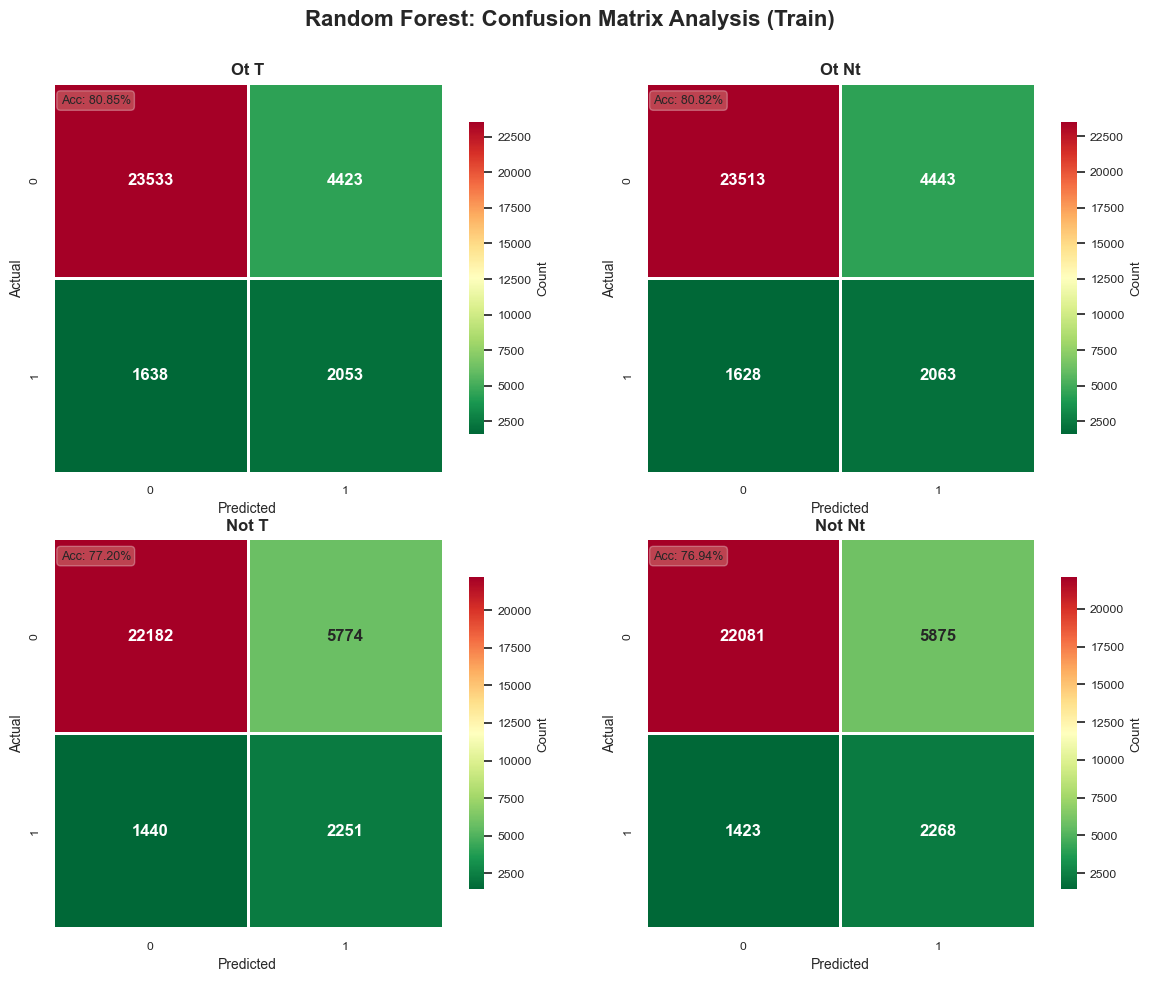

In [137]:
plot_confusion_matrices(rf_train_conf_matrices, model_name="Random Forest", data_type="Train")

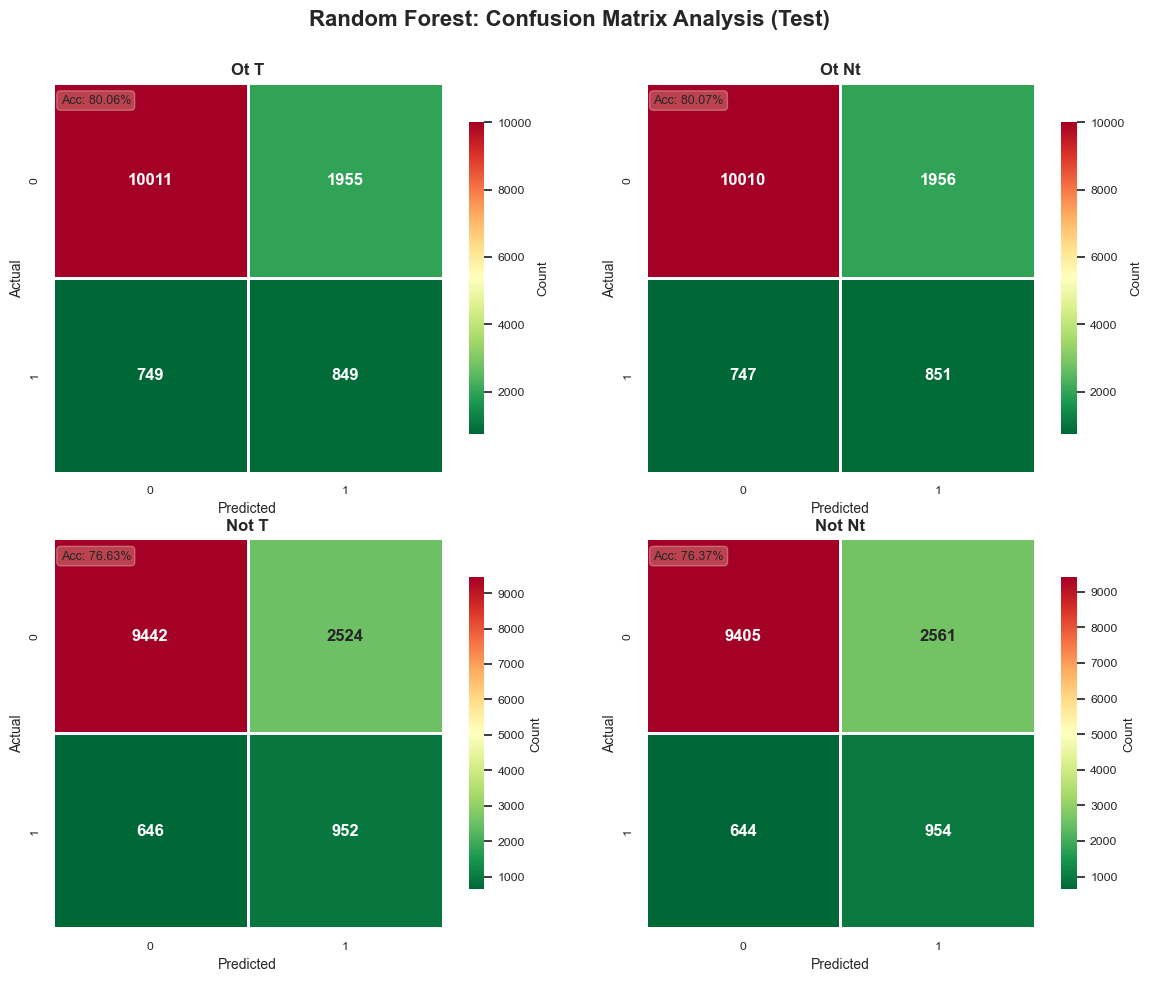

In [138]:
plot_confusion_matrices(rf_test_conf_matrices, model_name="Random Forest", data_type="Test")

## **12.5. ROC Curve Plotting**

In [139]:
from sklearn.metrics import RocCurveDisplay
import itertools

def plot_roc_curves(
    model_dict,
    X_test_dict,
    y_test_dict,
    title="ROC Curves",
    cmap=plt.cm.tab20,
    figsize=(10, 9),
    alpha=0.9,
    lw=2,
    overlay_models=None,
    overlay_label="Baseline"
):

    plt.figure(figsize=figsize)
    colors = cmap.colors

    # Plot overlay curves (e.g., baseline models)
    if overlay_models is not None:
        for algo, models in overlay_models.items():
            for name, model in models.items():
                try:
                    RocCurveDisplay.from_estimator(
                        model,
                        X_test_dict[name],
                        y_test_dict[name],
                        name=f"{overlay_label}-{algo}-{name.upper()}",
                        ax=plt.gca(),
                        curve_kwargs={'color': 'gray', 'alpha': 0.3, 'linewidth': 1}
                    )
                except Exception as e:
                    print(f"Skipped overlay {algo}-{name.upper()}: {e}")

    # Plot main ROC curves
    for (algo, models), color in zip(model_dict.items(), itertools.cycle(colors)):
        for i, (name, model) in enumerate(models.items()):
            try:
                RocCurveDisplay.from_estimator(
                    model,
                    X_test_dict[name],
                    y_test_dict[name],
                    name=f"{algo}-{name.upper()}",
                    ax=plt.gca(),
                    curve_kwargs={
                        'color': colors[(list(model_dict).index(algo)*4 + i) % len(colors)],
                        'alpha': alpha,
                        'linewidth': lw
                    }
                )
            except Exception as e:
                print(f"Skipped {algo}-{name.upper()}: {e}")

    plt.title(title, fontsize=15, weight='bold', pad=10)
    plt.legend(loc='lower right', fontsize=9, frameon=True, edgecolor='gray')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

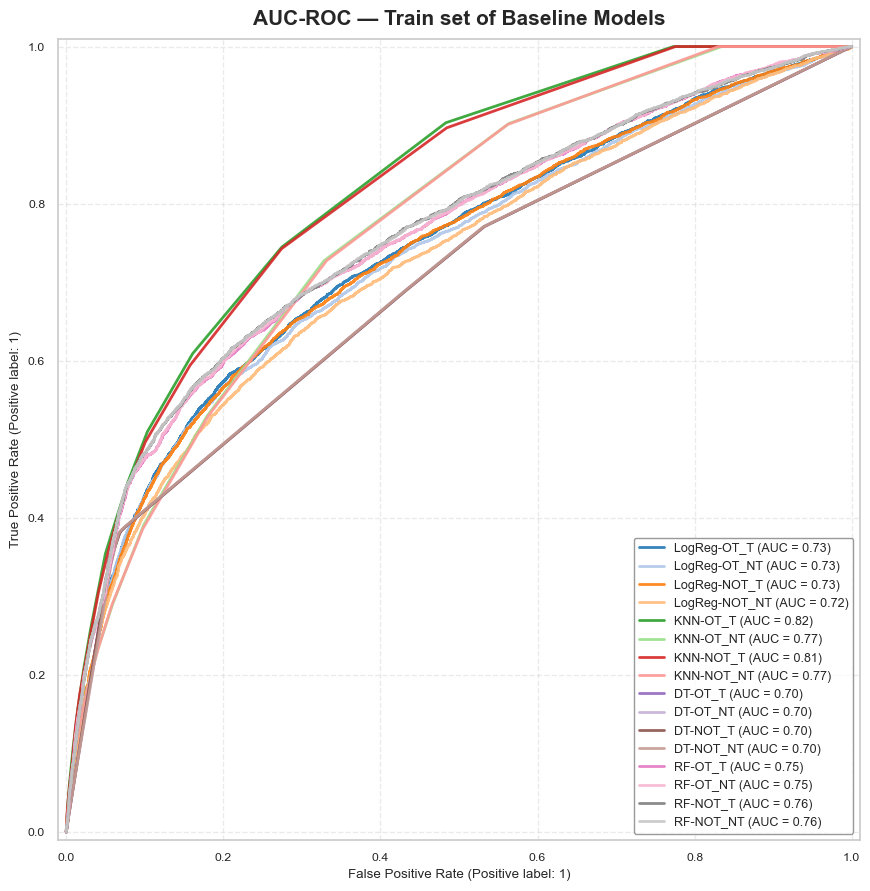

In [140]:
model_sets = {"LogReg": logreg_models, "KNN": knn_models, "DT": dt_models, "RF": rf_models}
plot_roc_curves(model_dict=model_sets, X_test_dict=X_train, y_test_dict=y_train, title="AUC-ROC — Train set of Baseline Models")

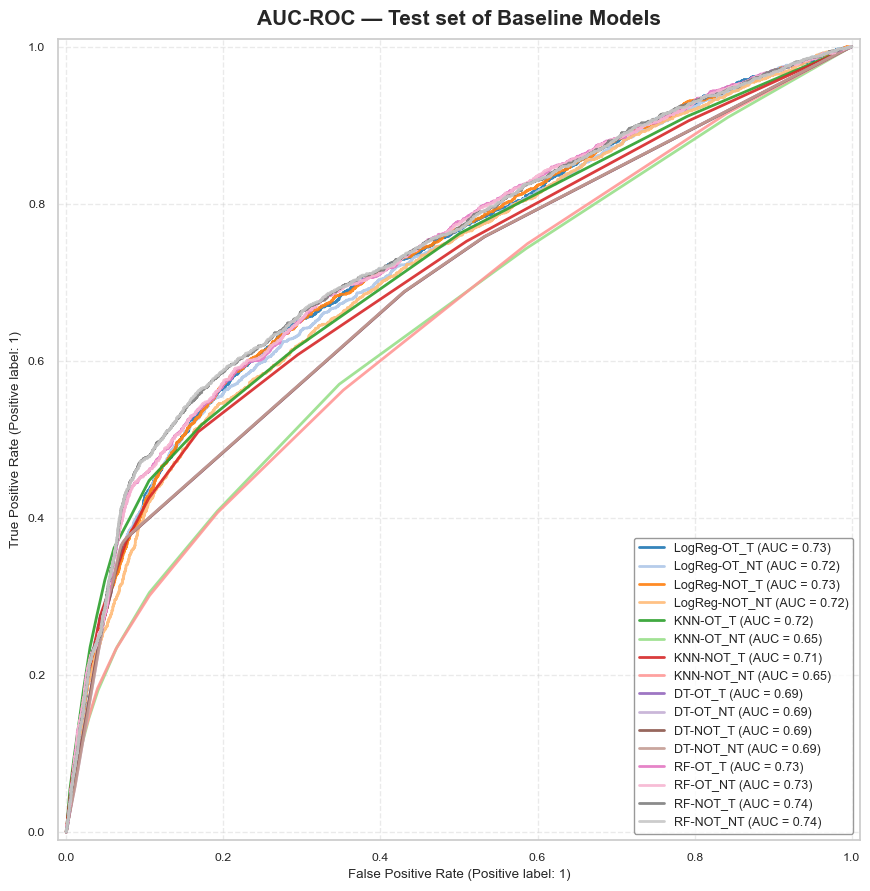

In [141]:
model_sets = {"LogReg": logreg_models, "KNN": knn_models, "DT": dt_models, "RF": rf_models}
plot_roc_curves(model_dict=model_sets, X_test_dict=X_test, y_test_dict=y_test, title="AUC-ROC — Test set of Baseline Models")

## **12.6. Hyperparameters and Threshold Tuning**

**From 13. Models analysis** we will got **RF OT_NT** which is the only model that have **positive AUC improvement** after tuning the hyperparameters and threshold.

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, 
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, RocCurveDisplay
)

In [143]:
# ============================================================================ 
# STEP 1: HYPERPARAMETERS TUNING FOR RANDOM FOREST WITH SCALING
# ============================================================================ 
print("=" * 80)
print("STEP 1: HYPERPARAMETERS TUNING FOR RANDOM FOREST WITH SCALING")
print("=" * 80)

# 1.1 Define hyperparameter grid for Random Forest
param_grid = {
    'rf__n_estimators': [10, 20, 40],  # Number of trees in the forest
    'rf__max_depth': [6, 10, 15],  # Maximum depth of the tree
    'rf__min_samples_split': [10, 20, 40],  # Minimum samples required to split a node
    'rf__min_samples_leaf': [10, 20, 40],  # Minimum samples required to be at a leaf node
    'rf__max_features': ['sqrt'],  # Number of features to consider for the best split
    'rf__class_weight': ['balanced'],  # Handle class imbalance
    'rf__random_state': [42]  # Random state for reproducibility
}

# 1.2 Create Random Forest model within a pipeline (including scaling)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier()

# 1.3 Setup the pipeline with StandardScaler and Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', rf)  # Random Forest classifier
])

# 1.4 Setup GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 1.5 Fit GridSearchCV
print("\nTraining GridSearchCV on OT_T pipeline with scaling...")
grid_search.fit(X_train['ot_t'], y_train['ot_t'].ravel())

# 1.6 Display best parameters
print(f"\nBest Parameters: {grid_search.best_params_}")

# 1.7 Get tuned model
rf_tuned = grid_search.best_estimator_

STEP 1: HYPERPARAMETERS TUNING FOR RANDOM FOREST WITH SCALING

Training GridSearchCV on OT_T pipeline with scaling...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 10, 'rf__n_estimators': 40, 'rf__random_state': 42}



STEP 2: ROC CURVE COMPARISON (BASELINE VS TUNED)


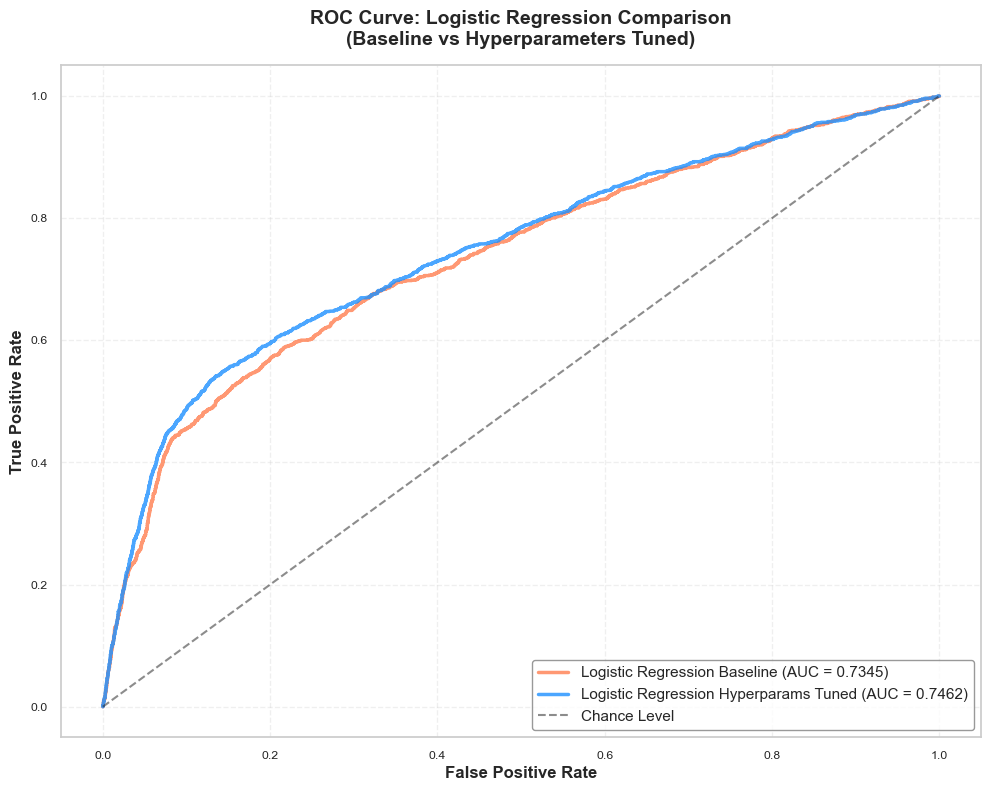


ROC-AUC Improvement: +0.0118


In [144]:
# ============================================================================ 
# STEP 2: PLOT ROC CURVES (BASELINE VS HYPERPARAMETERS TUNED)
# ============================================================================ 
print("\n" + "=" * 80)
print("STEP 2: ROC CURVE COMPARISON (BASELINE VS TUNED)")
print("=" * 80)

y_prob_baseline = rf_models['ot_t'].predict_proba(X_test['ot_t'])[:, 1]
y_prob_tuned = rf_tuned.predict_proba(X_test['ot_t'])[:, 1]

fpr_base, tpr_base, _ = roc_curve(y_test['ot_t'], y_prob_baseline)
roc_auc_base = auc(fpr_base, tpr_base)

fpr_tuned, tpr_tuned, _ = roc_curve(y_test['ot_t'], y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(fpr_base, tpr_base, 
        color='coral', linewidth=2.5, alpha=0.8,
        label=f'Logistic Regression Baseline (AUC = {roc_auc_base:.4f})')

ax.plot(fpr_tuned, tpr_tuned, 
        color='dodgerblue', linewidth=2.5, alpha=0.8,
        label=f'Logistic Regression Hyperparams Tuned (AUC = {roc_auc_tuned:.4f})')

ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.5, label='Chance Level')

ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve: Logistic Regression Comparison\n(Baseline vs Hyperparameters Tuned)', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='lower right', fontsize=11, frameon=True, edgecolor='gray')
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC-AUC Improvement: {roc_auc_tuned - roc_auc_base:+.4f}")


STEP 3: THRESHOLD TUNING FOR HYPERPARAMETERS TUNED LOGISTIC REGRESSION

Optimal Threshold: 0.6100
Maximum F1 Score: 0.4429


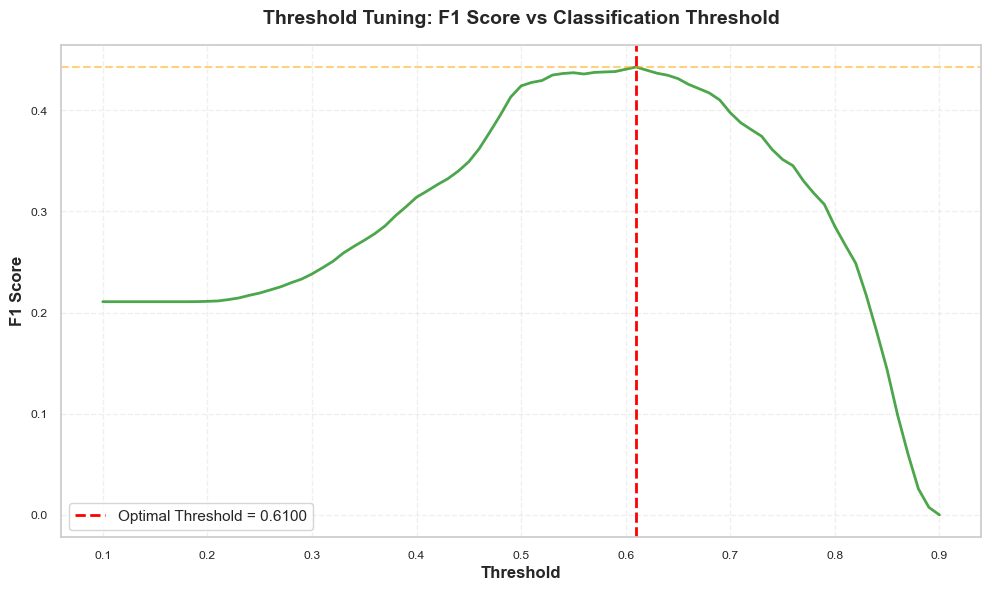

In [145]:
# ============================================================================ 
# STEP 3: THRESHOLD TUNING (FOR HYPERPARAMETERS TUNED LOGISTIC REGRESSION)
# ============================================================================ 
print("\n" + "=" * 80)
print("STEP 3: THRESHOLD TUNING FOR HYPERPARAMETERS TUNED LOGISTIC REGRESSION")
print("=" * 80)

# 3.1 ทดสอบ threshold ที่แตกต่างกัน
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob_tuned >= thresh).astype(int)  # ทำนายโดยใช้ threshold ที่กำหนด
    f1 = f1_score(y_test['ot_t'], y_pred_thresh, zero_division=0)  # คำนวณ F1 score
    f1_scores.append(f1)

# 3.2 ค้นหา optimal threshold ที่ให้ F1 score สูงสุด
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
max_f1 = f1_scores[optimal_idx]

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Maximum F1 Score: {max_f1:.4f}")

# 3.3 วาดกราฟ Threshold vs F1 score
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds, f1_scores, linewidth=2, color='green', alpha=0.7)
ax.axvline(optimal_threshold, color='red', linestyle='--', linewidth=2, 
           label=f'Optimal Threshold = {optimal_threshold:.4f}')
ax.axhline(max_f1, color='orange', linestyle='--', linewidth=1.5, alpha=0.5)
ax.set_xlabel('Threshold', fontsize=12, fontweight='bold')
ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax.set_title('Threshold Tuning: F1 Score vs Classification Threshold', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='best', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


STEP 4: CONFUSION MATRIX & METRICS COMPARISON


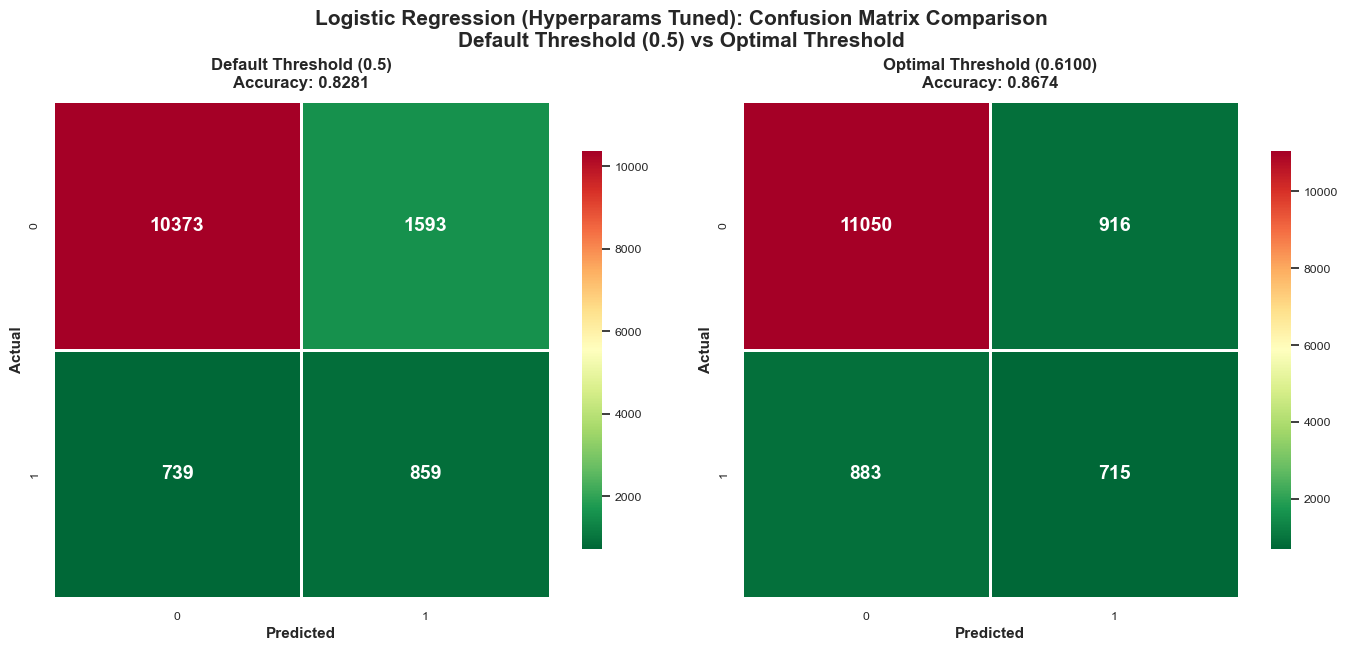

In [146]:
# ============================================================================ 
# STEP 4: CONFUSION MATRIX COMPARISON (DEFAULT VS OPTIMAL THRESHOLD)
# ============================================================================ 
print("\n" + "=" * 80)
print("STEP 4: CONFUSION MATRIX & METRICS COMPARISON")
print("=" * 80)

# 4.1 Get predictions with different thresholds
y_pred_default = rf_tuned.predict(X_test['ot_t'])  # Default threshold (0.5)
y_pred_optimal = (y_prob_tuned >= optimal_threshold).astype(int)  # Optimal threshold

# 4.2 Compute confusion matrices
cm_default = confusion_matrix(y_test['ot_t'], y_pred_default)
cm_optimal = confusion_matrix(y_test['ot_t'], y_pred_optimal)

# 4.3 Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Logistic Regression (Hyperparams Tuned): Confusion Matrix Comparison\nDefault Threshold (0.5) vs Optimal Threshold', 
             fontsize=15, fontweight='bold', y=1.02)

cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

# Plot - Default threshold (0.5)
sns.heatmap(cm_default, annot=True, fmt='d', cmap=cmap, ax=axes[0],
            square=True, linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8})
acc_default = cm_default.trace() / cm_default.sum()  # Accuracy calculation for default threshold
axes[0].set_title(f'Default Threshold (0.5)\nAccuracy: {acc_default:.4f}', 
                  fontsize=12, fontweight='bold', pad=10)
axes[0].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11, fontweight='bold')

# Plot - Optimal threshold
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap=cmap, ax=axes[1],
            square=True, linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8})
acc_optimal = cm_optimal.trace() / cm_optimal.sum()  # Accuracy calculation for optimal threshold
axes[1].set_title(f'Optimal Threshold ({optimal_threshold:.4f})\nAccuracy: {acc_optimal:.4f}', 
                  fontsize=12, fontweight='bold', pad=10)
axes[1].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [147]:
# ============================================================================ 
# STEP 5: METRICS COMPARISON TABLE
# ============================================================================ 

# 5.1 Define function to compute all metrics
def compute_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
        'F1 Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_prob)
    }
    return metrics

# 5.2 Compute metrics for both thresholds
metrics_default = compute_metrics(y_test['ot_t'], y_pred_default, y_prob_tuned)
metrics_optimal = compute_metrics(y_test['ot_t'], y_pred_optimal, y_prob_tuned)

# 5.3 Print comparison table
print("\n" + "=" * 80)
print("METRICS COMPARISON TABLE")
print("=" * 80)
print(f"\n{'Metric':<15} {'Default (0.5)':<15} {'Optimal ({:.4f})':<20} {'Improvement':<15}".format(optimal_threshold))
print("-" * 70)

for metric in metrics_default.keys():
    default_val = metrics_default[metric]
    optimal_val = metrics_optimal[metric]
    improvement = optimal_val - default_val
    
    print(f"{metric:<15} {default_val:<15.4f} {optimal_val:<20.4f} {improvement:>+14.4f}")

print("=" * 80)


METRICS COMPARISON TABLE

Metric          Default (0.5)   Optimal (0.6100)     Improvement    
----------------------------------------------------------------------
Accuracy        0.8281          0.8674                      +0.0393
Precision       0.3503          0.4384                      +0.0881
Recall          0.5375          0.4474                      -0.0901
Specificity     0.8669          0.9234                      +0.0566
F1 Score        0.4242          0.4429                      +0.0187
ROC-AUC         0.7462          0.7462                      +0.0000


In [148]:
# ============================================================================ 
# STEP 6: SUMMARY REPORT
# ============================================================================ 
print("\n" + "=" * 80)
print("FINAL SUMMARY REPORT")
print("=" * 80)
print("\n📊 HYPERPARAMETERS TUNING RESULTS:")
print(f"   Best Parameters: {grid_search.best_params_}")
print(f"   Best CV Score (ROC-AUC): {grid_search.best_score_:.4f}")

print("\n📈 ROC-AUC COMPARISON:")
print(f"   Baseline Model:  {roc_auc_base:.4f}")
print(f"   Tuned Model:     {roc_auc_tuned:.4f}")
print(f"   Improvement:     {roc_auc_tuned - roc_auc_base:+.4f}")

print("\n🎯 THRESHOLD TUNING RESULTS:")
print(f"   Optimal Threshold: {optimal_threshold:.4f}")
print(f"   Default F1 Score:  {metrics_default['F1 Score']:.4f}")
print(f"   Optimal F1 Score:  {metrics_optimal['F1 Score']:.4f}")
print(f"   F1 Improvement:    {metrics_optimal['F1 Score'] - metrics_default['F1 Score']:+.4f}")

print("\n✅ FINAL MODEL PERFORMANCE (Optimal Threshold):")
for metric, value in metrics_optimal.items():
    print(f"   {metric:<15}: {value:.4f}")

print("\n" + "=" * 80)


FINAL SUMMARY REPORT

📊 HYPERPARAMETERS TUNING RESULTS:
   Best Parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 10, 'rf__n_estimators': 40, 'rf__random_state': 42}
   Best CV Score (ROC-AUC): 0.7522

📈 ROC-AUC COMPARISON:
   Baseline Model:  0.7345
   Tuned Model:     0.7462
   Improvement:     +0.0118

🎯 THRESHOLD TUNING RESULTS:
   Optimal Threshold: 0.6100
   Default F1 Score:  0.4242
   Optimal F1 Score:  0.4429
   F1 Improvement:    +0.0187

✅ FINAL MODEL PERFORMANCE (Optimal Threshold):
   Accuracy       : 0.8674
   Precision      : 0.4384
   Recall         : 0.4474
   Specificity    : 0.9234
   F1 Score       : 0.4429
   ROC-AUC        : 0.7462



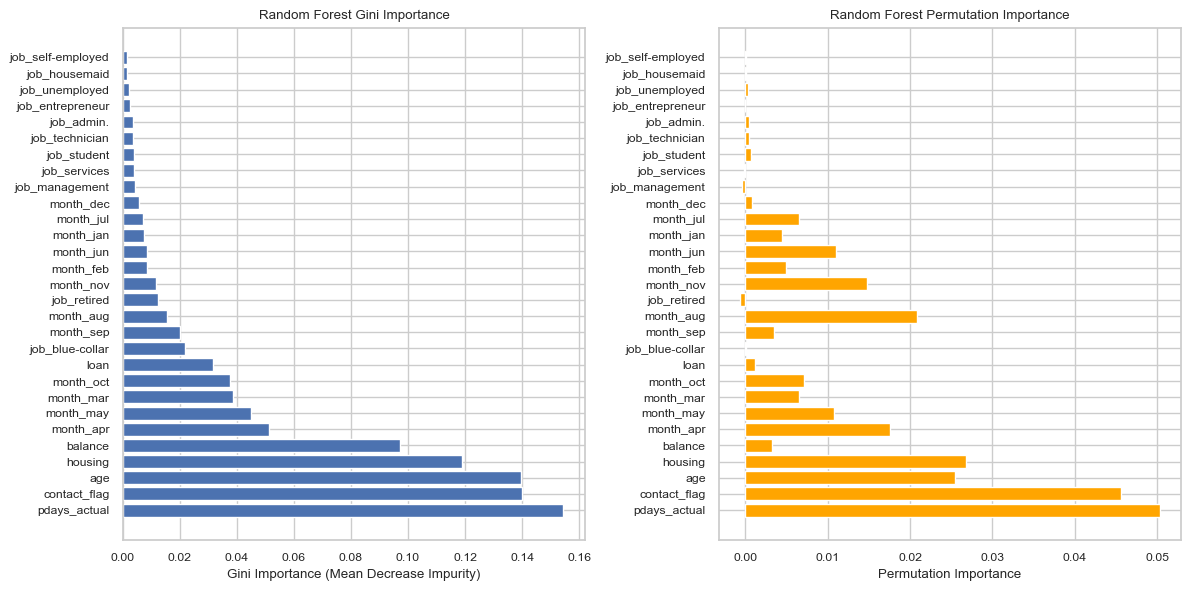


Feature Importances (Gini Importance):
pdays_actual: 0.1544
contact_flag: 0.1401
age: 0.1395
housing: 0.1191
balance: 0.0972
month_apr: 0.0511
month_may: 0.0451
month_mar: 0.0386
month_oct: 0.0375
loan: 0.0317
job_blue-collar: 0.0217
month_sep: 0.0201
month_aug: 0.0156
job_retired: 0.0123
month_nov: 0.0117
month_feb: 0.0085
month_jun: 0.0083
month_jan: 0.0075
month_jul: 0.0073
month_dec: 0.0058
job_management: 0.0041
job_services: 0.0040
job_student: 0.0039
job_technician: 0.0036
job_admin.: 0.0036
job_entrepreneur: 0.0026
job_unemployed: 0.0023
job_housemaid: 0.0016
job_self-employed: 0.0014

Feature Importances (Permutation Importance):
pdays_actual: 0.0503
contact_flag: 0.0456
age: 0.0254
housing: 0.0268
balance: 0.0033
month_apr: 0.0175
month_may: 0.0108
month_mar: 0.0065
month_oct: 0.0072
loan: 0.0012
job_blue-collar: 0.0001
month_sep: 0.0035
month_aug: 0.0209
job_retired: -0.0006
month_nov: 0.0148
month_feb: 0.0049
month_jun: 0.0110
month_jan: 0.0045
month_jul: 0.0065
month_dec:

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

pipeline_name = 'ot_t'
feature_names = predictor_vars[pipeline_name]

# Gini Importance (Mean Decrease Impurity)
gini_importances = rf_tuned.named_steps['rf'].feature_importances_

# Permutation Importance
perm_importance = permutation_importance(rf_tuned, X_test[pipeline_name], y_test[pipeline_name], n_repeats=10, random_state=42, n_jobs=-1)

# Plotting the Feature Importances
plt.figure(figsize=(12, 6))

# Gini Importance plot
plt.subplot(1, 2, 1)
indices = np.argsort(gini_importances)[::-1]  # Sort features by importance
plt.barh(range(len(feature_names)), gini_importances[indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel('Gini Importance (Mean Decrease Impurity)')
plt.title('Random Forest Gini Importance')

# Permutation Importance plot
plt.subplot(1, 2, 2)
plt.barh(range(len(feature_names)), perm_importance.importances_mean[indices], align='center', color='orange')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.xlabel('Permutation Importance')
plt.title('Random Forest Permutation Importance')
plt.tight_layout()
plt.show()

# Print feature importances for both methods
print("\nFeature Importances (Gini Importance):")
for feature, importance in zip([feature_names[i] for i in indices], gini_importances[indices]):
    print(f"{feature}: {importance:.4f}")

print("\nFeature Importances (Permutation Importance):")
for feature, importance in zip([feature_names[i] for i in indices], perm_importance.importances_mean[indices]):
    print(f"{feature}: {importance:.4f}")

# **13. Models Analysis**

## **13.1. Definition of Metrics**

In this classification problem, the objective is to predict whether a banking client will subscribe to a term deposit.
Because the **dataset is highly imbalanced**<br> 
- the majority class (Not Subscribed = 0)
- the minority class (Subscribed = 1)<br>

---

**Metric Definition**

| **Metric**     | **Definition** | **Notes / Examples** |
|----------------|----------------|------------------------|
| **Accuracy** | Measures the overall proportion of correctly predicted samples. | Unreliable with imbalanced classes. Example: If 90% of customers do not subscribe, a model predicting “No” for everyone still gets 90% accuracy. |
| **Precision** | Among customers predicted as “Yes,” how many truly subscribe? | Example: Precision = 0.40 → Only 40% of predicted subscribers are actual subscribers. |
| **Recall** | Out of all customers who subscribe, how many did the model successfully identify? | Example: Recall = 0.05 → The model detects only 5% of real subscribers. |
| **F1-score** | Harmonic mean of Precision and Recall | Useful for imbalanced datasets. |
| **AUC-ROC** | Measures the ability to distinguish between subscribers and non-subscribers across all thresholds. | Reflects how well the model ranks customers by subscription probability. |
| **Specificity** | Measures the proportion of actual non-subscribers that are correctly identified as "No" by the model. | High Specificity means the model is good at avoiding **False Positives (FP)**. Example: Specificity = 0.90 → 90% of actual non-subscribers are correctly identified as "No". |

## **13.2. Problem Interpretation and Define of Confusion Matrix Elements**

---

**Assumptions**
- **Problem Statement:** The bank needs to identify missed or opportunities to increase its subscribed customer base.
- **Calling Cost:** Each marketing call costs **$2** per customer.
- **Subscription Revenue:** Each successful subscription yields **$10** profit for the bank.
- **Conversion Rate $(C)$:** The probability that a customer in the calling pool will actually subscribe after receiving the call.

**Interpreting the Problem Statement and Understanding Its Purpose.**
- **Minimize False Positives:** *Reduce the number of incorrectly predicted subscribers*. **[Avoid missing opportunities to gain subscribers]**
- **Maximize True Negatives:** Ensure the model correctly identifies as many *non-subscribing customers* as possible. **[Increase the subscribed potential]**

**Element Definition Table**
| Element | Interpretation | Profit($) |
|-------|----------|--------|
| **True Positive** | Model predicted "Subscribed", and the actual is "Subscribed" | $+\$2$ : Saved by not calling customers unnecessarily |
| **False Positive** | Model predicted "Subscribed", and the actual is "Not Subscribed" | $-\$10$ : Lost opportunity to gain a subscriber |
| **True Negative** | Model predicted "Not Subscribed", and the actual is "Not Subscribed" | ${(C \times \$10) - \$2}$ : Able to gain a subscriber |
| **False Negative** | Model predicted "Not Subscribed", and the actual is "Subscribed" | $-\$2$ : Unneccessary call |

## **13.3. Metric Selection**

According to the problem statement and its interpretation, we will focus on False Positives and True Negatives. From this, we can conclude our metric selection.

---

**4 Considered Metrics for Model Selection**
| No. | Metric       | Formula  | Most Important Business Role | Rationale |
|-----|--------------|------------------------------------------------|---------------------------------------------------------------------------|-----------|
| **1.**  | **Precision**    | $\frac{TP}{TP + FP}$                           | **High Risk control:** Measures how accurately the model decides “do not call.”    | **Reduce missed opportunities:** Ensure that every time the model recommends "no call," it is the right decision. |
| **2.** | **Specificity**  | $\frac{TN}{TN + FP}$                           | **Growth opportunity:** Measures the ability to correctly identify True Negatives (TN). | Higher Specificity means better identification of customers who ***should*** be called (TN), supporting revenue growth. |
| **3.**  | **F1-score**     | $\frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}}$ | **Balance and reliability:** Measures model effectiveness on imbalanced data. | Ensures the model **balances risk control** (FP via Precision) and **cost control** (FN via Recall) to avoid unnecessary calls. |
| **4.**  | **Recall**     | $\frac{TP}{TP + FN}$ | **Customer Conversion:** Measures how many potential “yes” customers the model successfully identifies. | Higher Recall reduces **lost revenue**, ensuring customers who would subscribe are not mistakenly ignored (FN reduction). |

### **❓ Q1: Overfitting or not? Why?**

**Methodology:** Comparing Train vs Test performance across AUC, Recall, F1 scores and Precision.

---

**Results Summary**

| Model               | Train AUC   | Test AUC    | Train Recall | Test Recall | Train F1    | Test F1     | Train Precision | Test Precision | Overfitting? |
|---------------------|-------------|-------------|--------------|-------------|-------------|-------------|-----------------|----------------|--------------|
| Logistic Regression | 0.721–0.735 | 0.715–0.728 | 0.083–0.092  | 0.071–0.077 | 0.144–0.157 | 0.124–0.134 | 0.493–0.542     | 0.462–0.512    | ❌ No        |
| KNN                 | 0.769–0.818 | 0.646–0.718 | 0.047–0.623  | 0.035–0.537 | 0.087–0.246 | 0.064–0.214 | 0.462–0.601     | 0.462–0.537    | ❌ No        |
| Decision Tree       | 0.696–0.697 | 0.689–0.689 | 0.383–0.383  | 0.369–0.369 | 0.385–0.402 | 0.385–0.386 | 0.420–0.424     | 0.404–0.406    | ❌ No        |
| Random Forest       | 0.753–0.756 | 0.734–0.738 | 0.556–0.614  | 0.531–0.597 | 0.383–0.405 | 0.373–0.386 | 0.287–0.324     | 0.279–0.312    | ❌ No        |

**Key Findings**

- **Logistic Regression**: Train/test metrics nearly identical
- **KNN**: Train/test metrics nearly identical
- **Decision Tree**: Train/test metrics nearly identical
- **Random Forest**: Train/test metrics nearly identical

**Conclusion:** All other models generalize well.

## **13.4. Model Optimal Fits Analysis**

---

**Model Optimal Fits Analysis Purpose**

The main goal is to find the Optimal Pairings between the four algorithms ($\text{LogReg, KNN, DT, RF}$) with the best data handling pipeline (OT/NOT $\times$ T/NT) using a metric.

1. **Finding the Right Match:** Find out *"Which Model Type works best with which Pipeline?"*
2. **Risk Hedging:** Select by giving the highest priority to Precision to control the highest risk.
3. **Logical verification:** Analyze whether the compatibility is consistent with the properties of the algorithm.

**Outcome**

When you have answered this question, you will have 4 best models (1 representative from each category) that are ready for testing in the next step:
1. **Summary table of the final 4 favorites:** We get the pair set (Model $\times$ Pipeline) that gives the highest **Precision** and following metrics.
2. **Validation:** The selected model has the highest potential because it is paired with a pipeline that maximizes risk control and growth opportunities within its own niche.

---

We selected the combinations according to the metric selection

1. **High Precision** (↓ reduces financial risk: $−\$10$ per false positive)
2. **High Specificity** (↑ increases growth opportunity by avoiding false negatives)
3. **Reliable F1-score** (Balance precision and recall)

| Model Type       | Best Pipeline                     | Precision | Specificity | F1-score | Recall | Rationale |
|------------------|------------------------------------|-----------|-------------|-------------|-------------|---------------------------------------------|
| **LogReg**       | **OT_NT** (OT + No Transform) | **0.512** | **0.990**   | **0.134** | **0.077** | OT_NT has more outliers than OT_T, sometimes attempting to transform data such as balance or age that are non-normally distributed can distort the linear relationship, s    o LogReg works best on the original dataset (OT_NT) that still maintains its original structure. |
| **KNN**          | **OT_T** (OT + Transform)  | **0.537** | **0.985**   | **0.214** | **0.133** | KNN is a distance-based model, If the features have high skewness and outliers (OT_NT), the distance calculation will be strongly attracted/repulsed by those outliers. Performing transformations (e.g., Log Transformation) and scaling on the OT_T dataset allows the features to be better distributed and on the same scale, making the distance calculation more meaningful and accurate.|
| **Decision Tree**| **OT_NT** (OT + No Transform) | **0.391** | **0.908**   | **0.415** | **0.441** | A Decision Tree splits data based on the best rules, without relying on linear assumptions or normal distribution. It is robust to outliers and skewness, and transformations may not improve performance, sometimes complicating the splits. Thus, Decision Trees work well with raw data. |
| **Random Forest**| **OT_NT** (OT + No Transform)  | **0.303** | **0.837**   | **0.386** | **0.533** | Random Forest is an ensemble model that combines many trees, making it more robust to outliers and skewness than a single Decision Tree. Transformations used in OT_T offer no significant advantage compared to working with the original dataset (OT_NT). |

**Conclusion**

- The selection of each pair (Model × Pipeline) confirms that we have found the best data setup that complements the strengths of each algorithm, allowing them to perform their main task of control FP (risk −$10) and TN (growth opportunity) are optimally increased within their own group.

### **❓ Q2: If you compare the model performance by setting data transformation or eliminating outliers in doubt predictors, you should be able to tell that this setting affect the model's performance or not?**

---

**1. Data Transformation**

- **For Models like Logistic Regression and KNN:** These models are sensitive to the scale of the data. Logistic Regression, being a linear model, benefits from feature scaling (via transformation) because it assumes linearity and normally distributed features. Similarly, KNN (a distance-based algorithm) performs better when the features are on the same scale since the distance calculation becomes more meaningful when all features have similar ranges. Without transformation, models may incorrectly prioritize features with larger numerical ranges.

- **For Decision Trees and Random Forest:** These models are less sensitive to feature scaling because they partition the data based on splits. Therefore, transformation has minimal impact on performance in models like Decision Trees and Random Forests, which don't rely on distances or linear relationships.

**2. Eliminating Outliers**
- **For KNN:** Since KNN relies on distance calculations, outliers can disproportionately influence the nearest neighbors, leading to inaccurate predictions. Eliminating outliers can improve model performance, especially in terms of precision and recall.

- **For Logistic Regression:** Outliers can have a significant impact on the model's coefficients, potentially leading to bias in predictions. Removing outliers can help in improving the model’s ability to generalize, making predictions more robust.

- **For Decision Trees and Random Forest:** Outliers can still affect performance by creating splits that are too specific, reducing model generalization. However, these models are typically more robust to outliers because of their tree-based structure that makes decisions based on thresholds.

**Conclusion**

- Data Transformation improves performance in models sensitive to feature scale (Logistic Regression, KNN), while it has little effect on Decision Trees and Random Forest.

- Eliminating outliers improves model performance for KNN, Logistic Regression, and to some extent for Decision Trees and Random Forest, though they are generally more robust to outliers.

### **❓ Q3: How about considered metrics is each model? and which model gives the most precision? Why?**

---

Each model prioritizes different metrics based on its learning behavior

| **Model** | **Characteristic** | **Metrics it Performs Best On** | **Why?** |
|-------|----------------|-----------------------------|------|
| **LogReg OT_NT** | Linear, probability-based | Specificity (0.990) & Precision (0.512) | Outlier treatment stabilizes coefficients, reducing False Positives → stronger TN detection. |
| **KNN OT_T** | Distance-based learner | Balanced Precision (0.537) & F1 (0.214) | Scaling + outlier cleaning improves distance calculation → neighbors become more reliable predictors. |
| **Decision Tree OT_NT** | Rule-based splitting | Balanced Recall (0.441) & F1 (0.415) | Trees split thresholds better after cleaning data → more effective partitioning, no scaling required. |
| **Random Forest OT_NT** | Ensemble of trees | Highest Recall (0.533) | Many trees capture rare “yes” cases better → improves detection of actual subscribers. |

#### **Model with the Highest Precision: KNN (0.537 using OT_T)**

---

KNN gives the highest Precision because:
- It relies on distance similarity, so cleaning outliers + scaling features makes neighbors more meaningful.
- OT removes extreme values that dominate distance.
- Scaling (Transform) prevents large-scale features (e.g., balance) from overpowering small ones (e.g., campaign).
- As a result, the nearest groups represent true behavior, reducing False Positives → highest Precision.<br>

📌 ***Therefore, KNN is the best model for minimizing costly wrong calls.***

### **❓ Q4: Based on the metrics you get from the model, can your model actually be used in real situation?**

---

- **Logistic Regression OT_NT**
    - Accuracy: 88.3%
    - Precision: 0.512
    - Recall: 0.077
    - Real-World Use: **Not ideal.** While it has decent accuracy, its low recall means it misses many opportunities. In marketing, missing potential customers due to low recall can lead to lost revenue.

- **KNN OT_T**
    - Accuracy: 88.4%
    - Precision: 0.537 ***Best***
    - Recall: 0.133
    - Real-World Use: **Moderately useful.** It has the highest precision, but moderate recall still leaves room for missed opportunities. Improving recall would make it more reliable for real-world applications like marketing.

- **Decision Tree**
    - Accuracy: 85.3%
    - Precision: 0.391
    - Recall: 0.441
    - Real-World Use: **Good for stability.** The decision tree shows a reasonable balance between precision and recall. While it's not the best in precision, its stability can be useful for certain use cases.

- **Random Forest**
    - Accuracy: 80.1%
    - Precision: 0.303
    - Recall: 0.533
    - Real-World Use: **Good for stability** It has moderate recall, but the low precision means it would waste efforts on irrelevant customers, making it less reliable for marketing.

**Conclusion**

- **Currently, KNN is the most practical for real-world use**, though it could still benefit from improved recall. Logistic Regression, Decision Trees, and Random Forest need further improvements to be more effective in marketing. ***But this still can not use in real-world cause of threshols tuning and cost analyse.***

### **❓Q5: What features are important and sufficient to create a ML model that has the highest accuracy?**

---

##### **Sufficient Feature Set for Highest Accuracy**

We will focus on the features with the highest Gini Importance, as these are the most effective drivers of the model's prediction.

**1. The Core Predictive Set (Top 5)<br>**
    These features represent the most powerful indicators, collectively driving over 60% of the model's decision-making.

| Rank | Feature        | Gini Importance | Domain Significance                                        |
|------|----------------|-----------------|------------------------------------------------------------|
| 1    | `pdays_actual` | 0.1544          | **Recency of Contact**: The actual number of days since the last contact from a previous campaign is the single most critical factor. |
| 2    | `contact_flag` | 0.1401          | **Contact Status**: Whether the client was contacted at all in the past is highly indicative of their willingness to subscribe. |
| 3    | `age`          | 0.1395          | **Financial Status Indicator**: Age correlates strongly with wealth, financial stability, and investment horizon. |
| 4    | `housing`      | 0.1191          | **Debt Status**: The presence of a housing loan (large debt) affects liquidity and willingness to lock up funds in a term deposit. |
| 5    | `balance`      | 0.0972          | **Liquidity/Wealth**: The average yearly balance is a direct measure of the client's available funds. |

**2. The Secondary Refining Set (Months and Other Loans)<br>**
    These features should be included to capture crucial temporal patterns and secondary financial liabilities.

| Rank | Feature      | Gini Importance | Domain Significance                                       |
|------|--------------|-----------------|-----------------------------------------------------------|
| 6    | `month_apr`  | 0.0511          | **April** is one of the high-success months for marketing. |
| 7    | `month_may`  | 0.0451          | **May** is a key contact month.                           |
| 8    | `month_mar`  | 0.0386          | **March** is a high-success month.                        |
| 9    | `month_oct`  | 0.0375          | **October** is a high-success month.                      |
| 10   | `loan`       | 0.0317          | **Personal loans** (smaller liabilities) also slightly impact the decision. |

#### **Proposed Sufficient Feature Set To build a streamlined and highly accurate model<br>**
the sufficient set of features should include the **Top 5 Core Predictors** plus the most influential **Monthly** and **Loan** features.

---

$$\text{Sufficient Feature Set} = \{ \text{pdays\_actual, contact\_flag, age, housing, balance, month\_apr, month\_may, month\_mar, month\_oct, loan, month\_sep, month\_aug} \}$$

---

Reason for choosing:
- **Gini Importance Cut-off:** Selecting features with a Gini Importance greater than $0.03$ covers almost all important factors.
- **Efficiency and stability:** Using only features with high predictive power improves model stability and reduces the risk of overfitting that can occur from using features with low importance but a large number.

### **❓Q6: From residual or error analysis, what characteristics of the data make your model less effective?  What is the limitation?**

---

#### **Error Analysis and Model Limitation (Prioritizing Precision/Specificity)**
The model's primary limitation stems from the **Severe Class Imbalance**, which causes difficulty in learning the distinct characteristics of the minority class ($\mathbf{y=1}$, Subscribers).

##### **1. Characteristics of the Data Causing Ineffectiveness**

The primary limitations of the model stem from the inherent structure of the Bank Marketing dataset:

* **Severe Class Imbalance:** The target variable (`y`) exhibits an extreme imbalance, with the non-subscribers ($\mathbf{y=0}$) dominating the subscribers ($\mathbf{y=1}$) . This makes it difficult for the model to accurately separate the small pool of actual subscribers from the large non-subscriber base.
* **Ambiguous Data:** Clients who actually subscribe ($\mathbf{y=1}$) often possess features that are statistically similar to those who do not ($\mathbf{y=0}$), resulting in **overlapping data points** that challenge the model's ability to create a precise decision boundary, leading to costly **False Positives (FP)**.

##### **2. Limitation in Real-World Application (The Cost of High Precision)**

The main limitation is the difficulty in achieving a higher quality sales list (high Precision) without severely compromising the model's ability to identify the successful market segment (high Recall).

> **Limitation:** The model's primary constraint is that the high volume of **Ambiguous Data** forces a difficult trade-off: **reducing False Positives (FP)** (to save marketing cost) requires **increasing the threshold**, which severely harms **Recall** by generating a high volume of **False Negatives (FN)**. This means the bank avoids wasting money but pays the price in **missed revenue opportunities**.

#### **Concrete Example from Data (Optimal Threshold 0.6100)**

Analyzing the Confusion Matrix illustrates the core challenge and the resulting low Recall:

* **Cost Efficiency (FP):** The model minimizes wasted marketing by ensuring that only **916** customers are targeted who ultimately **do not subscribe (FP)**.
* **The Cost to Recall (FN):** To achieve this cost-efficiency (high Precision), the model dismisses **883 actual subscribers (FN)**.
* **Performance:** This results in a very low **Recall** of $\mathbf{0.4474}$. This means **55.26%** ($\frac{883}{715 + 883}$) of all customers who converted were **missed by the model**.

**Conclusion:** The critical constraint is the model's **low Recall ($\mathbf{0.4474}$)**, directly caused by the high FN count. This highlights the model's fundamental failure to understand and identify nearly half of the successful market segment, which is the high price paid for achieving a precise (low FP) contact list.